# II. VISUALIZATION

In [184]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import seaborn as sns
import numpy as np

In [185]:
df_final= pd.read_csv(r"C:\Users\Admin\OneDrive - National Economics University\Documents\BigData\Mid_term_1\df_final.csv")

In [186]:
df_final.head(5)

,orderid,cashier,saledate,total,customerid,ticketcode,date,time,slot,room,...,industry,title,director,country,rating,listed_in,Age,Time of day,Age Group,Weekday
0,10006052019B0225,emp002,2019-05-06,90000,0000000014,20074925,2019-05-06,1900-01-01 18:15:00,G04,3,...,computer,Marvel Studios' Avengers: Endgame,"Anthony Russo, Joe Russo",United States,PG-13,"Action-Adventure, Fantasy, Science Fiction",20,Tối,Thanh niên (18-29),Monday
1,10006052019B0225,emp002,2019-05-06,90000,0000000014,20074924,2019-05-06,1900-01-01 18:15:00,G03,3,...,computer,Marvel Studios' Avengers: Endgame,"Anthony Russo, Joe Russo",United States,PG-13,"Action-Adventure, Fantasy, Science Fiction",20,Tối,Thanh niên (18-29),Monday
2,10022052019B0167,emp011,2019-05-22,90000,0000000034,20097042,2019-05-22,1900-01-01 20:45:00,E04,2,...,health service,JOHN WICK 3: CHUẨN BỊ CHIẾN TRANH (C18),Chad Stahelski,United States,R,Action,21,Tối,Thanh niên (18-29),Wednesday
3,10022052019B0167,emp011,2019-05-22,90000,0000000034,20097041,2019-05-22,1900-01-01 20:45:00,E03,2,...,health service,JOHN WICK 3: CHUẨN BỊ CHIẾN TRANH (C18),Chad Stahelski,United States,R,Action,21,Tối,Thanh niên (18-29),Wednesday
4,10130052019B0141,emp005,2019-05-30,90000,0000000034,20106761,2019-05-30,1900-01-01 19:30:00,F04,1,...,health service,NGÔI ĐỀN KỲ QUÁI (Pee Nak),Phontharis Chotkijsadarsopon,Thailand,PG-13,"Comedy, Horror",21,Tối,Thanh niên (18-29),Thursday


In [187]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33966 entries, 0 to 33965
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   orderid       33966 non-null  object
 1   cashier       33966 non-null  object
 2   saledate      33966 non-null  object
 3   total         33966 non-null  int64 
 4   customerid    33966 non-null  object
 5   ticketcode    33966 non-null  int64 
 6   date          33966 non-null  object
 7   time          33966 non-null  object
 8   slot          33966 non-null  object
 9   room          33966 non-null  int64 
 10  show_id       33966 non-null  object
 11  slot type     33966 non-null  object
 12  ticket type   33966 non-null  object
 13  ticket price  33966 non-null  int64 
 14  popcorn       33966 non-null  object
 15  DOB           33966 non-null  object
 16  Gender        33966 non-null  object
 17  Quận/Huyện    33966 non-null  object
 18  Tỉnh          33966 non-null  object
 19  job 

## __1. PHÂN TÍCH KHÁCH HÀNG__

_Vấn đề đặt ra_
- Khách hàng trong bộ dữ liệu chủ yếu đến từ quận/huyện nào của Đà Nẵng?
- Khách hàng đi xem phim nhiều hơn là nam hay nữ?
- Nhóm khách hàng đi xem phim nhiều tập trung ở độ tuổi bao nhiêu? Làm công việc gì? Lĩnh vực gì?
- Khách hàng chọn thời gian nào trong ngày để đi xem phim?
- Khách hàng có xu hướng đi xem phim nhiều vào những ngày nào trong tuần?
- Loại vé, loại ghế ngồi được nhiều khách hàng lựa chọn là gì?
- Một khách hàng thường có xu hướng mua mấy vé? (Khách hàng đi xem phim một mình, với bạn, nhóm bạn hay với cơ quan nhiều?)
- Khách hàng đi xem phim có xu hướng mua popcorn hay không?
- Thể loại phim có nhiều khách hàng lựa chọn là gì? Đến từ đất nước nào? Có rating nào?

### __1.1 NHÂN KHẨU HỌC__

#### 1.1.1 Số lượng người đặt vé theo quận/huyện

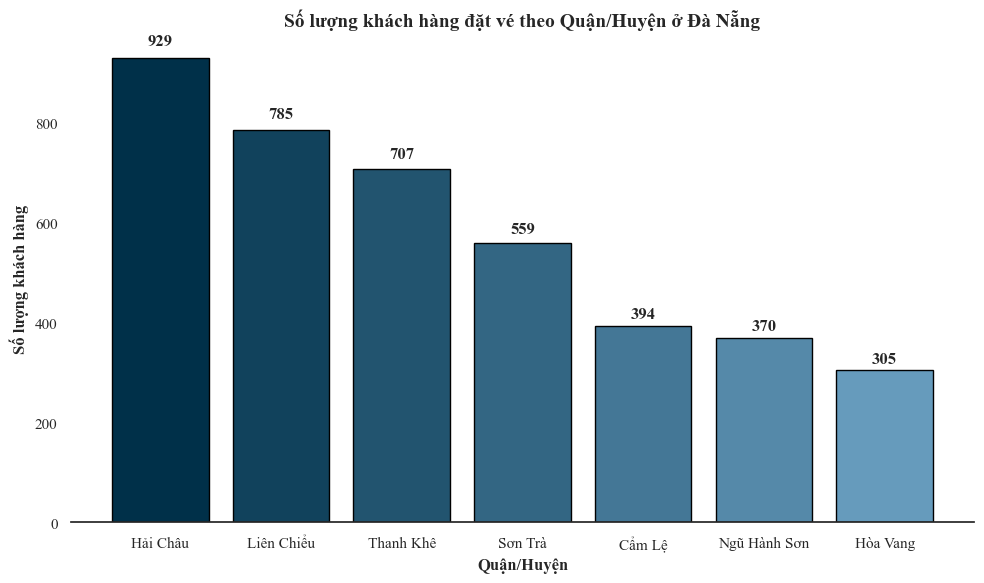

In [188]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Giữ lại mỗi khách hàng duy nhất
df_unique_customers = df_final.drop_duplicates(subset='customerid')

# Đếm số khách hàng theo Quận/Huyện
district_counts = df_unique_customers['Quận/Huyện'].value_counts()

# Tạo gradient màu từ #003049 (xanh đậm) đến #669BBC (xanh nhạt)
cmap = mcolors.LinearSegmentedColormap.from_list('custom_gradient', ['#003049', '#669BBC'])
gradient_colors = [mcolors.to_hex(cmap(i / (len(district_counts) - 1))) for i in range(len(district_counts))]

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
bars = plt.bar(district_counts.index, district_counts.values, color=gradient_colors, edgecolor='black')

# Tiêu đề và trục
plt.title('Số lượng khách hàng đặt vé theo Quận/Huyện ở Đà Nẵng', fontsize=14, fontweight='bold')
plt.xlabel('Quận/Huyện', fontsize=12, fontweight='bold')
plt.ylabel('Số lượng khách hàng', fontsize=12, fontweight='bold')
plt.xticks(rotation=360, ha='center')
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Thêm nhãn số trên cột (cách đỉnh một chút)
for index, value in enumerate(district_counts.values):
    plt.text(index, value + value * 0.02, str(value),
             ha='center', va='bottom', fontsize=12, fontweight='bold')

# Làm đẹp biểu đồ (ẩn viền trên/phải/trái)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.grid(False)

plt.tight_layout()
plt.show()


Thông thường đi mua vé, khách hàng thường có xu hướng một người mua cho cả nhóm, do đó trong bộ dataset này, có thể thấy thông tin của mỗi khách hàng được dùng nhiều lần cho số lượng vé mà khách hàng đó mua, sẽ rất khó để đưa ra cái nhìn chính xác và tổng quát khi chỉ ghi nhận được thông tin người mua, nhưng chúng ta có thể dựa vào đó để đưa ra những nhận xét mang tính gần đúng, ví dụ người mua đến từ Quận/huyện Hải Châu nhiều nhất, có thể xem như là Hải Châu có nhiều người mua vé nhất vì đây cũng là một trong những quận phát triển bậc nhất Đà Nẵng, hiện đại và có mức sống cao, những người đi chơi cùng với nhau có xu hướng cùng 1 khu. Và quận Hòa Vang là ít nhất, đây cũng là một quận không hiện đại và được đầu tư nhiều như các quận khác.

#### 1.1.2 Số lượng khách hàng đặt vé theo giới tính

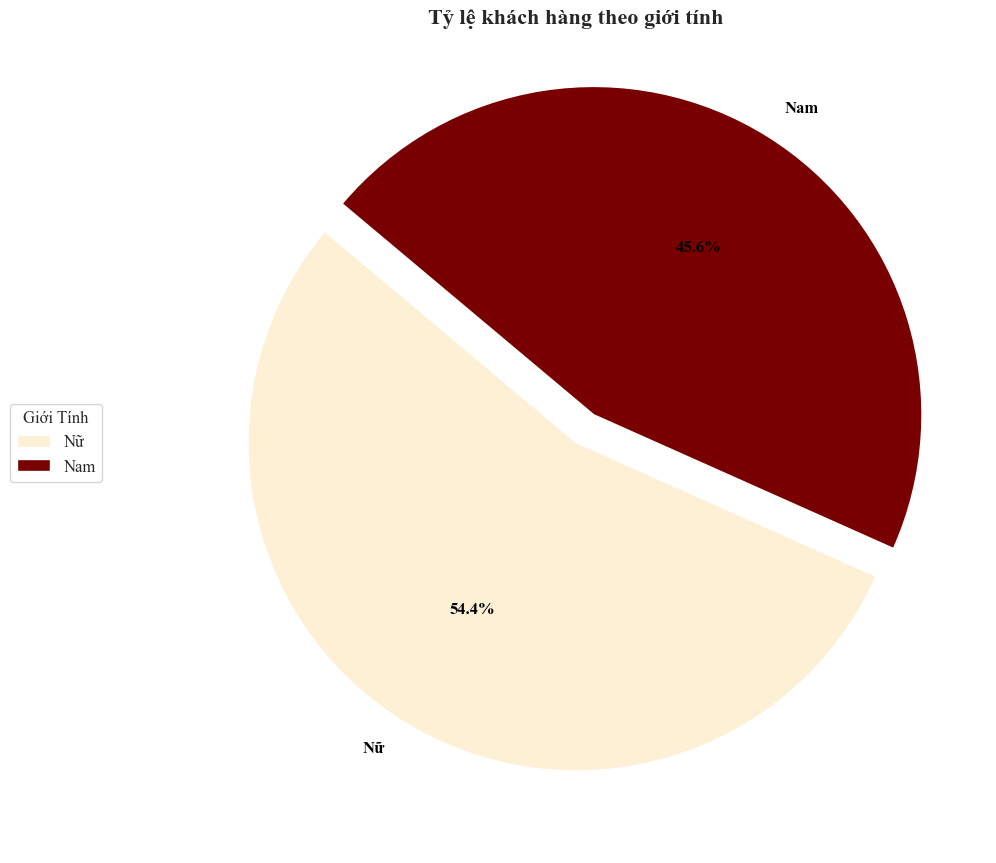

In [189]:
# Tính toán số lượng giới tính từ khách hàng duy nhất
counts = df_unique_customers['Gender'].value_counts()
labels = counts.index

# Màu sắc và tách phần biểu đồ cho 'Nam'
colors = ['#780000' if label == 'Nam' else '#FDF0D5' for label in labels]
explode = [0.1 if label == 'Nam' else 0 for label in labels]

# Vẽ Pie chart
plt.figure(figsize=(10, 10))
plt.pie(
    counts,
    labels=labels,
    colors=colors,
    autopct='%1.1f%%',
    startangle=140,
    explode=explode,
    textprops={'fontsize': 12, 'fontweight': 'bold', 'color': 'black'}
)

# Tiêu đề và legend
plt.title('Tỷ lệ khách hàng theo giới tính', fontsize=16, fontweight='bold')
plt.legend(labels, title="Giới Tính", loc="center left", bbox_to_anchor=(-0.2, 0.5), fontsize=12)

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

Tỷ lệ giới tính của khách hàng khá cân bằng giữa nam và nữ, tuy nhiên, số lượng nữ giới vẫn chiếm phần nhỉnh hơn so với nam giới.

#### 1.1.3 Số lượng khách hàng đặt vé theo độ tuổi

In [190]:
# Đếm số lượng khách hàng theo từng độ tuổi cụ thể
age_counts = df_unique_customers['Age'].value_counts().sort_index()
age_counts_df = age_counts.reset_index()
age_counts_df.columns = ['Tuổi', 'Số lượng khách hàng']

# Hàm tô màu cả dòng nếu Tuổi nằm trong khoảng 15–28
def highlight_row(row):
    if 15 <= row['Tuổi'] <= 28:
        return ['background-color: #FDF0D5; color: black; font-weight: bold'] * len(row)
    else:
        return [''] * len(row)

# Áp dụng định dạng cho toàn bảng
age_counts_df.style.apply(highlight_row, axis=1)

,Tuổi,Số lượng khách hàng
0,0,2
1,1,10
2,2,8
3,3,2
4,10,1
5,11,6
6,12,7
7,13,26
8,14,37
9,15,103


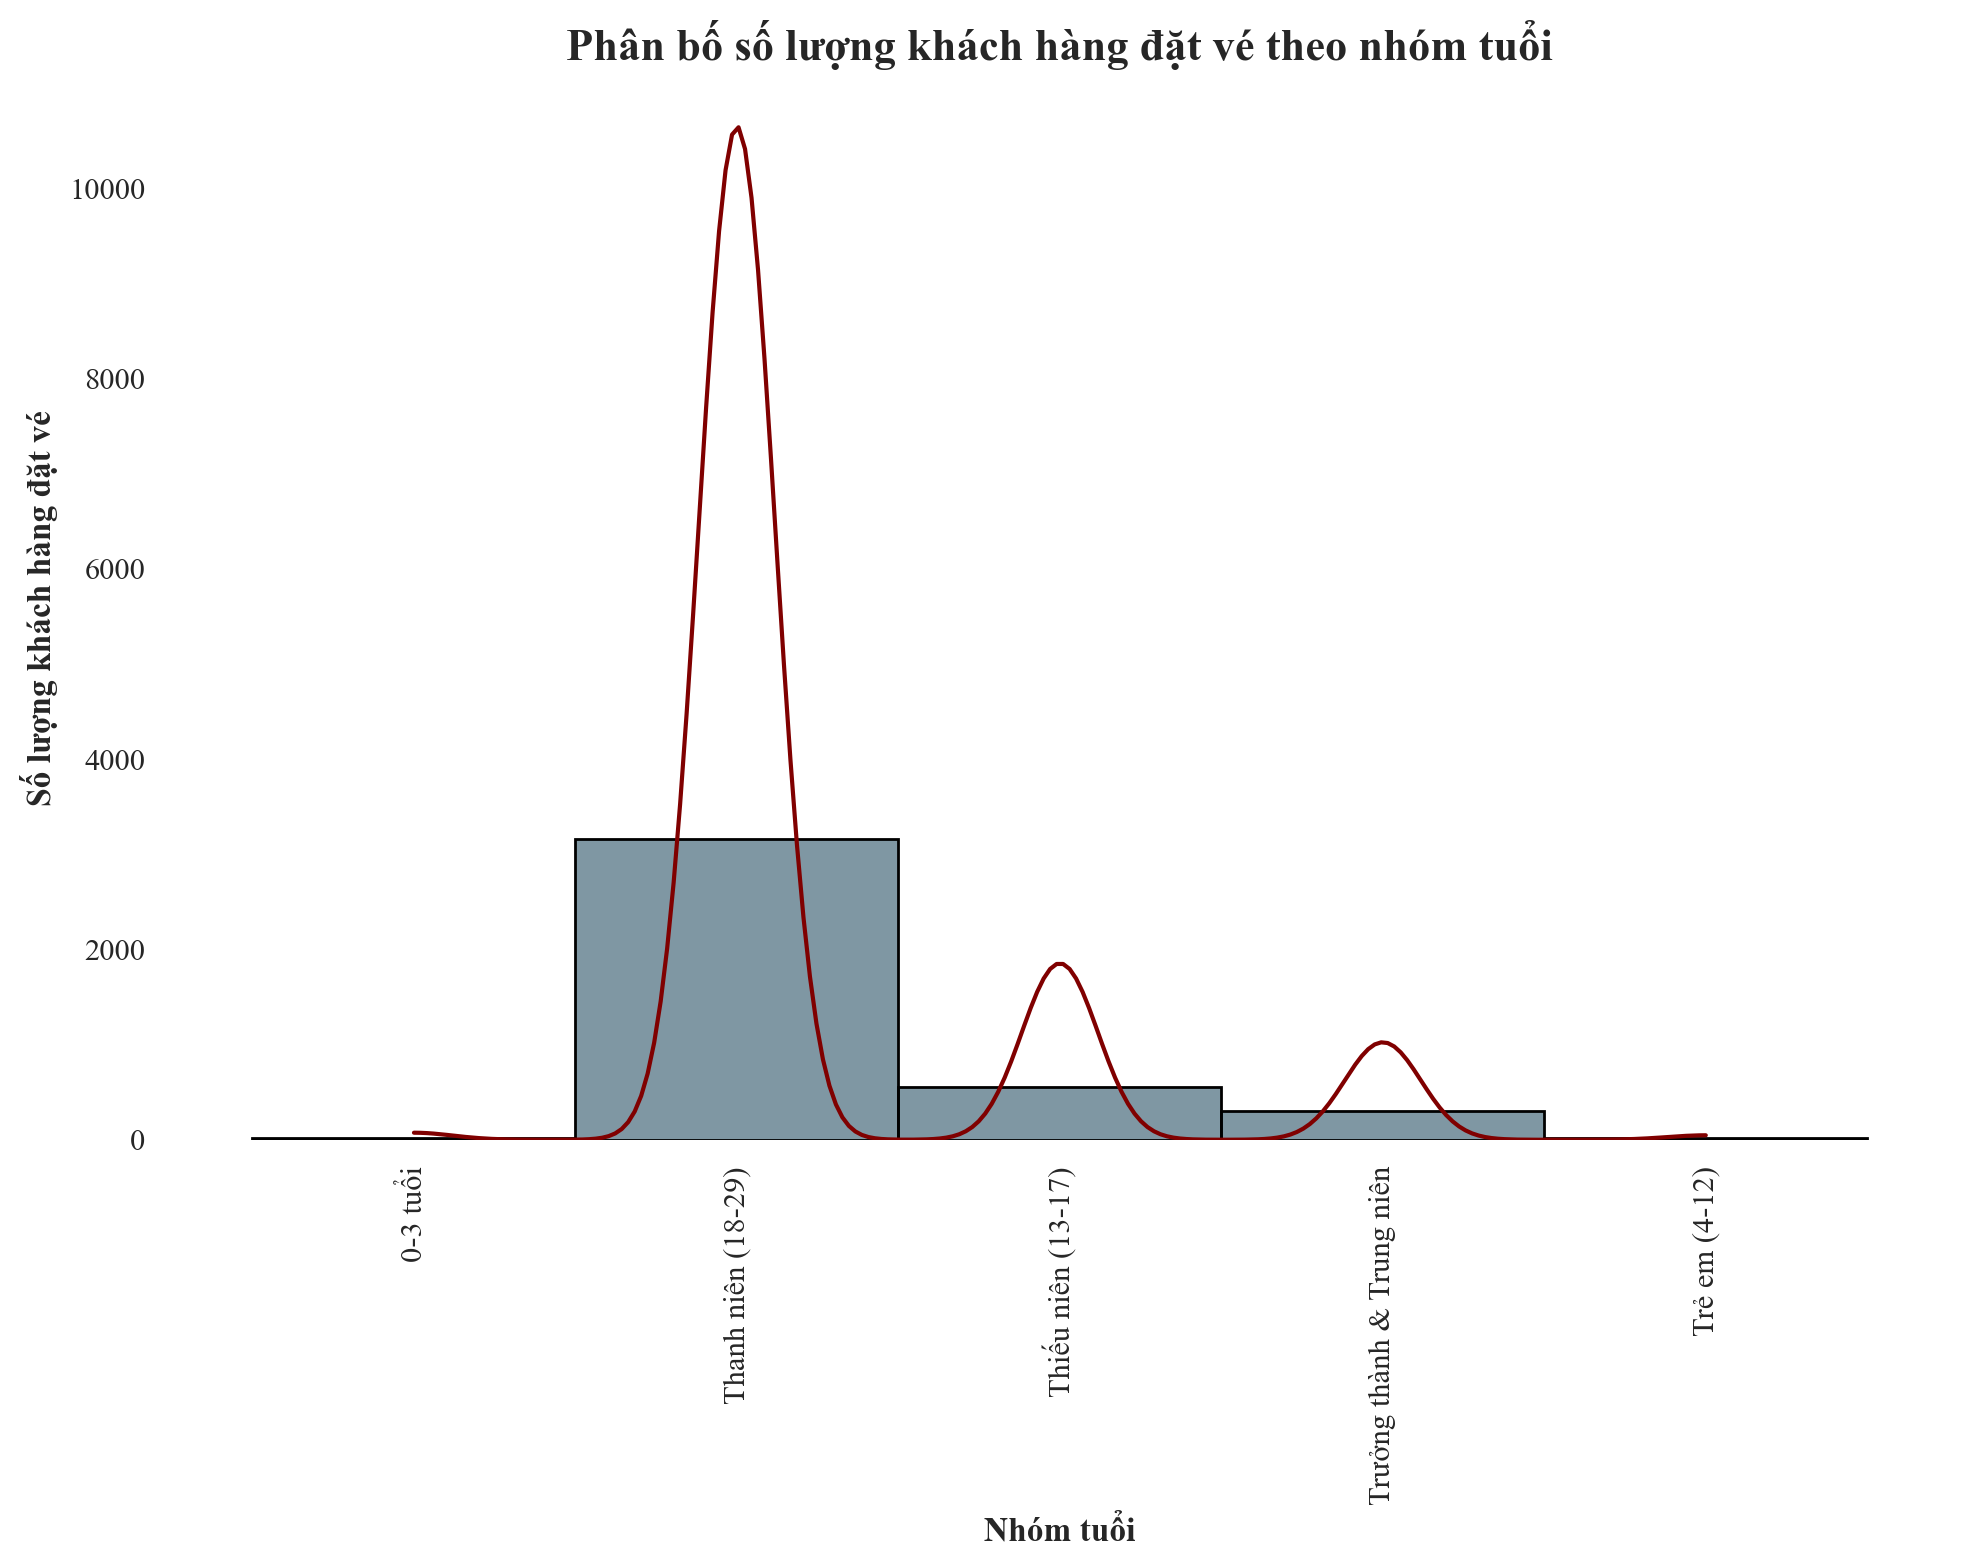

In [191]:
sns.set_theme(style="whitegrid")
plt.rcParams['font.family'] = 'Times New Roman'

# Thứ tự nhóm tuổi
age_order = ['0-3 tuổi', 'Trẻ em (4-12)', 'Thiếu niên (13-17)', 'Thanh niên (18-29)', 'Trưởng thành & Trung niên']

# Đảm bảo cột 'Age Group' là dạng phân loại có thứ tự
df_final['Age Group'] = pd.Categorical(
    df_final['Age Group'],
    categories=age_order,
    ordered=True
)

# Sắp xếp theo nhóm tuổi
cinema_sorted = df_unique_customers.sort_values(by='Age Group')

# Vẽ biểu đồ
plt.figure(figsize=(10, 8), dpi=200)
ax = sns.histplot(
    data=cinema_sorted,
    x='Age Group',
    kde=True,
    bins=60,
    color='#003049',
    edgecolor='black'
)

# Thay đổi màu đường KDE (nếu có)
if ax.lines:
    ax.lines[0].set_color('maroon')

# Cài đặt tiêu đề và nhãn
ax.set_title('Phân bố số lượng khách hàng đặt vé theo nhóm tuổi', fontsize=16, fontweight='bold')
ax.set_xlabel('Nhóm tuổi', fontsize=12, fontweight='bold')
ax.set_ylabel('Số lượng khách hàng đặt vé', fontsize=12, fontweight='bold')
ax.tick_params(axis='x', rotation=90)

# Tắt lưới và viền
ax.grid(False)
for spine in ax.spines.values():
    spine.set_visible(False)

plt.tight_layout()
plt.show()

Đối tượng mua vé chủ yếu là thanh thiếu niên trong độ tuổi từ 15 đến 29 đặc biệt là nhóm tuổi thanh niên (18-29) — đây là giai đoạn mà họ có xu hướng vui chơi, giải trí nhiều hơn, đồng thời đã bắt đầu có khả năng tự chủ tài chính. Họ cũng thường xuyên tụ tập, đi xem phim cùng bạn bè, tạo nên một nhóm khách hàng năng động và tiềm năng cho rạp chiếu phim.

#### 1.1.4 Số lượng khách hàng đặt vé theo lĩnh vực và nghề nghiệp

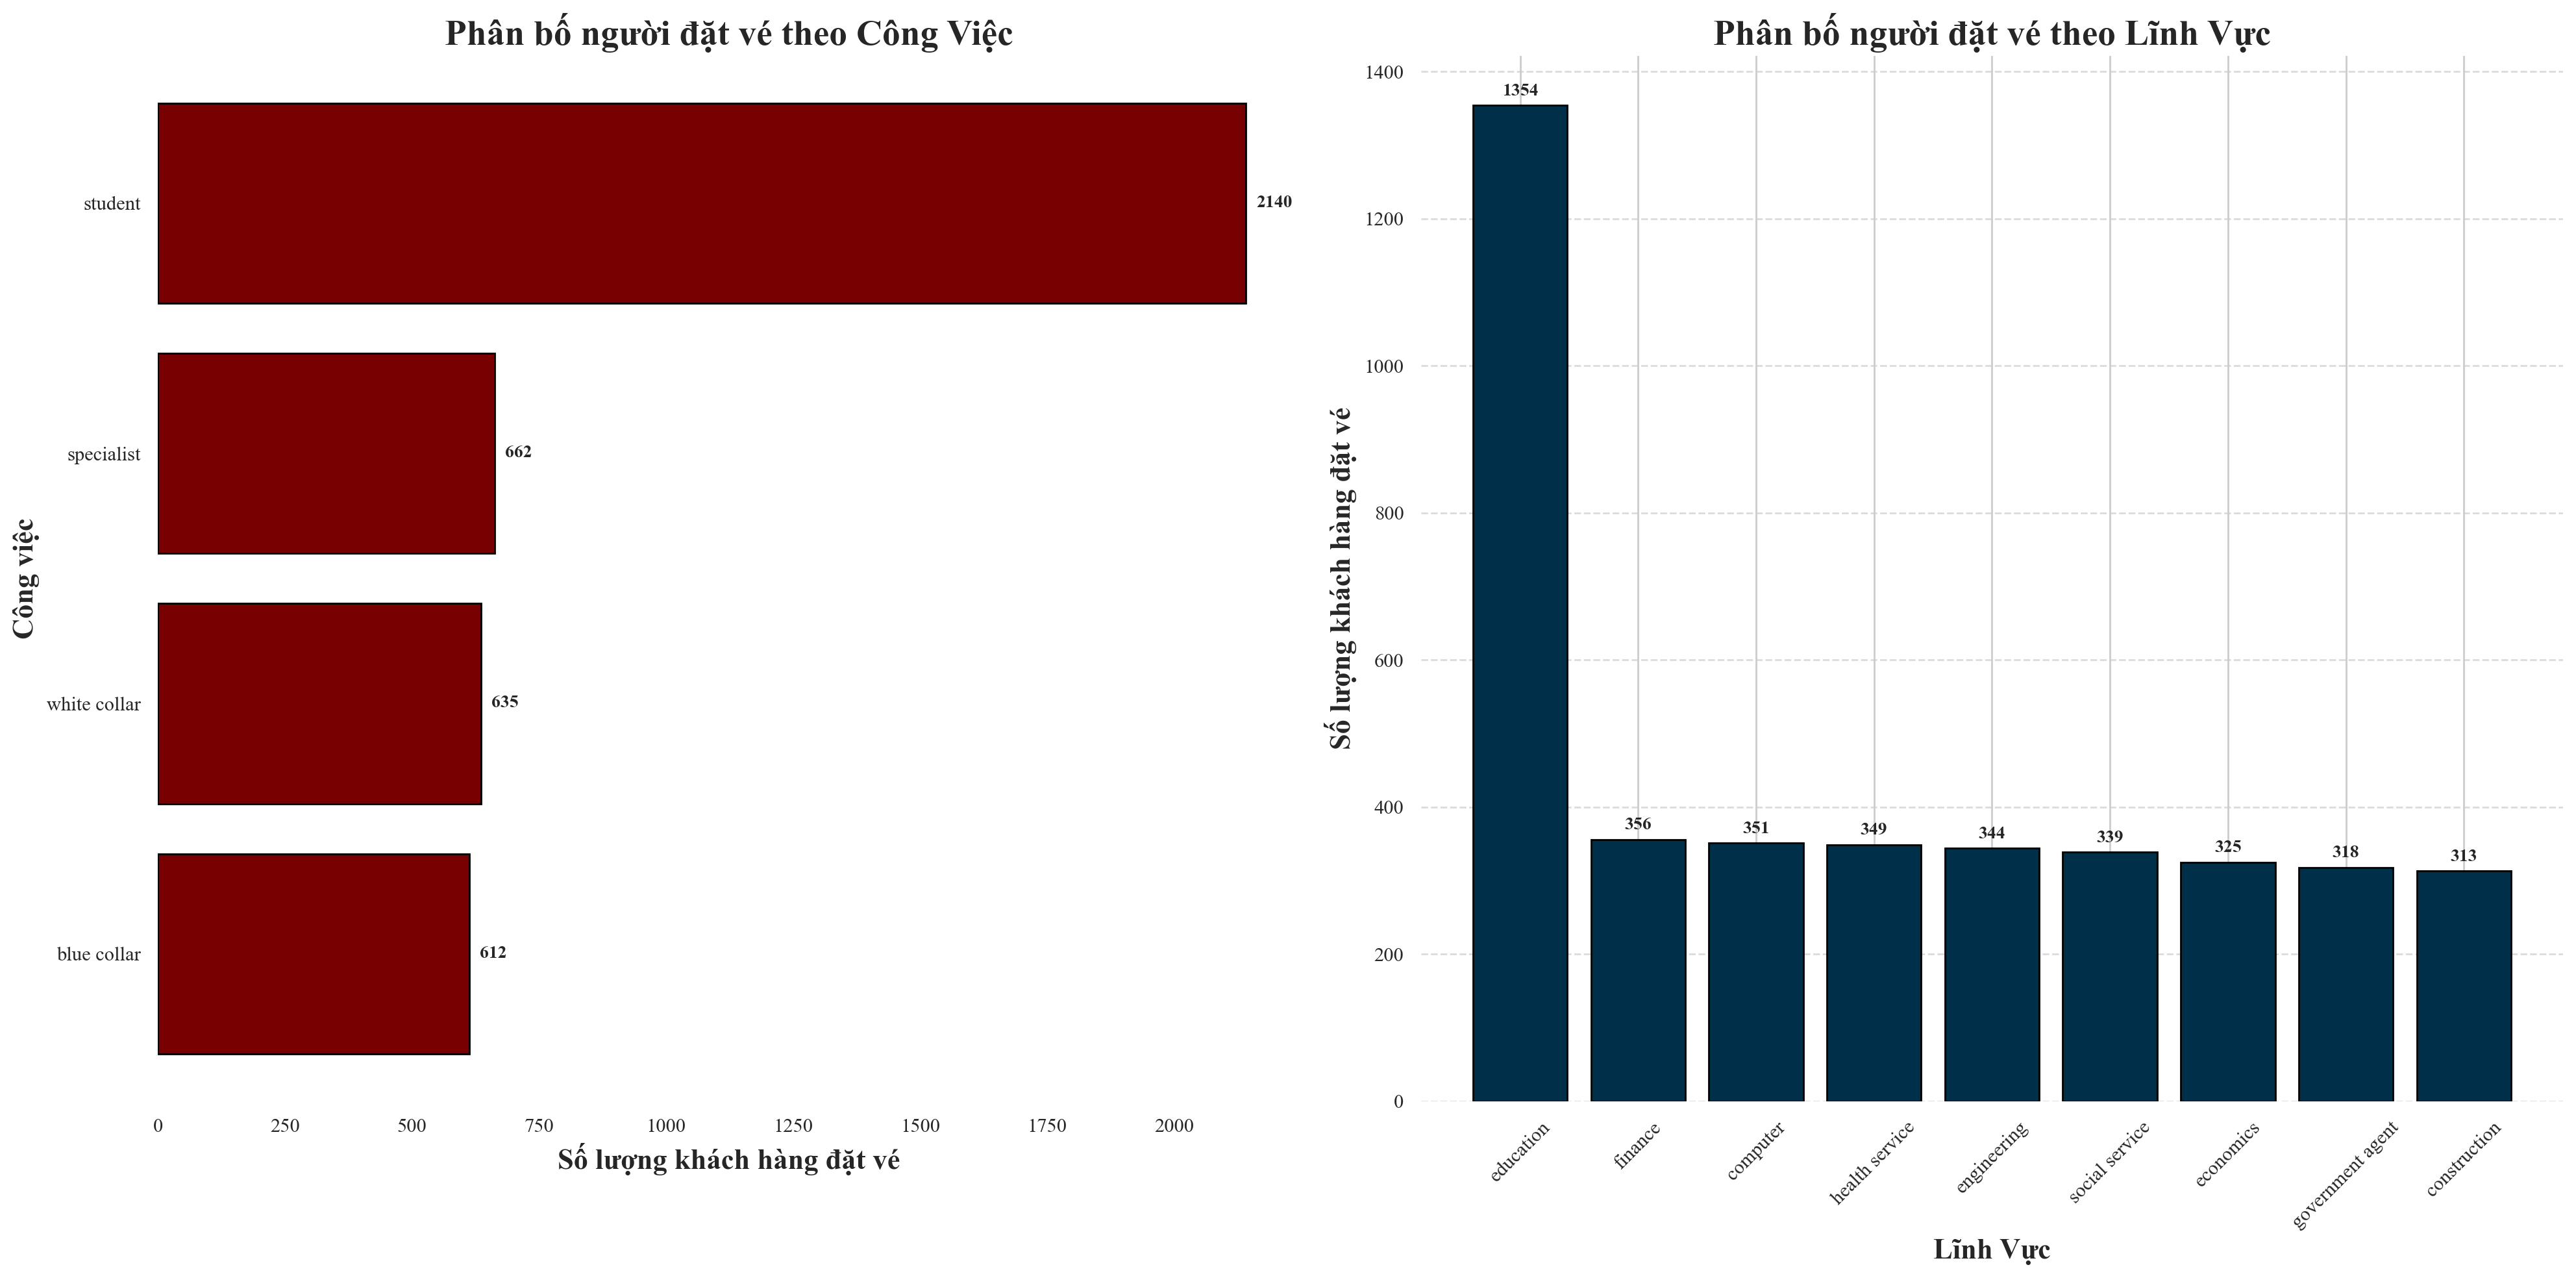

In [192]:
# Thiết lập giao diện
sns.set_theme(style="whitegrid")
plt.rcParams['font.family'] = 'Times New Roman'

# Tạo biểu đồ 2 phần: Công việc, Lĩnh vực
fig, axs = plt.subplots(1, 2, figsize=(20, 10), dpi=200)
axs = axs.flatten()

# Chart 1: Phân bố theo công việc
cinema_jobs = df_unique_customers['job'].value_counts()
axs[0].barh(cinema_jobs.index, cinema_jobs.values, color='#780000', edgecolor='black')
axs[0].set_title('Phân bố người đặt vé theo Công Việc', fontsize=20, fontweight='bold')
axs[0].set_xlabel('Số lượng khách hàng đặt vé', fontsize=16, fontweight='bold')
axs[0].set_ylabel('Công việc', fontsize=16, fontweight='bold')
axs[0].tick_params(axis='y', labelsize=11, labelrotation=0)
axs[0].invert_yaxis()
axs[0].grid(False)
for i, v in enumerate(cinema_jobs.values):
    axs[0].text(v + max(cinema_jobs.values)*0.01, i, str(v), va='center', fontsize=10, fontweight='bold')
for spine in axs[0].spines.values():
    spine.set_visible(False)

# Chart 2 (giờ là axs[1]): Phân bố theo lĩnh vực
cinema_industry = df_unique_customers['industry'].value_counts()
axs[1].bar(cinema_industry.index, cinema_industry.values, color='#003049', edgecolor='black')
axs[1].set_xlabel('Lĩnh Vực', fontsize=16, fontweight='bold')
axs[1].set_ylabel('Số lượng khách hàng đặt vé', fontsize=16, fontweight='bold')
axs[1].set_title('Phân bố người đặt vé theo Lĩnh Vực', fontsize=20, fontweight='bold')
axs[1].grid(axis='y', linestyle='--', alpha=0.7)
axs[1].tick_params(axis='x', rotation=45)
for i, v in enumerate(cinema_industry.values):
    axs[1].text(i, v + max(cinema_industry.values)*0.01, str(v), ha='center', fontsize=10, fontweight='bold')
for spine in axs[1].spines.values():
    spine.set_visible(False)

plt.tight_layout()
plt.show()

Với tổng cộng 2.140 khách hàng, nhóm học sinh, sinh viên chiếm hơn 50% tổng số lượt đặt vé. Đây chính là lý do giải thích vì sao phần lớn khách hàng đến từ lĩnh vực Giáo dục (Education).

Số lượng khách hàng đặt vé phân bố trong các lĩnh vực còn lại khá đồng đều.

### __1.2 HÀNH VI KHÁCH HÀNG__

#### 1.2.1 Số lượng vé bán ra (Khách hàng mua) theo thời gian


##### a. Theo giờ

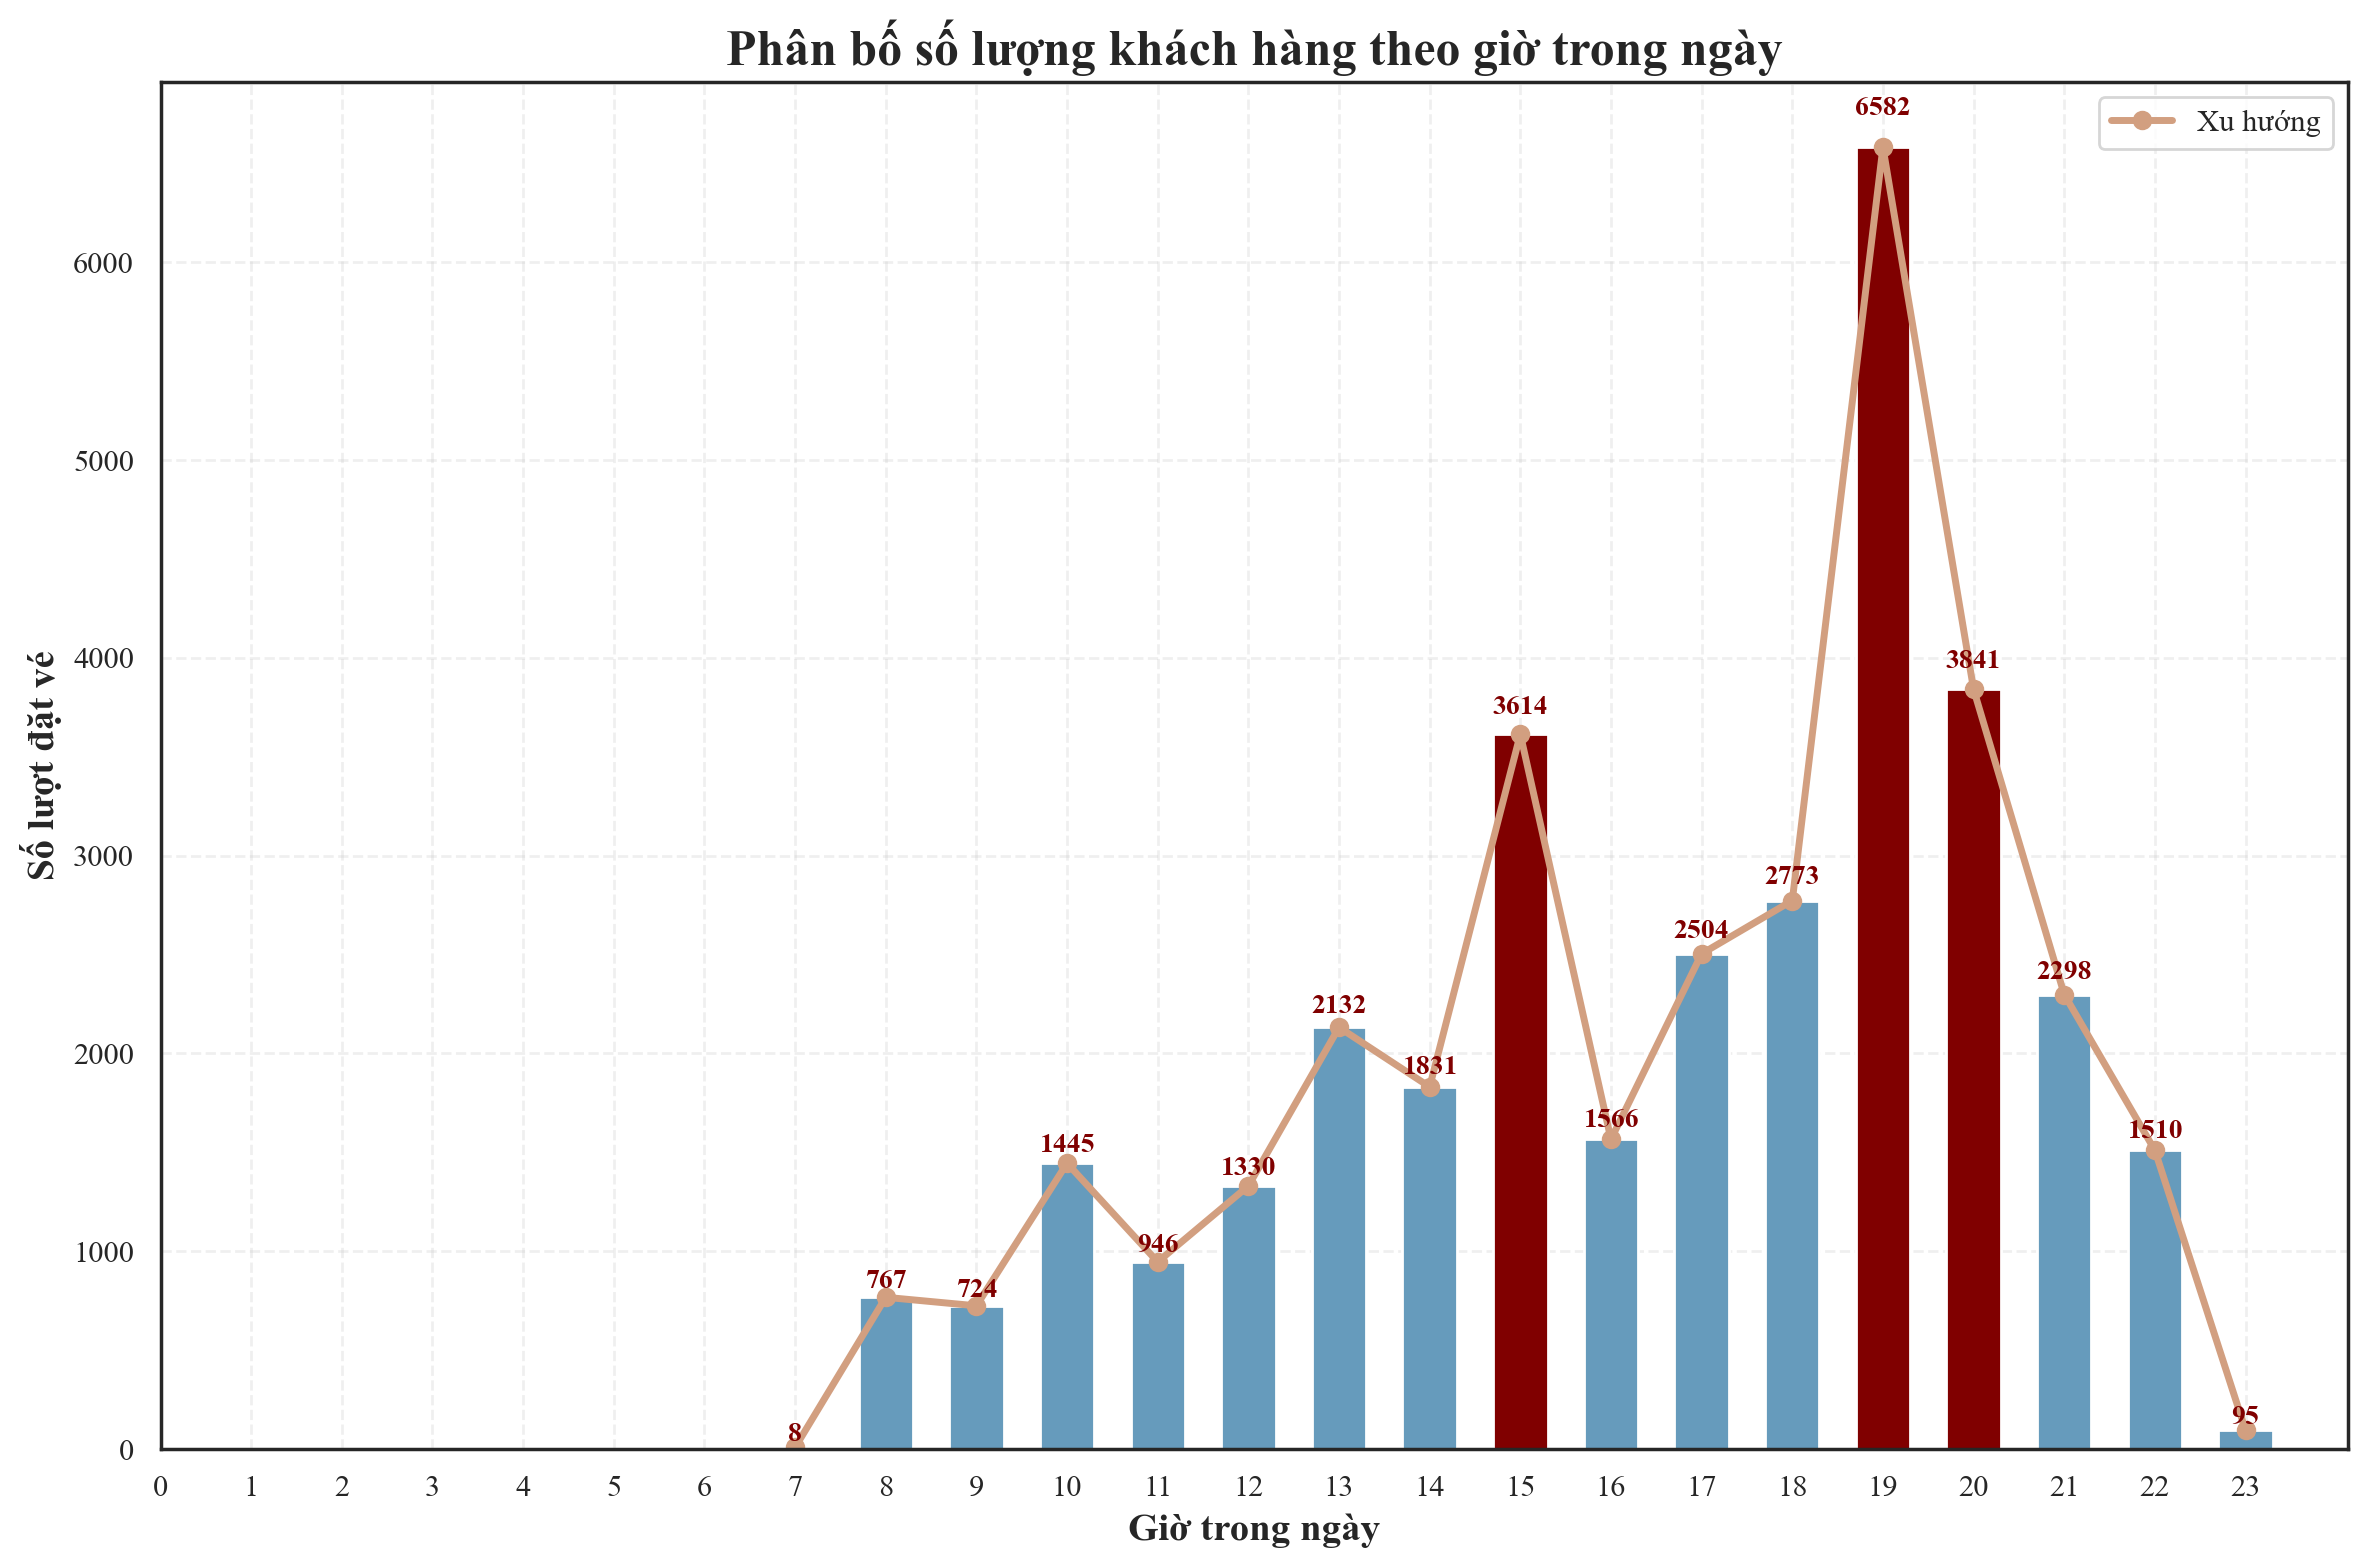

In [193]:
sns.set_theme(style="white")
plt.rcParams['font.family'] = 'Times New Roman'

# Chuyển đổi cột 'time' sang kiểu datetime nếu chưa
df_final['time'] = pd.to_datetime(df_final['time'], errors='coerce')
df_final['hour'] = df_final['time'].dt.hour

# Đếm số lượng vé bán theo từng giờ trong ngày
hour_counts = df_final['hour'].value_counts().sort_index()

# Tìm top 3 giờ cao nhất
top3_hours = hour_counts.sort_values(ascending=False).head(3).index

# Gán màu: đậm cho top 3, nhạt cho còn lại
bar_colors = ['maroon' if hour in top3_hours else '#669BBC' for hour in hour_counts.index]

# Tạo biểu đồ
plt.figure(figsize=(12, 8), dpi=200)
bars = plt.bar(hour_counts.index, hour_counts.values, color=bar_colors, width=0.6)

# Vẽ line trend
plt.plot(hour_counts.index, hour_counts.values, color='#D29F80', linewidth=2.5, marker='o', label='Xu hướng')

# Thêm số lên đầu cột, cách đỉnh 3% chiều cao
for x, y in zip(hour_counts.index, hour_counts.values):
    plt.text(x, y + y*0.02, str(y), ha='center', va='bottom',
         fontsize=10, fontweight='bold', color='maroon')


# Cấu hình biểu đồ
plt.title('Phân bố số lượng khách hàng theo giờ trong ngày', fontsize=18, fontweight='bold')
plt.xlabel('Giờ trong ngày', fontsize=14, fontweight='bold')
plt.ylabel('Số lượt đặt vé', fontsize=14, fontweight='bold')
plt.xticks(range(0, 24))
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()


##### b. Theo ngày trong tuần

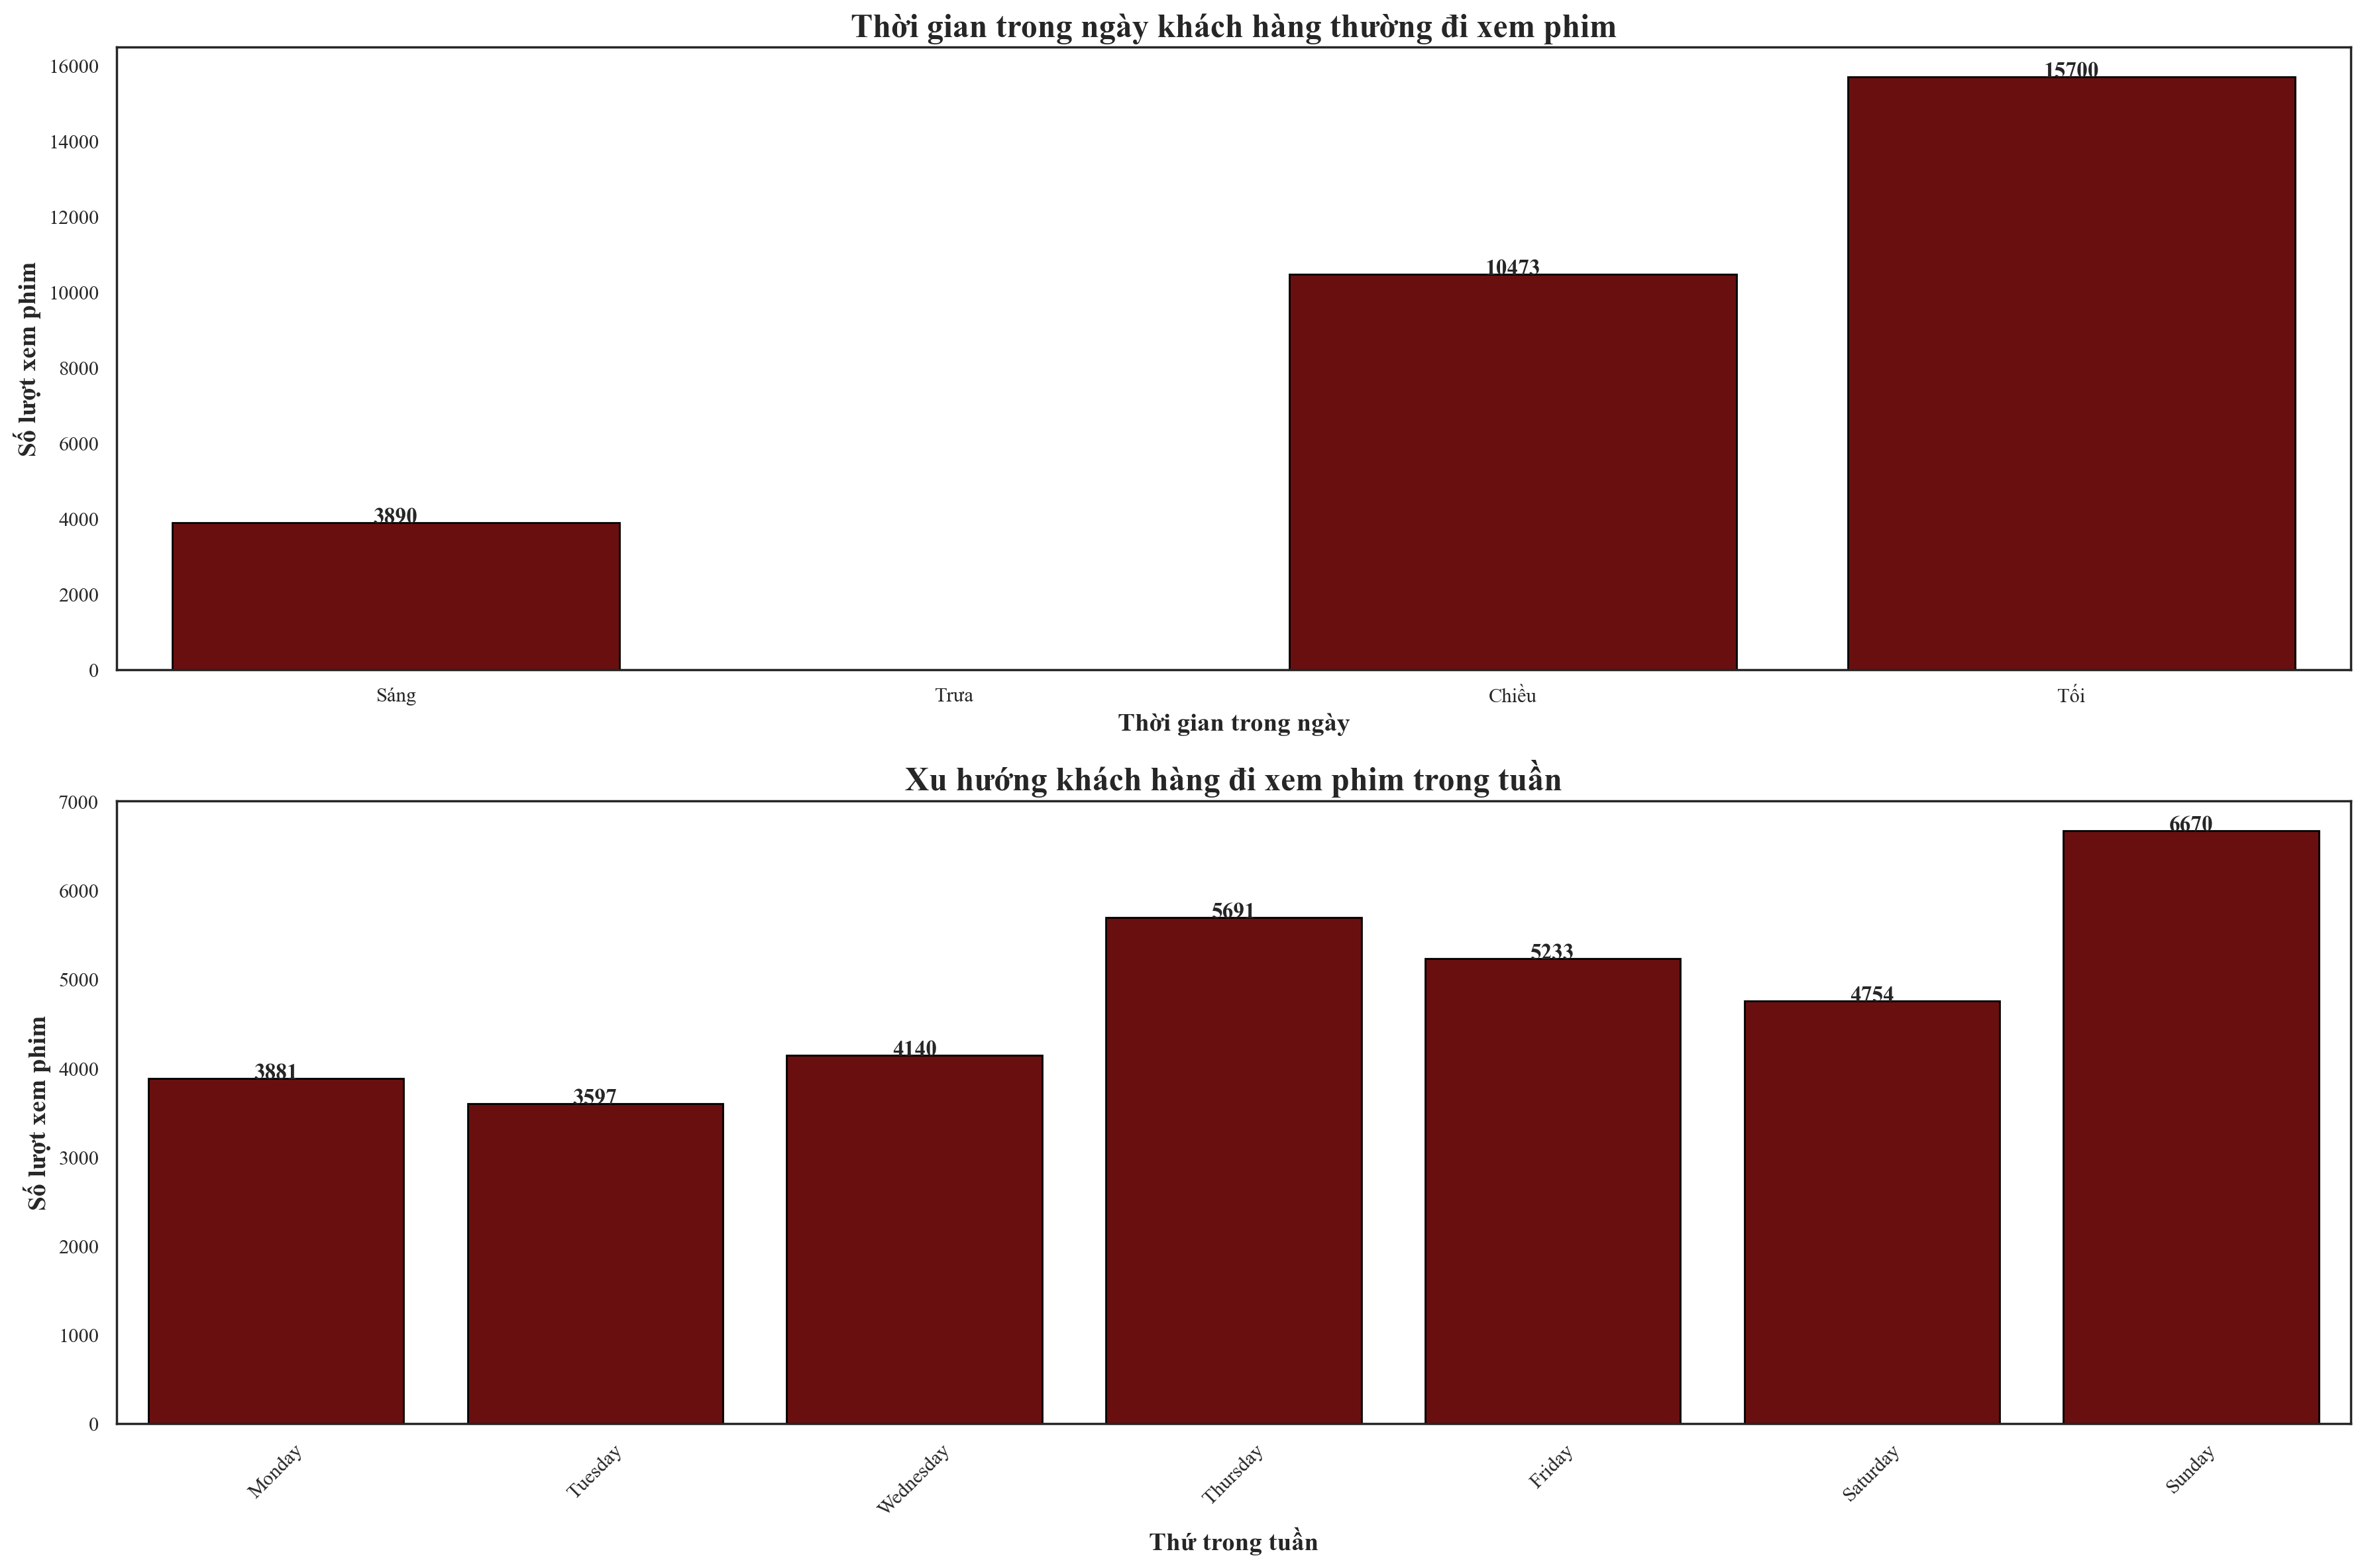

In [194]:
# Cài đặt hiển thị
sns.set_theme(style="white")
plt.rcParams['font.family'] = 'Times New Roman'

# Thứ tự các ngày trong tuần
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Tạo figure với 2 biểu đồ dọc
fig, axs = plt.subplots(2, 1, figsize=(18, 12), dpi=200)
plt.subplots_adjust(hspace=0.4)

# Biểu đồ 1: Phân bố theo thời gian trong ngày
sns.countplot(data=df_final, x='Time of day', order=['Sáng', 'Trưa', 'Chiều', 'Tối'],
              color='#780000', edgecolor='black', ax=axs[0])
axs[0].set_title('Thời gian trong ngày khách hàng thường đi xem phim', fontsize=18, fontweight='bold')
axs[0].set_xlabel('Thời gian trong ngày', fontsize=14, fontweight='bold')
axs[0].set_ylabel('Số lượt xem phim', fontsize=14, fontweight='bold')
axs[0].grid(False)

# Ghi số liệu trên cột
for p in axs[0].patches:
    height = int(p.get_height())
    axs[0].annotate(f'{height}', 
                    (p.get_x() + p.get_width() / 2., height + 1),
                    ha='center', fontsize=12, fontweight='bold')

# Biểu đồ 2: Phân bố theo ngày trong tuần
sns.countplot(data=df_final, x='Weekday', order=weekday_order,
              color='#780000', edgecolor='black', ax=axs[1])
axs[1].set_title('Xu hướng khách hàng đi xem phim trong tuần', fontsize=18, fontweight='bold')
axs[1].set_xlabel('Thứ trong tuần', fontsize=14, fontweight='bold')
axs[1].set_ylabel('Số lượt xem phim', fontsize=14, fontweight='bold')
axs[1].tick_params(axis='x', rotation=45)
axs[1].grid(False)

# Ghi số liệu trên cột
for p in axs[1].patches:
    height = int(p.get_height())
    axs[1].annotate(f'{height}', 
                    (p.get_x() + p.get_width() / 2., height + 1),
                    ha='center', fontsize=12, fontweight='bold')

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

##### c. Theo tháng

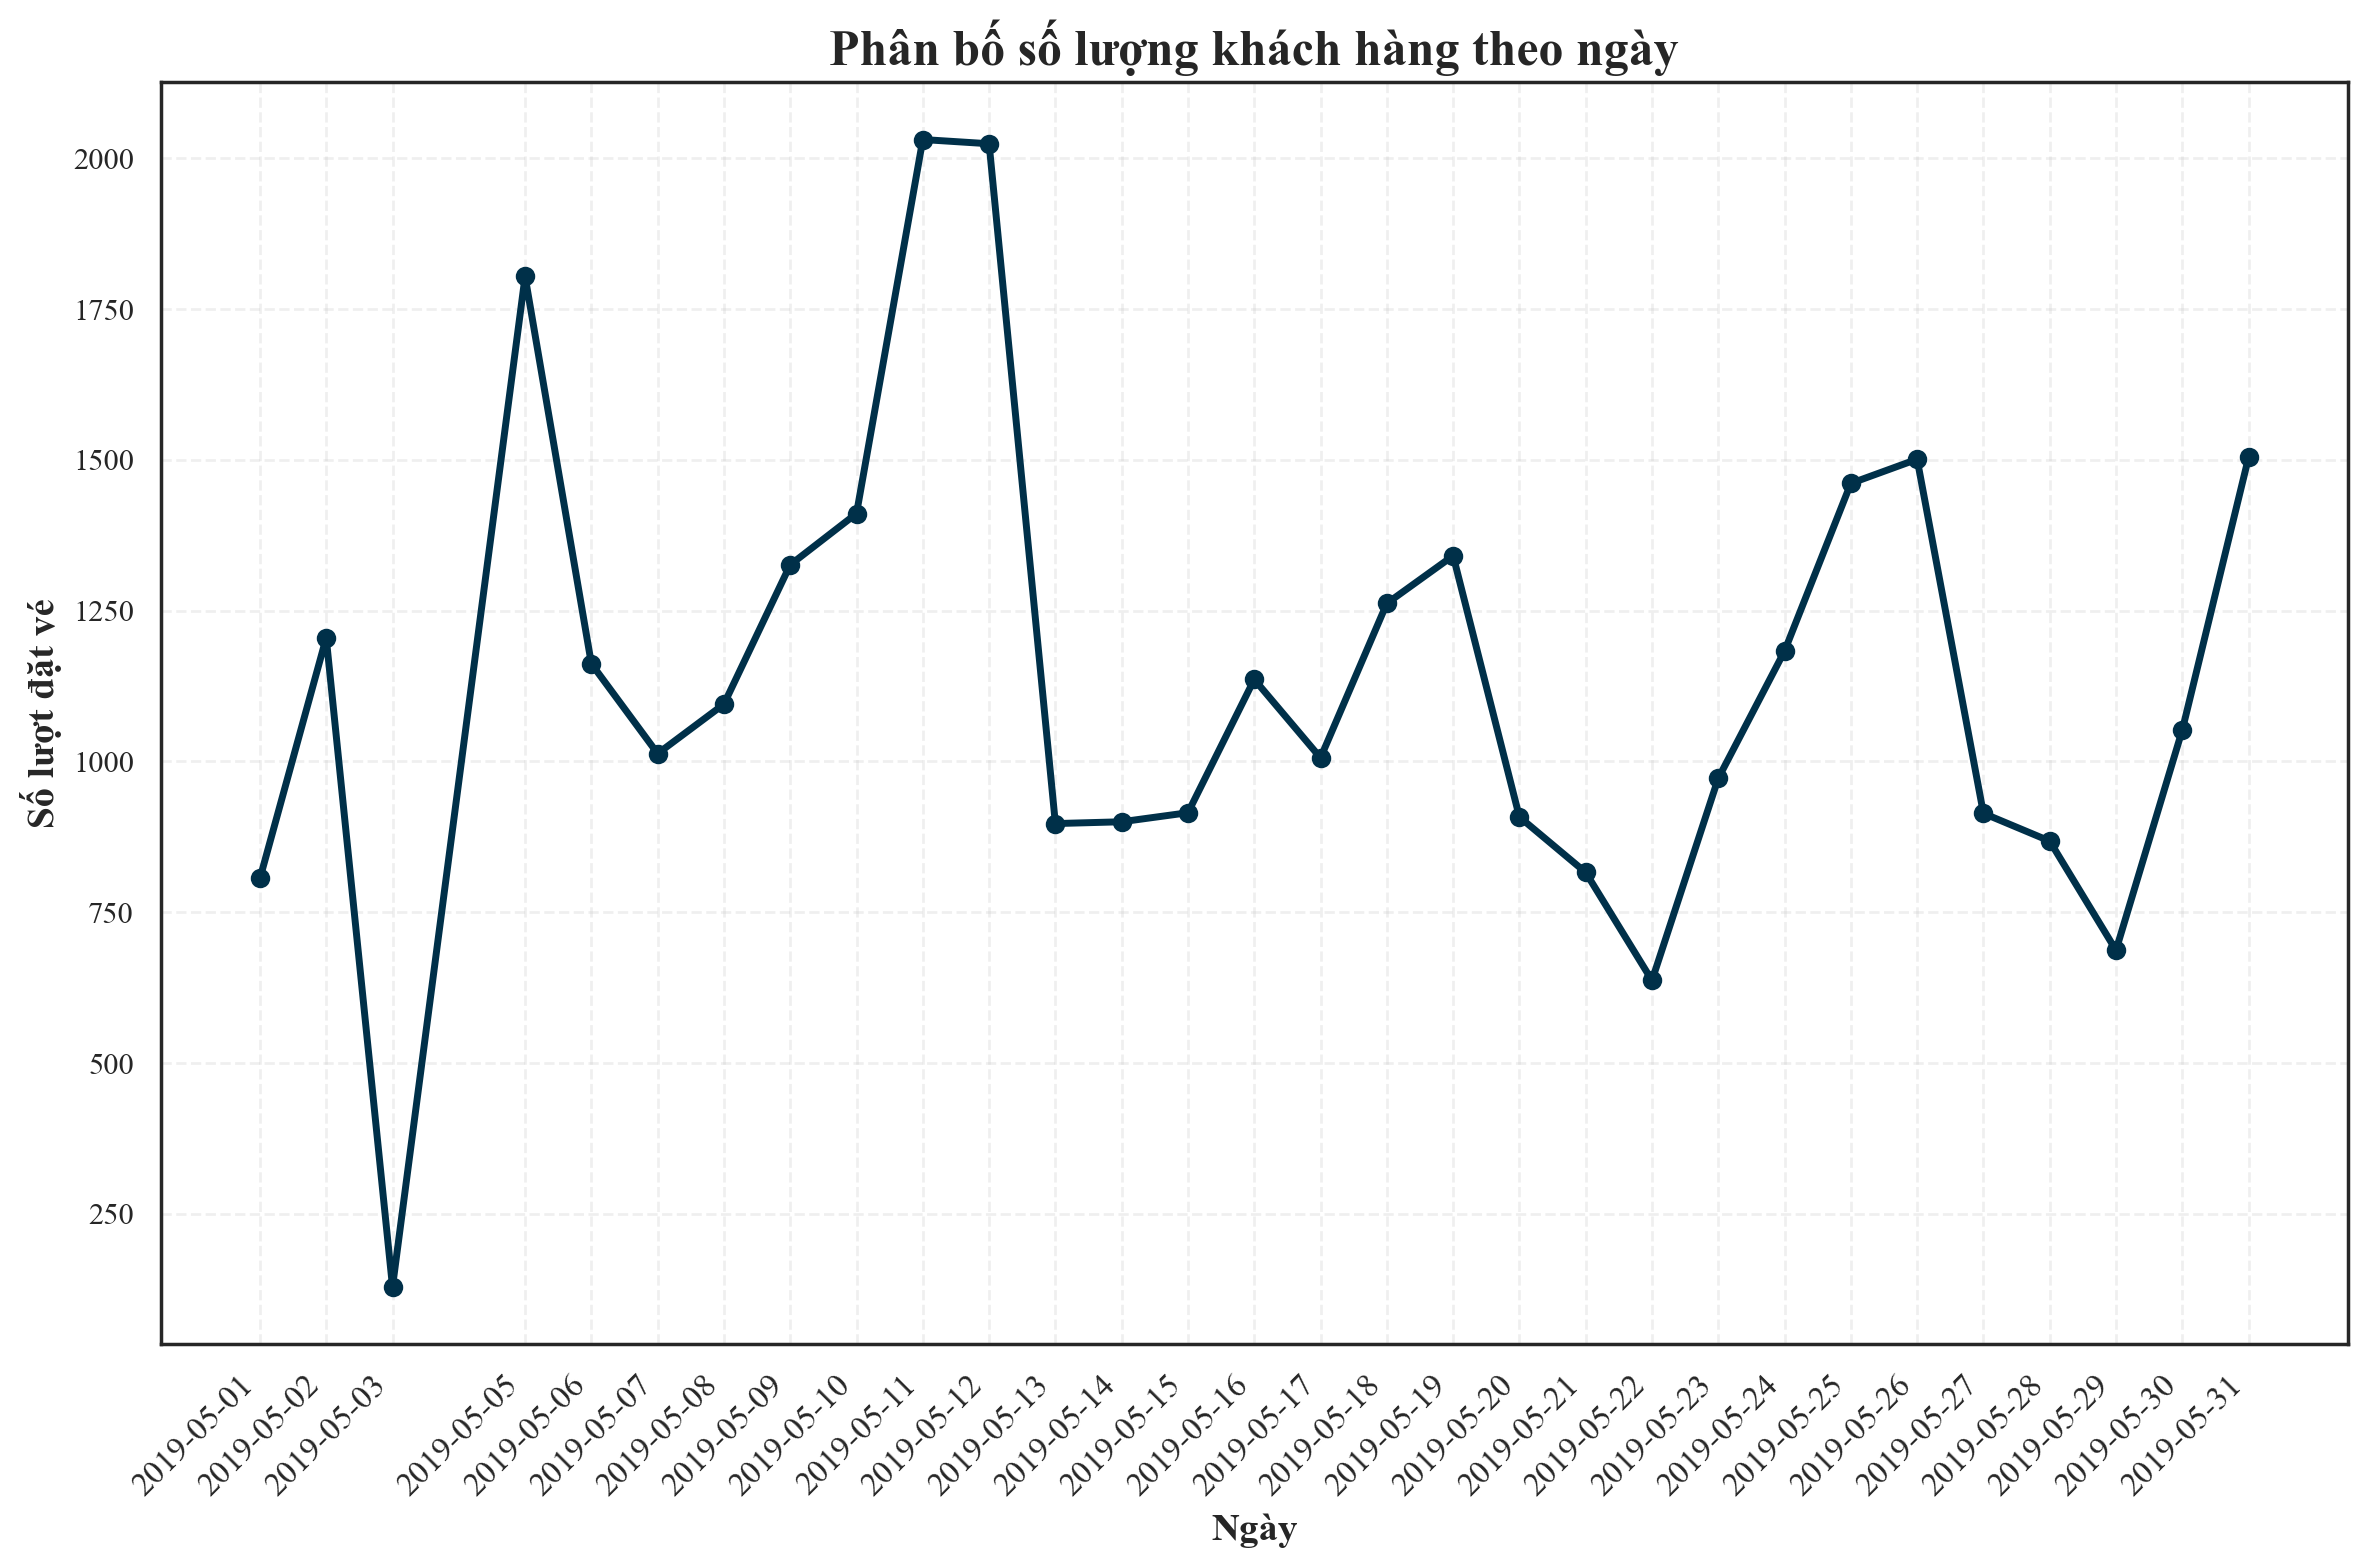

In [195]:
# Cài đặt theme và font
sns.set_theme(style="white")
plt.rcParams['font.family'] = 'Times New Roman'

# Chuyển đổi cột 'saledate' sang kiểu datetime nếu chưa
df_final['saledate'] = pd.to_datetime(df_final['saledate'], errors='coerce')

# Đếm số lượng vé bán theo từng ngày
date_counts = df_final['saledate'].value_counts().sort_index()

# Tạo biểu đồ đường
plt.figure(figsize=(12, 8), dpi=200)
plt.plot(date_counts.index, date_counts.values, color='#003049', linewidth=2.5, marker='o')

# Tiêu đề và các thông số
plt.title('Phân bố số lượng khách hàng theo ngày', fontsize=18, fontweight='bold')
plt.xlabel('Ngày', fontsize=14, fontweight='bold')
plt.ylabel('Số lượt đặt vé', fontsize=14, fontweight='bold')

# Thêm tất cả các ngày trong tháng làm ticks trên trục X
plt.xticks(date_counts.index, rotation=45, ha='right', fontsize=12)

# Tạo lưới cho trục y
plt.grid(True, linestyle='--', alpha=0.3)

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

Giờ cao điểm rơi vào khoảng từ 3-4 giờ chiều và cao nhất vào khoảng 6-8 giờ tối, đây là khung giờ vàng và tại hai thời điểm này, số lượng vé bán ra là cao nhất, và để đẩy mạnh các khung giờ khác, tránh bị trống ghế, tại các khung giờ khác như buổi sáng hay chiều, có thể đưa ra các chương trình khuyến mãi để thu hút thêm người xem.

Số lượng vé bán vào các ngày trong tháng 5 có xu hướng không được đồng đều, dựa vào biểu đồ có thể thấy các vấn đề sau:
- Số lượng vé bán cao nhất vào ngày 10-12 của tháng với lượng vé bán vượt mốc 2000 lượt. Đây thường là những ngày lãnh lương của người đi làm nên khách hàng có xu hướng mua sắm và giải trí như đi xem phim. Đây cũng là hai ngày cuối tuần và cũng có thể là ngày chiếu của những bộ phim hot nên doanh số được ghi nhận cao nhất trong tháng.
- Ngày 03/05 có doanh thu thấp nhất, sau khi tìm hiểu đây chính là ngày quốc tang để tỏ lòng tưởng nhớ đồng chí Đại tướng Lê Đức Anh, nên mọi hoạt động vui chơi giải trí trong ngày hôm ấy phải hoãn lại đó cũng là lý do số lượng khách hàng lại giảm mạnh như vậy.
- Một số đỉnh nhỏ xuất hiện lặp lại theo chu kỳ khoảng 7 ngày, gợi ý rằng các ngày cuối tuần (Thứ Bảy, Chủ Nhật) có thể có số lượt đặt vé cao hơn.

Doanh thu rạp phim được ghi nhận cao nhất vào Thứ 5 và Chủ nhật. Do Chủ Nhật là ngày cuối tuần nên khách hàng có xu hướng đi giải trí và thư giãn, còn thứ 5, các rạp chiếu phim thường có những chương trình khuyến mãi, giảm giá cho khách hàng do vậy đây là hai ngày có lượng khách hàng đông và doanh thu cao. 

##### d. ARPC và ARPO

Average Revenue Per User - ARPC

In [196]:
# Xác định số lượng khách hàng
sum_cus = df_unique_customers['customerid'].count()

# Tính tổng doanh thu
df_orders = df_final.drop_duplicates(subset='orderid')
total_revenue = df_orders['total'].sum()

# Tính doanh thu trung bình trên một khách hàng
averg_revenue_per_customer = total_revenue / sum_cus

# Kết quả
print(f"Doanh thu trung bình trên một khách hàng là: {averg_revenue_per_customer:,.0f} VND")

Doanh thu trung bình trên một khách hàng là: 398,689 VND


Average Revenue Per Order - ARPO

In [197]:
# Giữ lại order id duy nhất
# Giữ lại orderid duy nhất
df_unique_order = df_final.drop_duplicates(subset='orderid')

# Xác định số lượng đơn hàng
sum_ord = df_unique_order['orderid'].count()

# Tính doanh thu trung bình trên một đơn hàng
averg_revenue_per_order = total_revenue / sum_ord

# Hiển thị kết quả
print(f"Doanh thu trung bình trên một đơn hàng là: {averg_revenue_per_order:,.0f} VND")


Doanh thu trung bình trên một đơn hàng là: 115,571 VND


Ta thấy chỉ số ARPU lớn hơn so với mức chi trung bình của người Việt Nam cho việc xem phim chiếu rạp. Ta sẽ đi phân tích số lượng vé đã đặt theo mã khách hàng để làm rõ nguyên nhân:

In [198]:
#Đếm số lượng vé đã đặt theo mã khách hàng
ord_by_cus_counts = df_final.groupby('customerid')['ticketcode'].count().reset_index()

# Đổi tên cột
ord_by_cus_counts.columns = ['Mã khách hàng', 'Số lượng vé đã đặt']

# Sắp xếp theo số lượng khách hàng của từng lĩnh vực
ord_by_cus_sorted = ord_by_cus_counts.sort_values(by='Số lượng vé đã đặt', ascending=False)

# Tỷ trọng số lượng vé đã đặt của từng khách hàng
total_tickets = df_final['ticketcode'].count()
ord_by_cus_sorted['Tỷ trọng(%)'] = ord_by_cus_sorted['Số lượng vé đã đặt'] / total_tickets * 100

# Bảng kết quả
print(ord_by_cus_sorted)

     Mã khách hàng  Số lượng vé đã đặt  Tỷ trọng(%)
3941     KH6166700               10132    29.829830
615     0000029127                7105    20.917977
2161    0001121703                 507     1.492669
3878     KH3742976                  54     0.158983
3624    0003004563                  52     0.153094
...            ...                 ...          ...
3490    0001191166                   1     0.002944
3505    0001191444                   1     0.002944
3546    0001193312                   1     0.002944
3539    0001193248                   1     0.002944
3656    0003008077                   1     0.002944

[4049 rows x 3 columns]


Một số khách hàng đặt mua vé với số lượng lớn cụ thể là ba mã Khách hàng KH6166700, 0000029127, 0001121703.

Phỏng đoán: những khách hàng này có thể là doanh nghiệp, tổ chức sự kiện, bên thứ 3 đặt vé theo lô/bán lại. Để tìm hiểu kỹ hơn, chúng ta sẽ xem lượng vé mua theo ngày của ba mã khách hàng này.

In [199]:
# Đếm số lượng vé đã đặt theo ngày của nhóm khách hàng đã đặt mua số lượng lớn

## Tạo danh sách 3 khách hàng 
selected_cus = ['KH6166700', '0000029127', '0001121703']

## Lọc dữ liệu 3 khách hàng
filt_df = df_final[df_final['customerid'].isin(selected_cus)]

ord_by_cus_counts_day = filt_df.groupby(['customerid','saledate'])['ticketcode'].count().reset_index()

## Đổi tên cột 
ord_by_cus_counts_day.columns = ['Mã khách hàng', 'Ngày bán', 'Số lượng vé đã đặt']

# Hiển thị kết quả
print(ord_by_cus_counts_day)

   Mã khách hàng   Ngày bán  Số lượng vé đã đặt
0     0000029127 2019-05-02                 158
1     0000029127 2019-05-03                  13
2     0000029127 2019-05-05                 239
3     0000029127 2019-05-06                 330
4     0000029127 2019-05-07                 256
..           ...        ...                 ...
75     KH6166700 2019-05-27                 221
76     KH6166700 2019-05-28                 153
77     KH6166700 2019-05-29                 149
78     KH6166700 2019-05-30                 125
79     KH6166700 2019-05-31                 371

[80 rows x 3 columns]


Ba mã khách hàng 0000029127, 0001121703, và KH6166700 đều có số lượng vé mua mỗi ngày rất lớn (có ngày hơn 300 vé), điều này cho thấy đây không phải là khách hàng cá nhân thông thường. Đây có thể là đối tác doanh nghiệp (B2B) hoặc đại lý bán vé, đặt nhiều vé cùng lúc cho nhân viên, trường học, tổ chức, hoặc các chương trình nhóm. Điều này dẫn đến ARPC bị đội lên cao và không phản ánh đúng hành vi của khách hàng cá nhân thông thường.

In [200]:
# Loại trùng lặp giữa customerid và saledate
df_unique_visits = df_final.drop_duplicates(subset=['customerid', 'saledate'])

# Đếm số lần đến rạp (tức là số ngày khác nhau mỗi khách có giao dịch)
visit_counts = df_unique_visits['customerid'].value_counts().reset_index()
visit_counts.columns = ['customerid', 'visit_count']

print(visit_counts)

# Bảng phân phối tần suất khách đến rạp
count_distribution = visit_counts['visit_count'].value_counts().reset_index()
count_distribution.columns = ['Số lần đến rạp trong tháng','Số khách hàng']
print(count_distribution)

      customerid  visit_count
0      KH6166700           30
1     0000029127           29
2     0001121703           21
3     0001185815            9
4     0003009632            8
...          ...          ...
4044  0000000415            1
4045  0000000081            1
4046  0000000109            1
4047  0000000266            1
4048  0000000268            1

[4049 rows x 2 columns]
    Số lần đến rạp trong tháng  Số khách hàng
0                            1           2998
1                            2            727
2                            3            213
3                            4             69
4                            5             27
5                            6              8
6                            7              2
7                           30              1
8                            9              1
9                           21              1
10                          29              1
11                           8              1


Ta nhận thấy phần lớn khách hàng chỉ đến rạp 1-2 lần trong một tháng. Cụ thể, có 2.998 khách hàng (chiếm tỷ lệ rất lớn) chỉ đến 1 lần, và 727 khách đến 2 lần. Tần suất khách hàng đến rạp từ 3 lần trở lên trong tháng giảm dần. Bảng phân phối cho thấy hành vi tiêu dùng chủ yếu là không thường xuyên, phản ánh một tệp khách hàng vãng lai là chính.

In [201]:
# Đếm số lượng khách hàng ứng với số vẽ đã đặt
num_cus_by_ord = ord_by_cus_counts.groupby('Số lượng vé đã đặt')['Mã khách hàng'].count().reset_index()

# Đổi tên cột
num_cus_by_ord.columns = ['Số lượng vé đã đặt', 'Số lượng khách hàng']

# Kết quả
print(num_cus_by_ord)

    Số lượng vé đã đặt  Số lượng khách hàng
0                    1                  357
1                    2                 1532
2                    3                  433
3                    4                  639
4                    5                  263
5                    6                  242
6                    7                  134
7                    8                  126
8                    9                   68
9                   10                   58
10                  11                   32
11                  12                   25
12                  13                   30
13                  14                   25
14                  15                   20
15                  16                   16
16                  17                    8
17                  18                    6
18                  19                    8
19                  20                    2
20                  21                    4
21                  22          

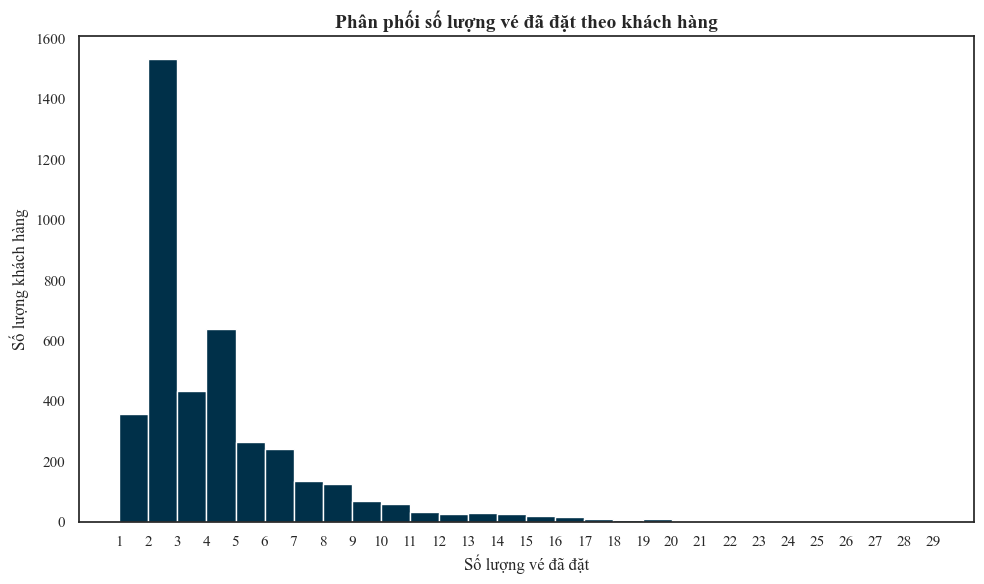

In [202]:
# Kích thước biểu đồ
plt.figure(figsize=(10, 6))
# Vẽ biểu đồ tần suất
plt.hist(
    ord_by_cus_counts['Số lượng vé đã đặt'],
    bins=range(1, 30),
    color='#003049',      # Màu cột
    edgecolor='white'     # Đường viền cột
)
# Tên trục
plt.title('Phân phối số lượng vé đã đặt theo khách hàng', fontsize=14, fontweight='bold')
plt.xlabel('Số lượng vé đã đặt', fontsize=12)
plt.ylabel('Số lượng khách hàng', fontsize=12)

plt.xticks(range(1, 30))  # Hiển thị đầy đủ trục x
plt.tight_layout()
plt.show()

#### 1.2.2 Hành vi chỗ ngồi và xem phim

##### a. Hành vi đi xem phim của khách hàng (1 mình, đi đôi và đi theo nhóm)

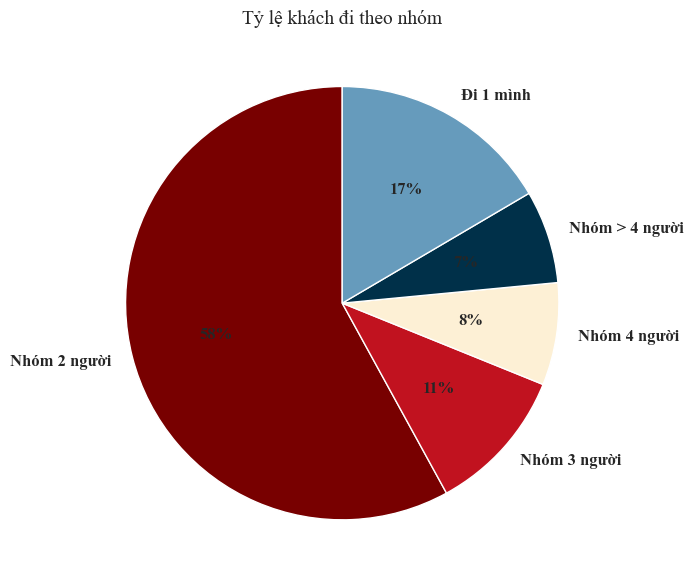

In [203]:
# Tính số người trong mỗi đơn hàng
order_size = df_final.groupby('orderid')['customerid'].count()

# Phân loại nhóm người
def classify_group(n):
    if n == 1:
        return "Đi 1 mình"
    elif n == 2:
        return "Nhóm 2 người"
    elif n == 3:
        return "Nhóm 3 người"
    elif n == 4:
        return "Nhóm 4 người"
    else:
        return "Nhóm > 4 người"

group_df = order_size.reset_index(name='group_size')
group_df['group_label'] = group_df['group_size'].apply(classify_group)

# Tỷ lệ theo nhóm người
group_ratio = group_df['group_label'].value_counts(normalize=True).sort_index() * 100

# Màu dùng chung cho cả 2 biểu đồ
colors = ['#780000', '#C1121F', '#FDF0D5', '#003049', '#669BBC']

# Thay plt.figure() bằng plt.subplots()
fig, ax = plt.subplots(figsize=(14, 6))

# Pie chart: tỷ lệ nhóm người
ax.pie(group_ratio, labels=group_ratio.index, autopct='%1.0f%%', colors=colors,
       startangle=90, textprops={'fontsize': 12, 'weight': 'bold'})
ax.set_title("Tỷ lệ khách đi theo nhóm", fontsize=14)
plt.tight_layout()
plt.show()


Phần lớn khách hàng đi xem phim theo nhóm 2 người, chiếm 58%, cho thấy đây là hình thức phổ biến nhất – phù hợp với đặc điểm của các cặp đôi hoặc bạn bè thân thiết. Ngoài ra, tỷ lệ khách đi một mình chiếm 17%, cho thấy xu hướng cá nhân hóa trong trải nghiệm giải trí đang dần phổ biến.

##### b. Loại chỗ ngồi (Đơn và Đôi)

C:\Users\Admin\AppData\Local\Temp\ipykernel_16820\4199241570.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='slot type', data=df_final, palette=['#780000', '#FDF0D5'], ax=ax, edgecolor='black')
C:\Users\Admin\AppData\Local\Temp\ipykernel_16820\4199241570.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center', fontsize=12)


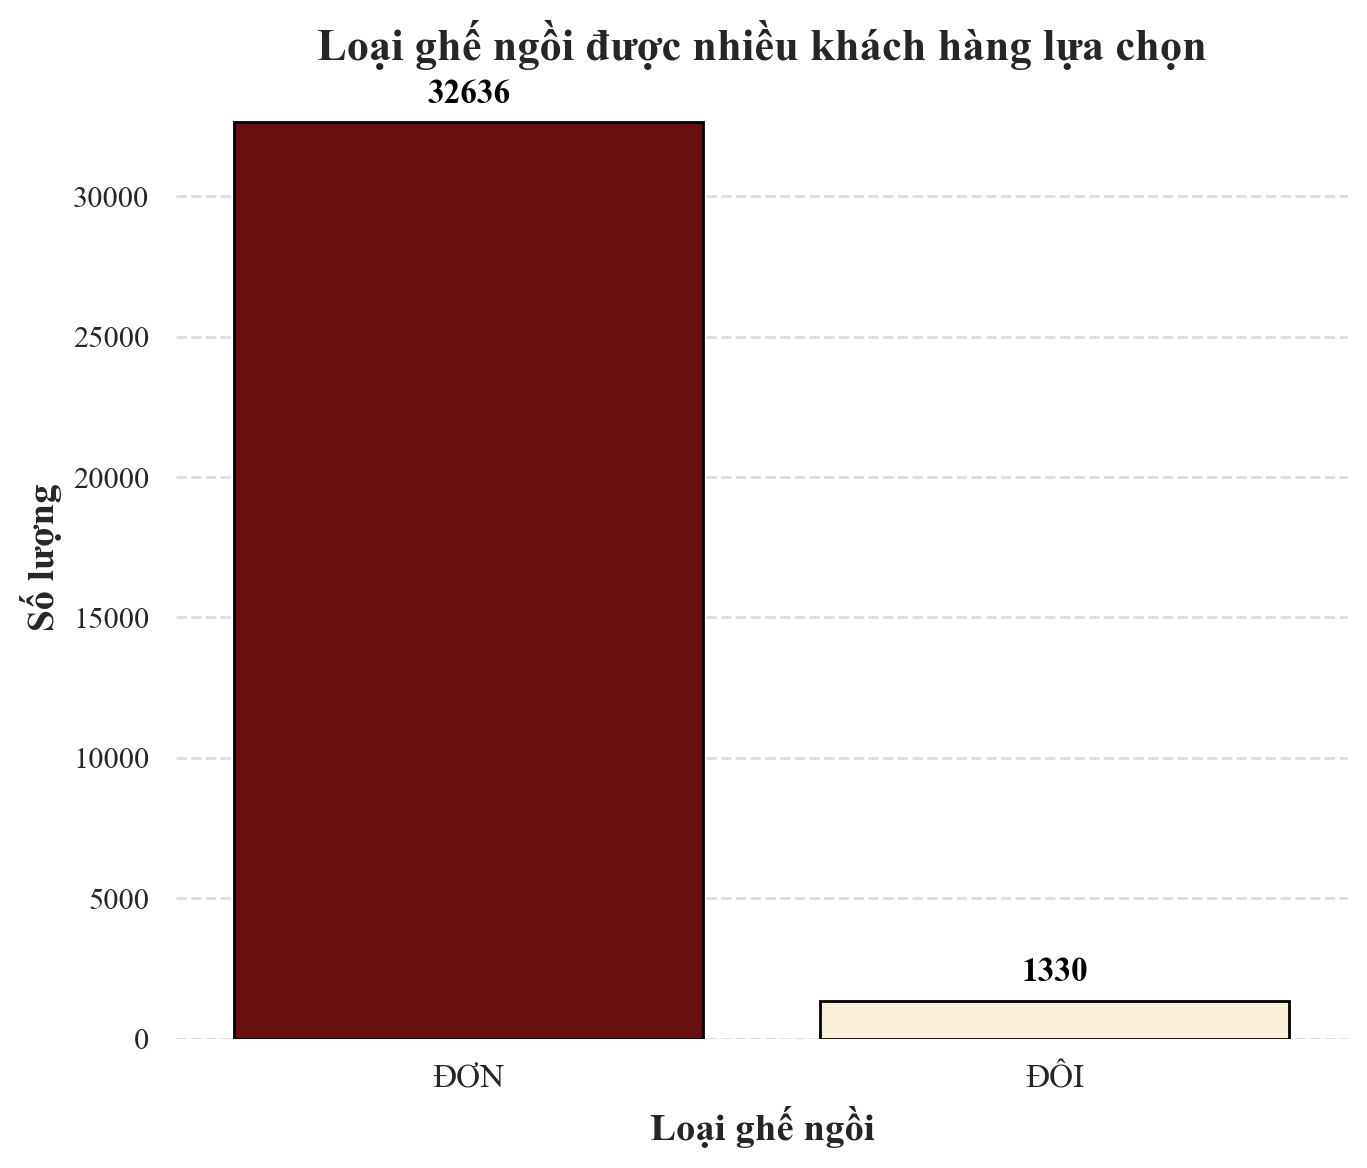

In [204]:
sns.set_theme(style="whitegrid")
plt.rcParams['font.family'] = 'Times New Roman'

# Đếm số lượng ghế ngồi theo từng loại
seat_counts = df_final['slot type'].value_counts().astype(int)

# Vẽ biểu đồ loại ghế
fig, ax = plt.subplots(figsize=(7, 6), dpi=200)
sns.countplot(x='slot type', data=df_final, palette=['#780000', '#FDF0D5'], ax=ax, edgecolor='black')
ax.set_title('Loại ghế ngồi được nhiều khách hàng lựa chọn', fontsize=16, fontweight='bold')
ax.set_xlabel('Loại ghế ngồi', fontsize=14, fontweight='bold')
ax.set_ylabel('Số lượng', fontsize=14, fontweight='bold')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center', fontsize=12)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, fontweight='bold', color='black',
                xytext=(0, 10), textcoords='offset points')

ax.grid(True, axis='y', linestyle='--', alpha=0.7)
for spine in ax.spines.values():
    spine.set_visible(False)

plt.tight_layout()
plt.show()


Khách hàng có xu hướng lựa chọn ghế đơn áp đảo so với ghế đôi, điều này có thể xuất phát từ mức giá thấp hơn, không kèm phụ phí và sự linh hoạt hơn về vị trí so với ghế đôi – vốn thường có giá cao và số lượng chỗ ngồi hạn chế.

##### c. Vị trí ghế ngồi (Hàng ghế A-K)

In [205]:
# lấy tên hàng ghế từ A-K
df_final['slot_letter'] = df_final['slot'].str[0]  
# 17A, 17B, 17C, 17D, 17E, 17F, 17G, 17H, 19I, 16J, 19K

In [206]:
slot_ticketcode = df_final.groupby("slot_letter")['ticketcode'].count()
print(slot_ticketcode)
slot_ticketcode = slot_ticketcode.sort_values(ascending=False)

slot_letter
A     538
B    1007
C    1811
D    3497
E    5282
F    5774
G    5585
H    4455
I    3333
J    1587
K    1097
Name: ticketcode, dtype: int64


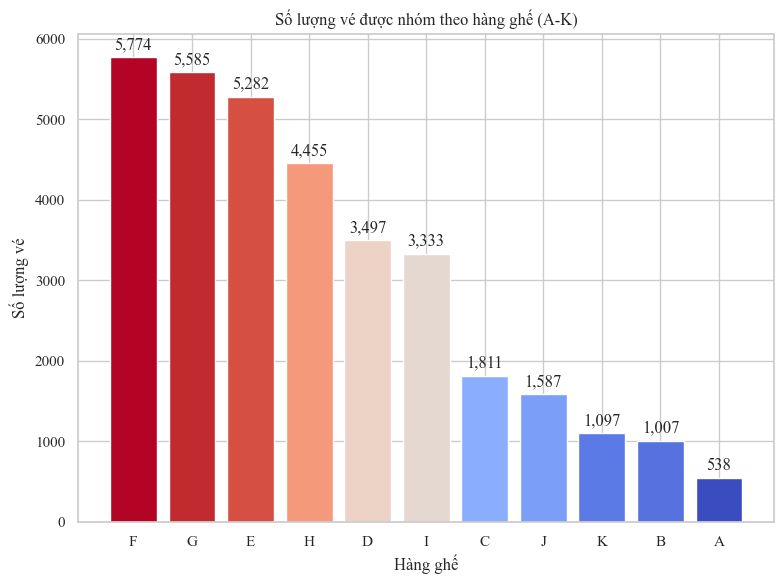

In [207]:
fig, ax = plt.subplots(figsize=(8, 6))

# Normalize giá trị để ánh xạ màu
norm = plt.Normalize(slot_ticketcode.values.min(), slot_ticketcode.values.max())
colors1 = cm.coolwarm(norm(slot_ticketcode.values)) 

slot_ticketcode_barplot = ax.bar(slot_ticketcode.index, slot_ticketcode.values, color = colors1)

ax.set_title("Số lượng vé được nhóm theo hàng ghế (A-K)")
ax.set_xlabel("Hàng ghế")
ax.yaxis.set_major_locator(ticker.MultipleLocator(1000))
ax.bar_label(slot_ticketcode_barplot, labels=[f"{v:,}" for v in slot_ticketcode.values], padding=3)
ax.set_ylabel("Số lượng vé")

plt.tight_layout()
plt.show()

Các hàng ghế F,G,E là các vị trí được khách hàng ưa chuộng, có số lượng vé bán ra cao nhất. Đây là các hàng ghế gần trung tâm và có tầm nhìn tốt
Hàng A là vị trí ít được ưa chuộng nhất, lí do có thể là vì vị trí quá gần màn hình, góc nhìn không thuận lợi, hoặc các yếu tố khác.
Có thể thấy vị trí ghế ngồi có ảnh hưởng lớn đến quyết định mua vé của khách hàng.

C:\Users\Admin\AppData\Local\Temp\ipykernel_16820\4121927274.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hang_counts.index, y=hang_counts.values, palette=["#780000", "#C1121F", "#FDF0D5", "#003049", "#669BBC"], ax=axes[0])
C:\Users\Admin\AppData\Local\Temp\ipykernel_16820\4121927274.py:8: UserWarning: 
The palette list has fewer values (5) than needed (190) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=hang_counts.index, y=hang_counts.values, palette=["#780000", "#C1121F", "#FDF0D5", "#003049", "#669BBC"], ax=axes[0])
C:\Users\Admin\AppData\Local\Temp\ipykernel_16820\4121927274.py:24: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'A01' has dtype incompatible with int64, please explicitly cast to a compatible dtype firs

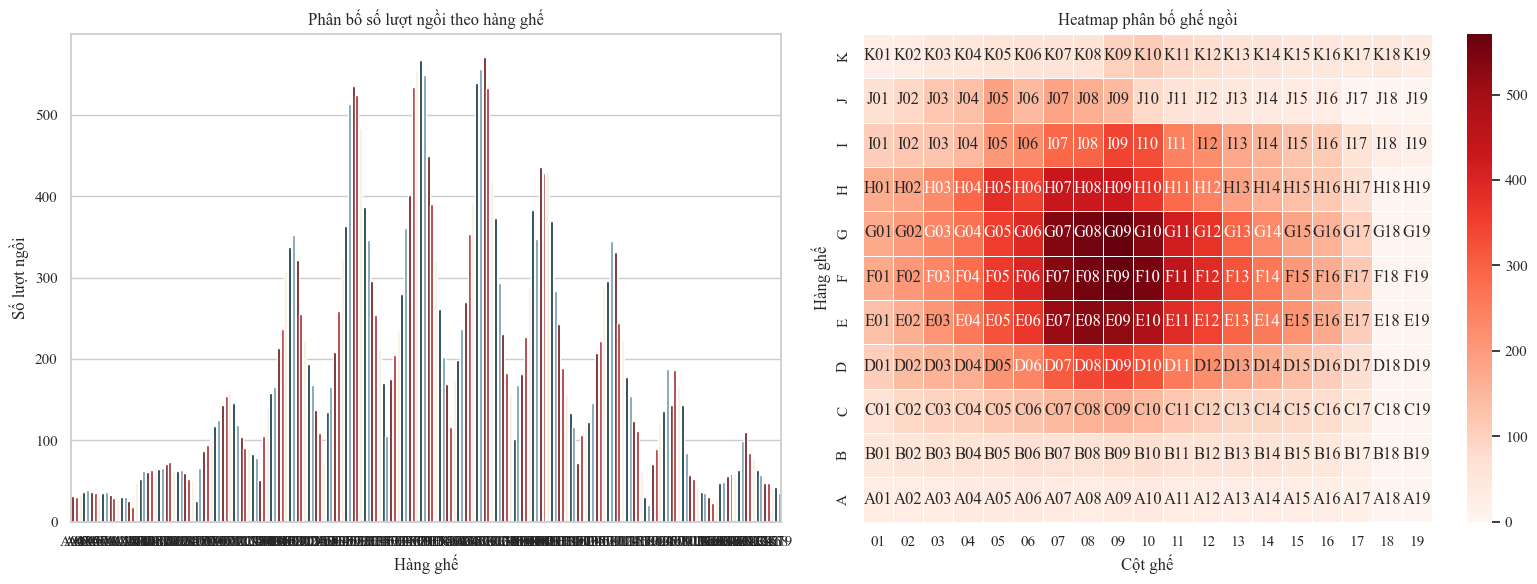

In [208]:
# Đếm số lượt theo hàng ghế
hang_counts = df_final["slot"].value_counts().sort_index()

# Tạo figure với 2 subplot
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Vẽ barplot phân bố số lượt ngồi theo hàng ghế
sns.barplot(x=hang_counts.index, y=hang_counts.values, palette=["#780000", "#C1121F", "#FDF0D5", "#003049", "#669BBC"], ax=axes[0])
axes[0].set_title("Phân bố số lượt ngồi theo hàng ghế")
axes[0].set_xlabel("Hàng ghế")
axes[0].set_ylabel("Số lượt ngồi")

# Sự phân bố ghế ngồi
df_final["Hàng ghế"] = df_final["slot"].str.extract(r"([A-Z])")
df_final["Cột ghế"] = df_final["slot"].str.extract(r"(\d+)")

# Đếm số lượt ngồi theo vị trí
heatmap_data = df_final.groupby(["Hàng ghế", "Cột ghế"]).size().unstack(fill_value=0)

# Tạo bảng ghi nhãn là tên ghế (A01, B05, ...)
labels = heatmap_data.copy()
for row in labels.index:
    for col in labels.columns:
        labels.loc[row, col] = f"{row}{col}"

# Vẽ heatmap phân bố ghế ngồi
sns.heatmap(
    heatmap_data.sort_index(ascending=False),
    cmap="Reds",  # Đổi màu palette của heatmap sang sắc đỏ
    linewidths=0.5,
    annot=labels.sort_index(ascending=False),
    fmt="s", 
    ax=axes[1]
)
axes[1].set_title("Heatmap phân bố ghế ngồi")
axes[1].set_xlabel("Cột ghế")
axes[1].set_ylabel("Hàng ghế")


plt.tight_layout()
plt.show()

Các ghế ở vị trí trung tâm của rạp luôn là sự ưu tiên của khách hàng khi mua vé do vị trí này mang lại trải nghiệm tốt hơn cho khách hàng khi có thể xem phim một cách bao quát, rõ ràng và vừa tầm nhìn (khoảng từ D07 đến G13)

Lượng khách giảm dần vế phía hai bên và các hàng đầu cuối, cho thấy các ghế ở hai bên cánh và các hàng ghế đầu (A, B) và cuối (J, K) ít được khách hàng lựa chọn hơn

#### 1.2.3 Giao dịch vé và dịch vụ đi kèm

##### a. Loại vé (Thành viên và Không thành viên)

C:\Users\Admin\AppData\Local\Temp\ipykernel_16820\2840657787.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='ticket type', data=df_final, palette=['#780000', '#FDF0D5'], ax=ax, edgecolor='black')
C:\Users\Admin\AppData\Local\Temp\ipykernel_16820\2840657787.py:9: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.countplot(x='ticket type', data=df_final, palette=['#780000', '#FDF0D5'], ax=ax, edgecolor='black')
C:\Users\Admin\AppData\Local\Temp\ipykernel_16820\2840657787.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center', fontsize=12)


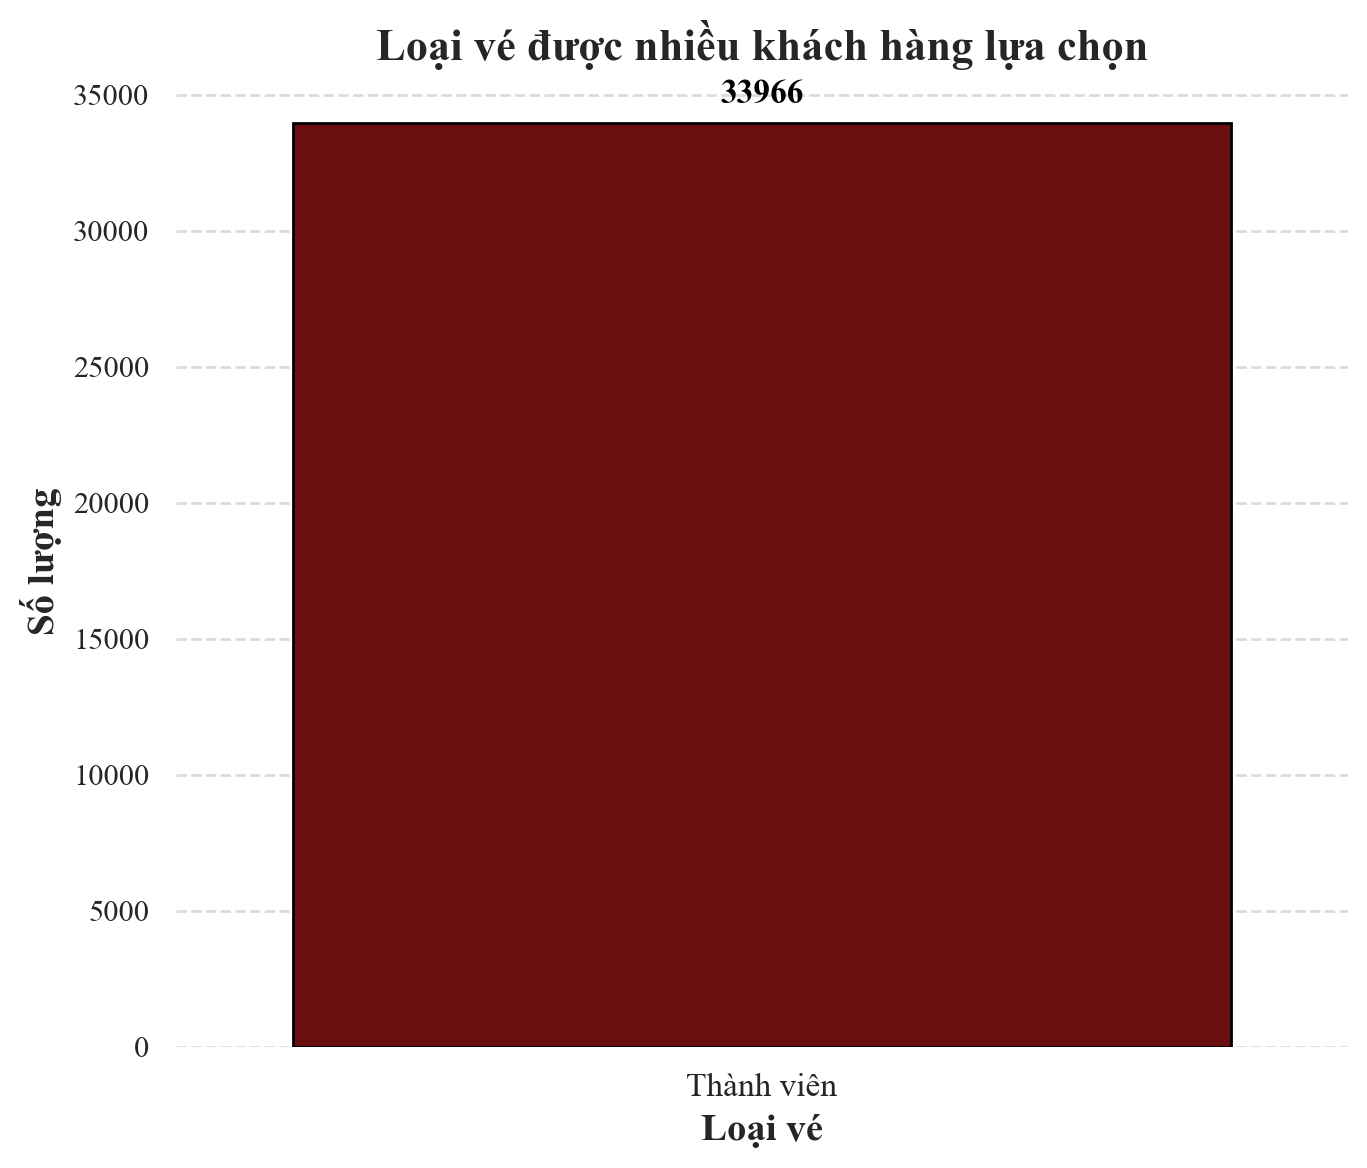

In [209]:
sns.set_theme(style="whitegrid")
plt.rcParams['font.family'] = 'Times New Roman'

# Đếm số lượng vé bán theo từng loại vé
ticket_counts = df_final['ticket type'].value_counts().astype(int)

# Vẽ biểu đồ loại vé
fig, ax = plt.subplots(figsize=(7, 6), dpi=200)
sns.countplot(x='ticket type', data=df_final, palette=['#780000', '#FDF0D5'], ax=ax, edgecolor='black')
ax.set_title('Loại vé được nhiều khách hàng lựa chọn', fontsize=16, fontweight='bold')
ax.set_xlabel('Loại vé', fontsize=14, fontweight='bold')
ax.set_ylabel('Số lượng', fontsize=14, fontweight='bold')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center', fontsize=12)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, fontweight='bold', color='black',
                xytext=(0, 10), textcoords='offset points')

ax.grid(True, axis='y', linestyle='--', alpha=0.7)
for spine in ax.spines.values():
    spine.set_visible(False)

plt.tight_layout()
plt.show()

##### b. Giá vé

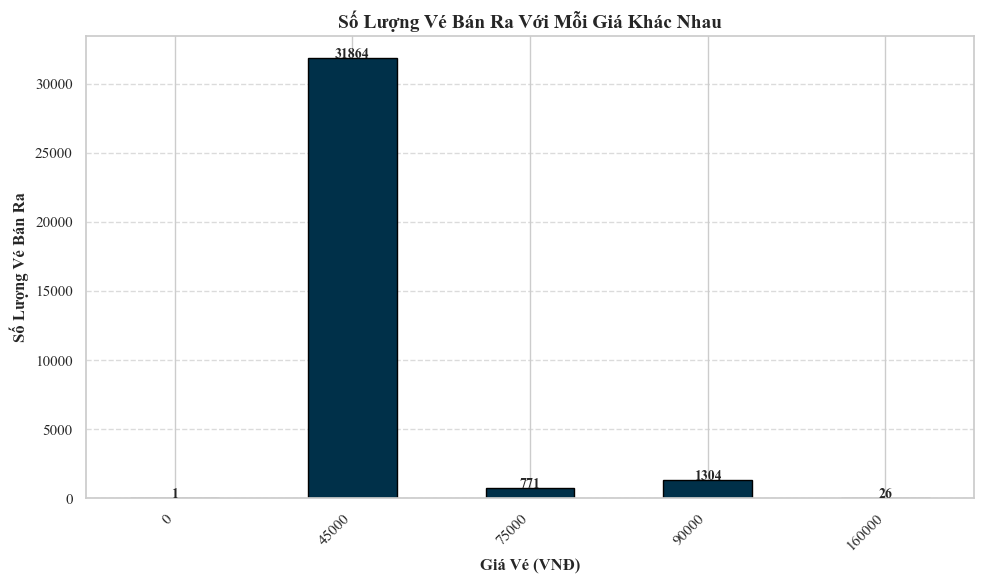

In [210]:
# Số lượng vé được bán ra với mỗi giá khác nhau
# Đếm số lượng vé bán ra theo mỗi giá vé (ticket price)
ticket_counts_by_price = df_final.groupby('ticket price').size()

# Vẽ biểu đồ cột số lượng vé bán ra theo giá vé
plt.figure(figsize=(10, 6))
ticket_counts_by_price.plot(kind='bar', color='#003049', edgecolor='black')

# Tiêu đề và thông số
plt.title('Số Lượng Vé Bán Ra Với Mỗi Giá Khác Nhau', fontsize=14, fontweight='bold')
plt.xlabel('Giá Vé (VNĐ)', fontsize=12, fontweight='bold')
plt.ylabel('Số Lượng Vé Bán Ra', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Hiển thị giá trị số lượng vé lên từng cột
for i, v in enumerate(ticket_counts_by_price):
    plt.text(i, v + 0.5, f'{v}', ha='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

Mức giá vé phổ biến nhất là 45.000 đồng cho ghế đơn và 90.000 đồng cho ghế đôi – cả hai đều ở mức hợp lý và vừa túi tiền. Điều này cho thấy phần lớn khách hàng của rạp thuộc nhóm có thu nhập trung bình đến thấp. Đây cũng là cơ sở để lý giải vì sao tệp khách hàng chủ yếu là học sinh và sinh viên – những đối tượng có xu hướng tìm kiếm trải nghiệm giải trí với chi phí tiết kiệm.

##### c. POPCORN

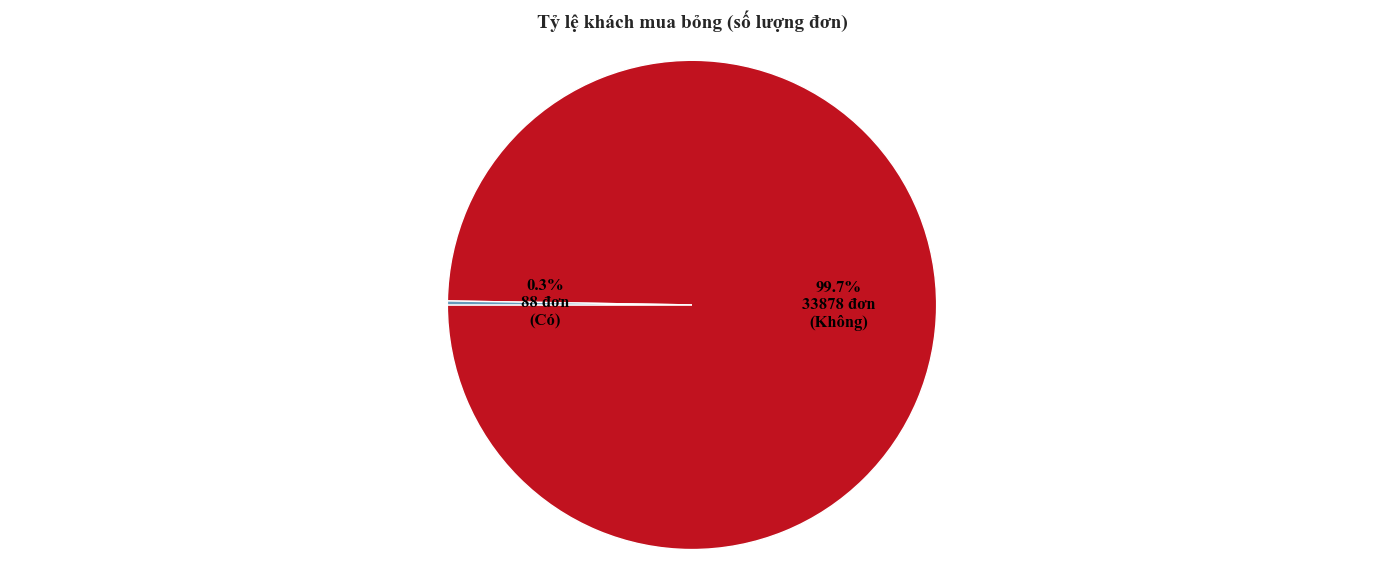

In [211]:
# Khách hàng đi xem phim có xu hướng mua popcorn hay không?
# Tính doanh thu theo trạng thái mua bỏng
popcorn_counts = df_final['popcorn'].str.lower().value_counts()

# Hàm hiển thị: phần trăm và số lượng đơn
def autopct_format(pct, allvals):
    count = int(round(pct / 100. * sum(allvals)))
    return f"{pct:.1f}%\n{count} đơn"

# Vẽ biểu đồ
plt.figure(figsize=(14, 6))
wedges, texts, autotexts = plt.pie(
    popcorn_counts.values,
    autopct=lambda pct: autopct_format(pct, popcorn_counts.values),
    colors=['#C1121F', '#669BBC'],
    startangle=180,
    wedgeprops={'edgecolor': 'white'},
    textprops={'fontsize': 12, 'fontweight': 'bold', 'color': 'black'},
)

# Gán nhãn "có"/"không"
for i, (autotext, label) in enumerate(zip(autotexts, popcorn_counts.index)):
    autotext.set_text(f"{autotext.get_text()}\n({label.capitalize()})")
    autotext.set_fontweight('bold')

plt.title('Tỷ lệ khách mua bỏng (số lượng đơn)', fontsize=14, fontweight='bold')
plt.axis('equal')
plt.tight_layout()
plt.show()

Gần như tất cả khách hàng đến rạp đều chỉ mua vé xem phim và không mua bỏng. Số lượng khách hàng order thêm bỏng là rất ít, chỉ chiếm khoảng 0.3%, một con số rất nhỏ. Điều này cho thấy rạp chiếu phim hiện chưa tận dụng hiệu quả tiềm năng doanh thu từ các sản phẩm phụ trợ, đồng thời phản ánh nhu cầu thấp hoặc chiến lược bán hàng chưa đủ hấp dẫn để kích thích hành vi chi tiêu thêm của khách.

#### 1.2.4 Đặc điểm phim

##### a. Thể loại

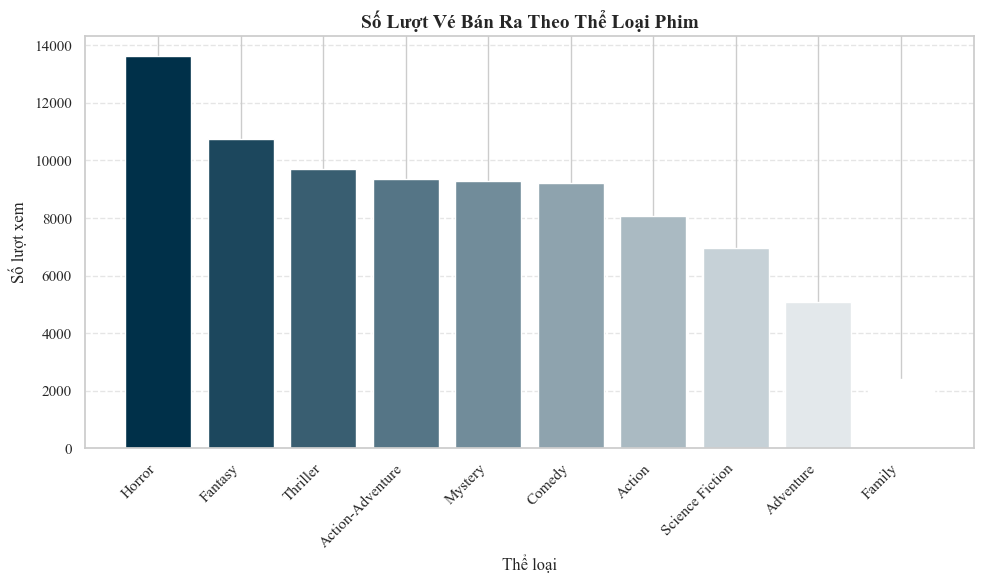

In [212]:
# #Thể loại phim có nhiều khách hàng lựa chọn là gì? Đến từ đất nước nào? Có rating nào?
# Tách thể loại thành từng dòng
all_genres = df_final['listed_in'].str.split(',').explode().str.strip()

# Đếm số lượt xem mỗi thể loại
genre_counts = all_genres.value_counts().sort_values(ascending=False)

# Lấy Top 10 thể loại phổ biến nhất
top_genres = genre_counts.head(10)

# Tạo dải màu nhạt dần từ #003049 (đậm) đến #669BBC (nhạt)
base_color = mcolors.to_rgb('#003049')
gradient_colors = [mcolors.to_hex((base_color[0] + (1 - base_color[0]) * i / 9,
                                   base_color[1] + (1 - base_color[1]) * i / 9,
                                   base_color[2] + (1 - base_color[2]) * i / 9)) for i in range(10)]

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
bars = plt.bar(top_genres.index, top_genres.values, color=gradient_colors)
plt.title("Số Lượt Vé Bán Ra Theo Thể Loại Phim", fontsize=14, fontweight='bold')
plt.xlabel("Thể loại", fontsize=12)
plt.ylabel("Số lượt xem", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Khách hàng có xu hướng ưa chuộng các thể loại phim mang tính hồi hộp và kịch tính như Horror, Fantasy và Thriller. Trong đó, thể loại Horror ghi nhận số vé bán ra cao nhất, gần chạm mốc 14.000 lượt. Ngược lại, các thể loại nhẹ nhàng như Family và Adventure lại ít được quan tâm, cho thấy thị hiếu khán giả thiên về trải nghiệm cảm giác mạnh và hấp dẫn hơn là nội dung giải trí nhẹ nhàng.

##### b. Rating 

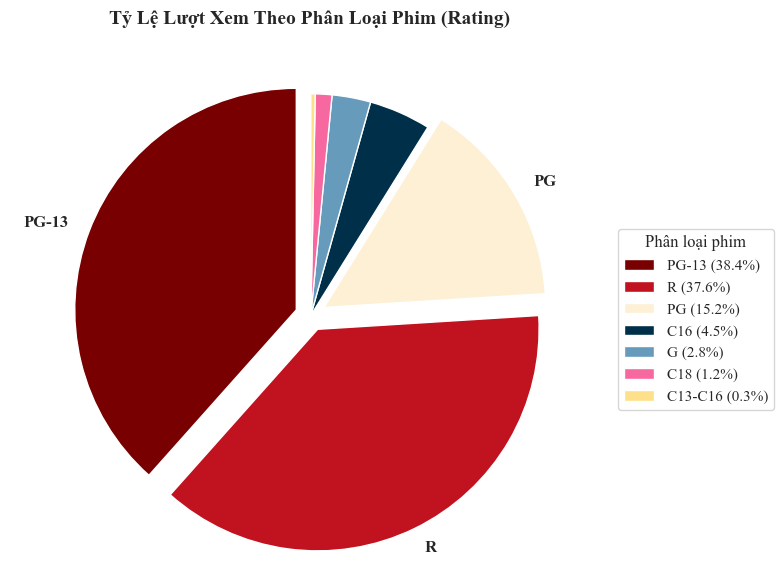

In [213]:
# Tính phần trăm lượt xem theo rating
rating_percent = df_final['rating'].value_counts(normalize=True).sort_values(ascending=False) * 100

# Lấy top 3 thể loại lớn nhất
top3 = rating_percent.head(3).index.tolist()

# Gắn label cho top 3, còn lại để trống
labels = [label if label in top3 else '' for label in rating_percent.index]

# Danh sách label cho legend: "PG-13 (38.4%)"
legend_labels = [f"{label} ({pct:.1f}%)" for label, pct in zip(rating_percent.index, rating_percent.values)]

# Màu sắc tùy chọn (đảm bảo đủ số màu)
base_colors = ['#780000', '#C1121F', '#FDF0D5', '#003049', '#669BBC', '#f768a1', '#fee08b']
colors = base_colors * (len(rating_percent) // len(base_colors) + 1)
colors = colors[:len(rating_percent)]

# Tách (explode) 3 phần lớn nhất ra
explode = [0.07 if label in top3 else 0 for label in rating_percent.index]

# Vẽ pie chart
plt.figure(figsize=(8, 6))
plt.pie(
    rating_percent,
    labels=labels,
    explode=explode,
    colors=colors,
    startangle=90,
    textprops={'fontsize': 12, 'weight': 'bold'}
)

# Legend bên phải
plt.legend(legend_labels, title="Phân loại phim", loc="center left", bbox_to_anchor=(1, 0.5), fontsize=11)

# Tiêu đề và căn chỉnh
plt.title("Tỷ Lệ Lượt Xem Theo Phân Loại Phim (Rating)", fontsize=14, pad=30, fontweight='bold')
plt.axis('equal')
plt.tight_layout()
plt.show()


Khách hàng có xu hướng lựa chọn các bộ phim được phân loại PG-13 và R, chiếm tỷ lệ áp đảo lần lượt là 38.4% và 37.6%. Điều này cho thấy phần lớn khán giả là thanh thiếu niên và người trưởng thành, ưa thích những bộ phim có nội dung hấp dẫn, kịch tính hoặc mang yếu tố hành động, kinh dị. Trong khi đó, các phim phân loại thấp hơn như PG, G hay C16 chỉ chiếm tỷ lệ nhỏ, cho thấy phim gia đình hoặc phim phù hợp với trẻ em không phải là lựa chọn phổ biến tại rạp trong thời điểm này.

##### c. Quốc gia sản xuất

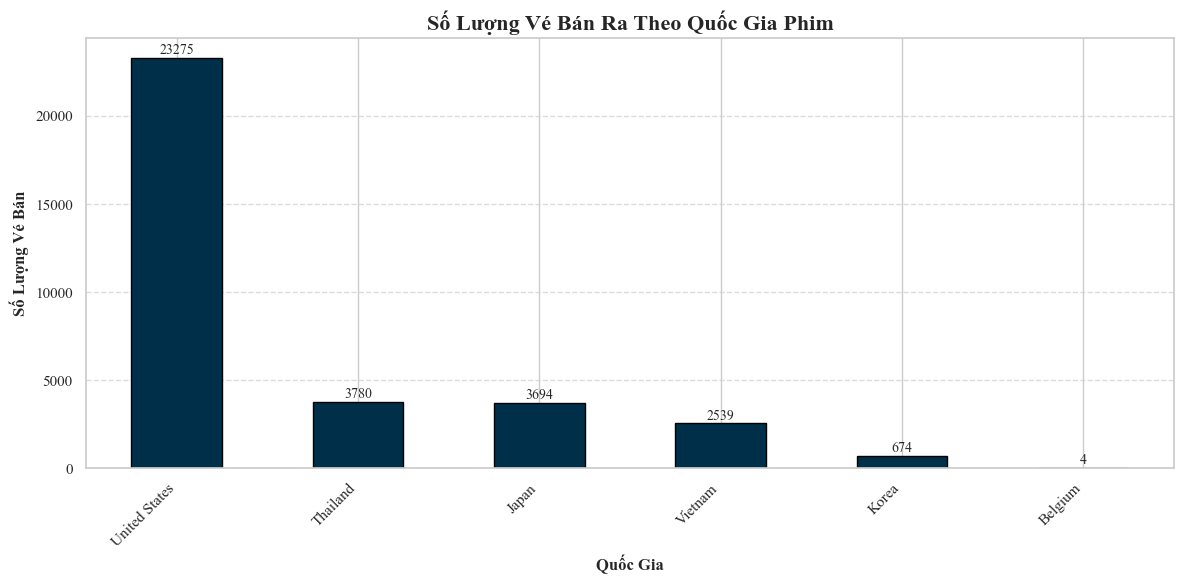

In [214]:
df_final['country'] = df_final['country'].dropna().apply(lambda x: str(x).split(',') if isinstance(x, str) else [])

# Tách thông tin quốc gia từ cột 'country'
# Giả sử cột 'country' chứa thông tin quốc gia và các giá trị có thể là chuỗi các quốc gia phân tách bởi dấu phẩy
df_final['country'] = df_final['country'].apply(lambda x: [i.strip() for i in x] if isinstance(x, list) else [])

# Tạo một danh sách các quốc gia từ tất cả các dòng trong cột 'country'
all_countries = df_final['country'].explode().value_counts()

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
all_countries.plot(kind='bar', color='#003049', edgecolor='black')

# Tiêu đề và các thông số
plt.title('Số Lượng Vé Bán Ra Theo Quốc Gia Phim', fontsize=16, fontweight='bold')
plt.xlabel('Quốc Gia', fontsize=12, fontweight='bold')
plt.ylabel('Số Lượng Vé Bán', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Hiển thị số liệu trên cột
for index, value in enumerate(all_countries):
    plt.text(index, value + 50, str(value), ha='center', va='bottom', fontsize=10)

# Căn chỉnh và hiển thị
plt.tight_layout()
plt.show()

Phần lớn vé bán ra trong thời điểm này thuộc về các bộ phim đến từ Hoa Kỳ, với số lượng áp đảo lên đến 23.275 vé. Điều này cho thấy thị hiếu của khách hàng thời điểm đó nghiêng mạnh về điện ảnh Mỹ, vốn nổi bật với kỹ xảo hiện đại và các thương hiệu phim đình đám. Trong khi đó, phim đến từ các quốc gia như Thái Lan, Nhật Bản, Việt Nam hay Hàn Quốc vẫn chưa thực sự phổ biến và chưa tạo được sức hút đáng kể với khán giả trong giai đoạn này.

## __2. PHÂN TÍCH DOANH NGHIỆP__

_Vấn đề đặt ra_
- Phân tích doanh thu theo thời gian (ngày, giờ, ngày trong tuần)
- Phân tích doanh thu thực tế và doanh thu dự kiến
- Phân tích doanh thu theo quận/ huyện, khách hàng nam hay nữ
- Doanh thu theo nghề nghiệp, ngành, theo nhóm khách hàng
- Phân tích doanh thu theo từng thể loại phim, quốc gia phim
- Phân tích doanh thu từ các dịch vụ phụ

Trước khi tiến hành vào phân tích doanh thu, trong tháng 5 này, rạp chiếu phim ghi nhận 

In [215]:
# Tạo bảng để bỏ duplicated customerid
# Bước 1: Loại bỏ trùng theo orderid trước
df_unique = df_final.drop_duplicates(subset='orderid').reset_index(drop=True)
print(df_unique)

                orderid cashier   saledate   total       customerid  \
0      10006052019B0225  emp002 2019-05-06   90000       0000000014   
1      10022052019B0167  emp011 2019-05-22   90000       0000000034   
2      10130052019B0141  emp005 2019-05-30   90000       0000000034   
3      10105052019B0147  emp011 2019-05-05   90000       0000000081   
4      10105052019B0145  emp011 2019-05-05   90000       0000000081   
...                 ...     ...        ...     ...              ...   
13963   9925052019B0016  emp015 2019-05-25  135000        KH9958204   
13964  10009052019B0331  emp008 2019-05-09   90000  WEBS00000043900   
13965  10009052019B0332  emp008 2019-05-09   90000  WEBS00000043900   
13966  10130052019B0192  emp005 2019-05-30  180000  WEBS00000044909   
13967  12508052019B0036  emp007 2019-05-08   90000  WEBS00000046015   

       ticketcode        date                time slot  room  ... rating  \
0        20074925  2019-05-06 1900-01-01 18:15:00  G04     3  ...  PG-1

### 2.1 Doanh thu theo thời gian

#### 2.1.1 Theo giờ

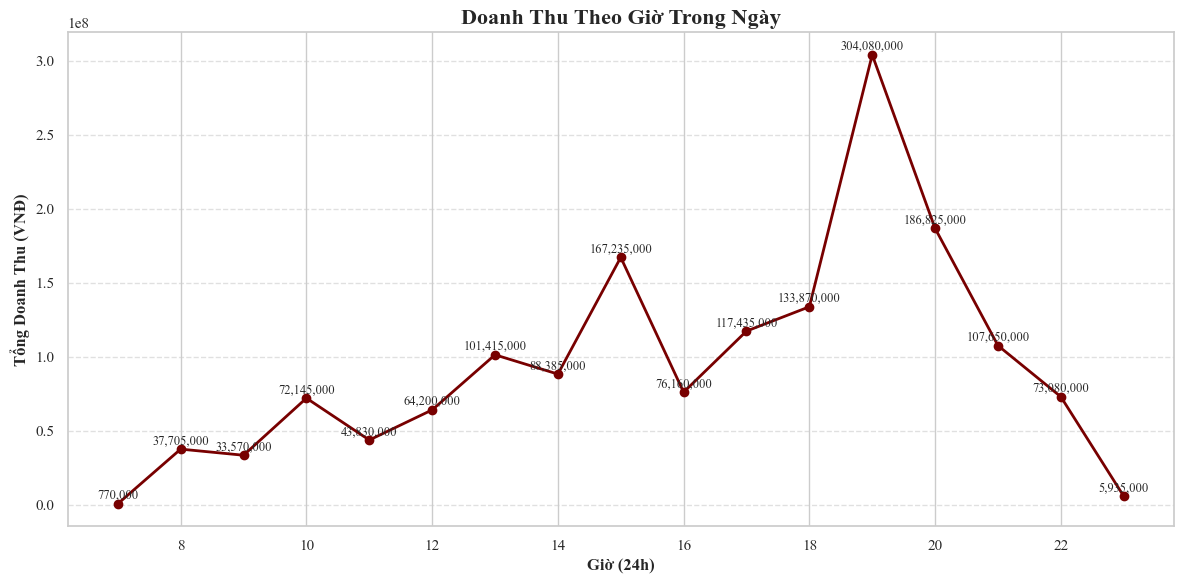

In [216]:
# Lấy giờ và tính doanh thu theo giờ
df_unique['time'] = pd.to_datetime(df_unique['time'], errors='coerce')
df_unique['hour'] = df_unique['time'].dt.hour

# Tính doanh thu theo giờ
revenue_by_hour = df_unique.groupby('hour')['total'].sum()

# Vẽ biểu đồ đường
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(revenue_by_hour.index, revenue_by_hour.values, marker='o', color='#780000', linewidth=2, markersize=6)

# Tiêu đề và nhãn
plt.title('Doanh Thu Theo Giờ Trong Ngày', fontsize=16, fontweight='bold')
plt.xlabel('Giờ (24h)', fontsize=12, fontweight='bold')
plt.ylabel('Tổng Doanh Thu (VNĐ)', fontsize=12, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Gắn nhãn trên từng điểm
for i, v in enumerate(revenue_by_hour):
    plt.text(revenue_by_hour.index[i], v + revenue_by_hour.max()*0.01, f"{int(v):,}", ha='center', fontsize=9)

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


Doanh thu bắt đầu tăng từ khung giờ 12h, tăng mạnh nhất từ 17h và đạt đỉnh vào khoảng 19h–20h. Khung giờ vàng từ 18h đến 21h ghi nhận mức doanh thu cao và ổn định. Sau khoảng thời gian này, doanh thu giảm nhanh và chạm mức thấp nhất vào buổi sáng sớm hôm sau.

Khung giờ buổi tối được xác định là thời điểm quan trọng nhất, đóng vai trò chủ lực trong tổng doanh thu hàng ngày. Xu hướng này phản ánh thói quen tiêu dùng giải trí sau giờ làm việc hoặc học tập của phần lớn khách hàng.

#### 2.1.2 Theo ngày trong tuần

In [217]:
# Tính doanh thu theo thời điểm trong ngày
# Tính doanh thu theo thời điểm trong ngày
revenue_by_time = df_unique.groupby('Time of day')['total'].sum().reindex(['Sáng', 'Chiều', 'Tối', 'Đêm'])
print(revenue_by_time)

Time of day
Sáng     188020000
Chiều    497395000
Tối      742210000
Đêm      186665000
Name: total, dtype: int64


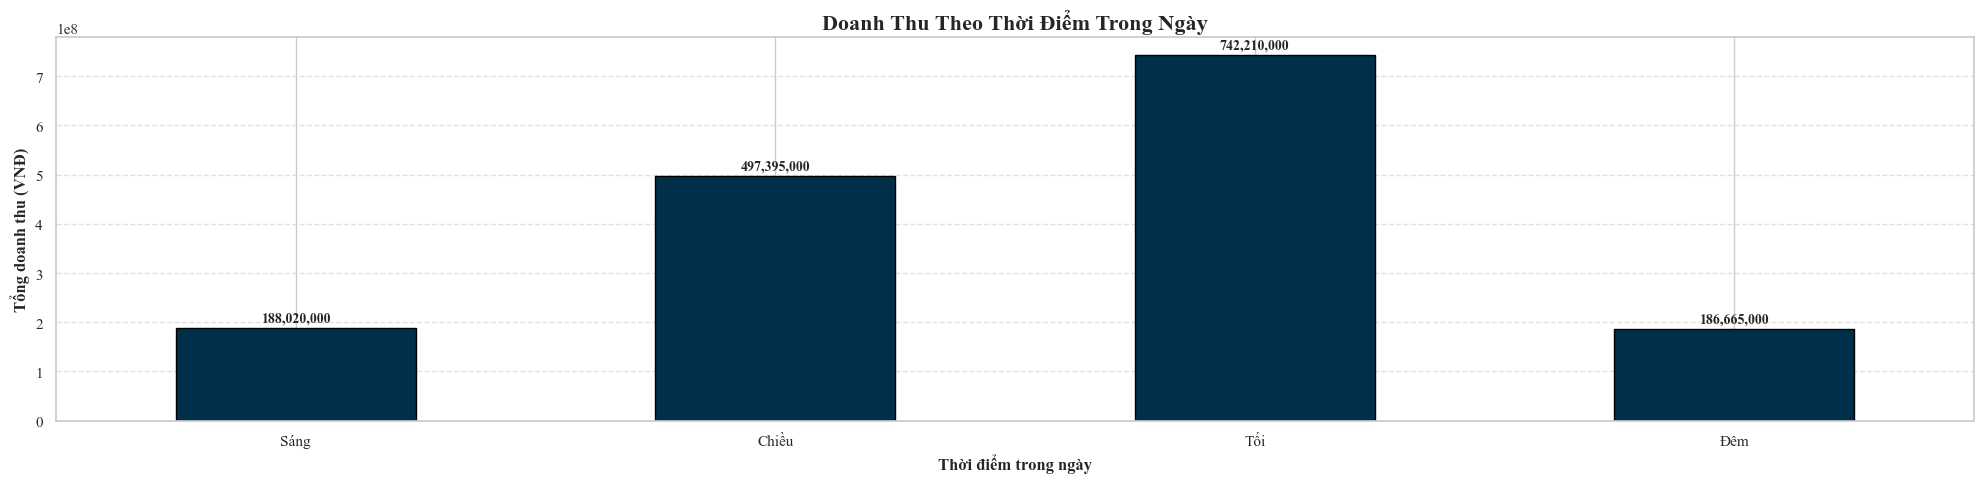

In [218]:
# Vẽ biểu đồ cột
plt.figure(figsize=(20, 5))
revenue_by_time.plot(kind='bar', color='#003049', edgecolor='black')

# Tùy chỉnh biểu đồ
plt.title('Doanh Thu Theo Thời Điểm Trong Ngày', fontsize=16, fontweight='bold')
plt.xlabel('Thời điểm trong ngày', fontsize=12, fontweight='bold')
plt.ylabel('Tổng doanh thu (VNĐ)', fontsize=12, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(rotation=0)

# Thêm nhãn số trên đầu cột
for i, v in enumerate(revenue_by_time):
    plt.text(i, v + revenue_by_time.max()*0.01, f"{int(v):,}", ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

Buổi tối (18h-21h) là khung giờ có doanh thu cao nhất. Đây là khung giờ vàng của rạp chiếu phim, thu hút đông khán giả nhất. Doanh thu tăng mạnh từ 17h, đạt đỉnh trong khoảng 18h-21h, sau đó giảm dần 

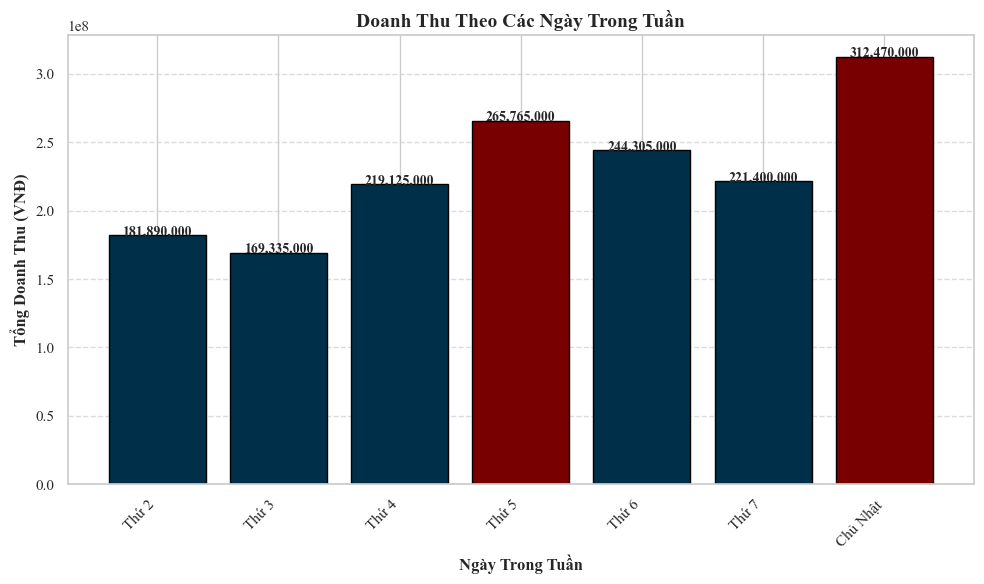

In [219]:
import matplotlib.pyplot as plt

# Ánh xạ từ tiếng Anh sang tiếng Việt
weekday_mapping = {
    'Monday': 'Thứ 2',
    'Tuesday': 'Thứ 3',
    'Wednesday': 'Thứ 4',
    'Thursday': 'Thứ 5',
    'Friday': 'Thứ 6',
    'Saturday': 'Thứ 7',
    'Sunday': 'Chủ Nhật'
}

# Ánh xạ lại các giá trị trong cột Weekday
df_unique['Weekday'] = df_unique['Weekday'].map(weekday_mapping)

# Tạo danh sách các ngày trong tuần theo thứ tự
weekdays_order = ['Thứ 2', 'Thứ 3', 'Thứ 4', 'Thứ 5', 'Thứ 6', 'Thứ 7', 'Chủ Nhật']

# Tính tổng doanh thu theo ngày trong tuần
revenue_by_day = df_unique.groupby('Weekday')['total'].sum()

# Sắp xếp lại theo thứ tự các ngày trong tuần và thay NaN bằng 0 nếu thiếu ngày
revenue_by_day = revenue_by_day.reindex(weekdays_order).fillna(0)

# Tạo danh sách màu sắc: mặc định xanh đậm, riêng Thứ 5 và Chủ Nhật có màu nổi bật
colors = ['#003049' if day not in ['Thứ 5', 'Chủ Nhật'] else '#780000' for day in weekdays_order]

# Vẽ biểu đồ cột doanh thu theo ngày trong tuần
plt.figure(figsize=(10, 6))
plt.bar(revenue_by_day.index, revenue_by_day, color=colors, edgecolor='black')

# Tiêu đề và thông số
plt.title('Doanh Thu Theo Các Ngày Trong Tuần', fontsize=14, fontweight='bold')
plt.xlabel('Ngày Trong Tuần', fontsize=12, fontweight='bold')
plt.ylabel('Tổng Doanh Thu (VNĐ)', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Hiển thị giá trị doanh thu trên từng cột
for i, v in enumerate(revenue_by_day):
    plt.text(i, v + 5000, f'{v:,.0f}', ha='center', fontsize=10, fontweight='bold')

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()


Dựa trên biểu đồ, có thể thấy rằng Chủ Nhật là ngày có doanh thu cao nhất, đạt 312.470.000 VND, cho thấy đây là thời điểm lý tưởng để người dân đến rạp xem phim, đặc biệt là các gia đình hoặc nhóm bạn bè có thời gian rảnh sau một tuần làm việc nhằm giải tỏa căng thẳng, mệt mỏi. Tiếp theo là Thứ Năm (265.765.000 VND) và Thứ Sáu (244.305.000 VND), phản ánh xu hướng tăng nhu cầu giải trí vào cuối tuần và những ngày cận cuối tuần.

Trong khi đó, các ngày đầu tuần như Thứ Hai (181.890.000 VND), Thứ Ba (169.335.000 VND) có doanh thu thấp nhất, cho thấy lượng khán giả đến rạp khá ít trong những ngày làm việc đầu tuần. Thứ Tư (219.125.000 VND) và Thứ Bảy (221.400.000 VND) có doanh thu trung bình, thể hiện mức độ ổn định hơn về lượng người xem.

Tổng thể, biểu đồ cho thấy xu hướng doanh thu tăng dần từ giữa tuần và đạt đỉnh vào cuối tuần, đặc biệt là Chủ Nhật, là cơ sở quan trọng để các rạp chiếu phim tối ưu hóa lịch chiếu, khuyến mãi và chiến lược marketing vào những ngày cao điểm.

#### 2.1.3 Theo tháng

In [220]:
# Tính total theo ngày trong tháng 5
daily_revenue = df_unique.groupby(df_unique['saledate'].dt.day)['total'].sum().reset_index()
daily_revenue.columns = ['Ngày', 'Tổng Doanh Thu']
print(daily_revenue)

    Ngày  Tổng Doanh Thu
0      1        62615000
1      2        56250000
2      3         6255000
3      5        85040000
4      6        55215000
5      7        48195000
6      8        52020000
7      9        62410000
8     10        66105000
9     11        94590000
10    12        94320000
11    13        41895000
12    14        41940000
13    15        42615000
14    16        53010000
15    17        47250000
16    18        59040000
17    19        62685000
18    20        42390000
19    21        38160000
20    22        29880000
21    23        45180000
22    24        55125000
23    25        67770000
24    26        70425000
25    27        42390000
26    28        41040000
27    29        31995000
28    30        48915000
29    31        69570000


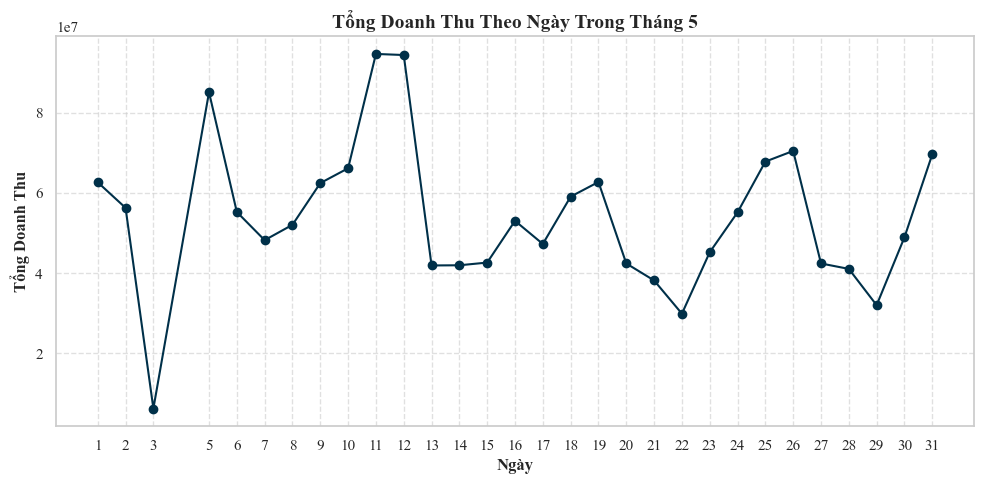

In [221]:
plt.figure(figsize=(10, 5))
plt.plot(daily_revenue['Ngày'], daily_revenue['Tổng Doanh Thu'], marker='o', color='#003049')
plt.title('Tổng Doanh Thu Theo Ngày Trong Tháng 5', fontsize=14, fontweight='bold')
plt.xlabel('Ngày', fontsize=12, fontweight='bold')
plt.ylabel('Tổng Doanh Thu', fontsize=12, fontweight='bold')
plt.xticks(daily_revenue['Ngày'])
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Doanh thu hàng ngày của rạp chiếu phim trong tháng 5 biến động mạnh, cho thấy sự phụ thuộc vào các yếu tố ngoại cảnh hoặc sự kiện cụ thể.
Sự xuất hiện của các ngày doanh thu cao điểm cho thấy tiềm năng đáng kể để tăng trưởng doanh thu, đặc biệt khi áp dụng các biện pháp khuyến khích mua hàng hiệu quả.

### 2.2 Doanh thu theo nhân khẩu học

#### 2.2.1 Vị trí địa lý: Các Huyện trong thành phố Đà Nẵng

In [222]:
total_province = df_unique.groupby("Quận/Huyện")['ticket price'].sum().sort_values(ascending=False)
print(total_province)

Quận/Huyện
Liên Chiểu      269685000
Sơn Trà         194235000
Hải Châu         78895000
Thanh Khê        59340000
Cẩm Lệ           33495000
Ngũ Hành Sơn     31910000
Hòa Vang         27735000
Name: ticket price, dtype: int64


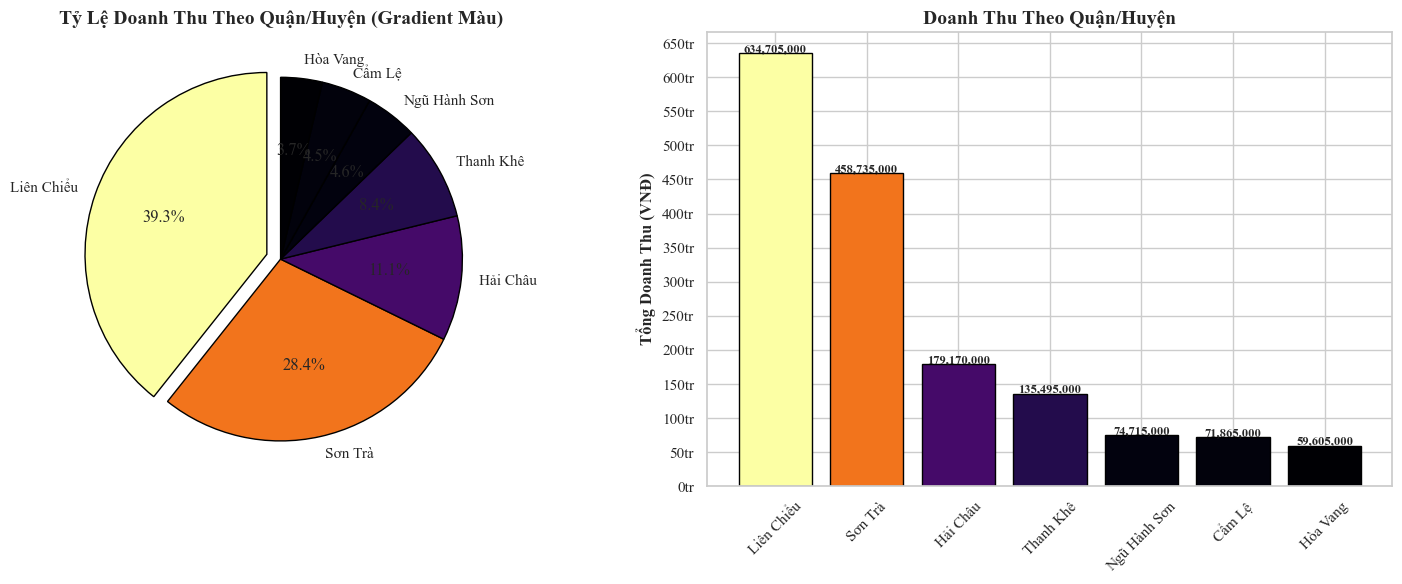

In [223]:
# Tính tổng doanh thu theo Quận/Huyện
revenue_by_district = df_unique.groupby('Quận/Huyện')['total'].sum().sort_values(ascending=False)

# Normalize giá trị → màu
norm = plt.Normalize(revenue_by_district.min(), revenue_by_district.max())
colors3 = cm.inferno(norm(revenue_by_district.values))  # Tông màu Inferno (ấm và mạnh mẽ)

# Tạo figure và hai trục (axes)
fig, ax = plt.subplots(figsize=(15, 6), ncols=2, nrows=1)

# Tạo giá trị explode (tách rời phần lớn nhất)
explode = [0.08 if v == max(revenue_by_district.values) else 0 for v in revenue_by_district.values]

# Biểu đồ tròn với gradient màu và quay 90 độ
ax[0].pie(
    revenue_by_district.values, 
    labels=revenue_by_district.index,
    autopct='%1.1f%%',
    startangle=90,  # Quay 90 độ
    explode=explode,
    colors=colors3,
    wedgeprops={'edgecolor': 'black'}
)
ax[0].set_title("Tỷ Lệ Doanh Thu Theo Quận/Huyện (Gradient Màu)", fontsize=14, fontweight='bold')

# Biểu đồ cột cùng màu
total_province_bar = ax[1].bar(
    revenue_by_district.index, 
    revenue_by_district.values, 
    color=colors3,
    edgecolor='black'
)
ax[1].set_title("Doanh Thu Theo Quận/Huyện", fontsize=14, fontweight='bold')
ax[1].set_ylabel("Tổng Doanh Thu (VNĐ)", fontsize=12, fontweight='bold')
ax[1].tick_params(axis='x', rotation=45)
ax[1].yaxis.set_major_locator(ticker.MultipleLocator(50_000_000))
ax[1].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{x/1e6:.0f}tr"))

# Hiển thị giá trị trên mỗi cột
for bar in total_province_bar:
    height = bar.get_height()
    ax[1].text(bar.get_x() + bar.get_width()/2, height + 1000000, f'{height:,.0f}', ha='center', fontsize=9, fontweight='bold')

# Căn chỉnh layout để tránh bị chồng lấn
plt.tight_layout()
plt.show()

Biểu đồ doanh thu theo quận/huyện cho thấy sự chênh lệch rõ rệt giữa các địa phương. Quận Liên Chiểu dẫn đầu với 39,3% tổng doanh thu (634,7 triệu VNĐ), tiếp theo là quận Sơn Trà với 28,4% (458,7 triệu VNĐ). Hai quận này chiếm gần 68% tổng doanh thu, phản ánh vai trò trung tâm kinh tế trọng điểm. Các quận còn lại đóng góp ít hơn, với Hải Châu (11,1% – 179,2 triệu VNĐ) và Thanh Khê (8,4% – 135,5 triệu VNĐ) có sự đóng góp đáng kể. Ba quận Ngũ Hành Sơn (4,6%), Cẩm Lệ (4,4%) và Hòa Vang (3,7%) có mức doanh thu thấp hơn nhiều.

Qua đó, xu hướng doanh thu tập trung vào một số quận trọng điểm, đồng thời chỉ ra sự phát triển kinh tế chưa đồng đều giữa các khu vực.

#### 2.2.2. Ngành và nghề nghiệp 

Theo nghề nghiệp

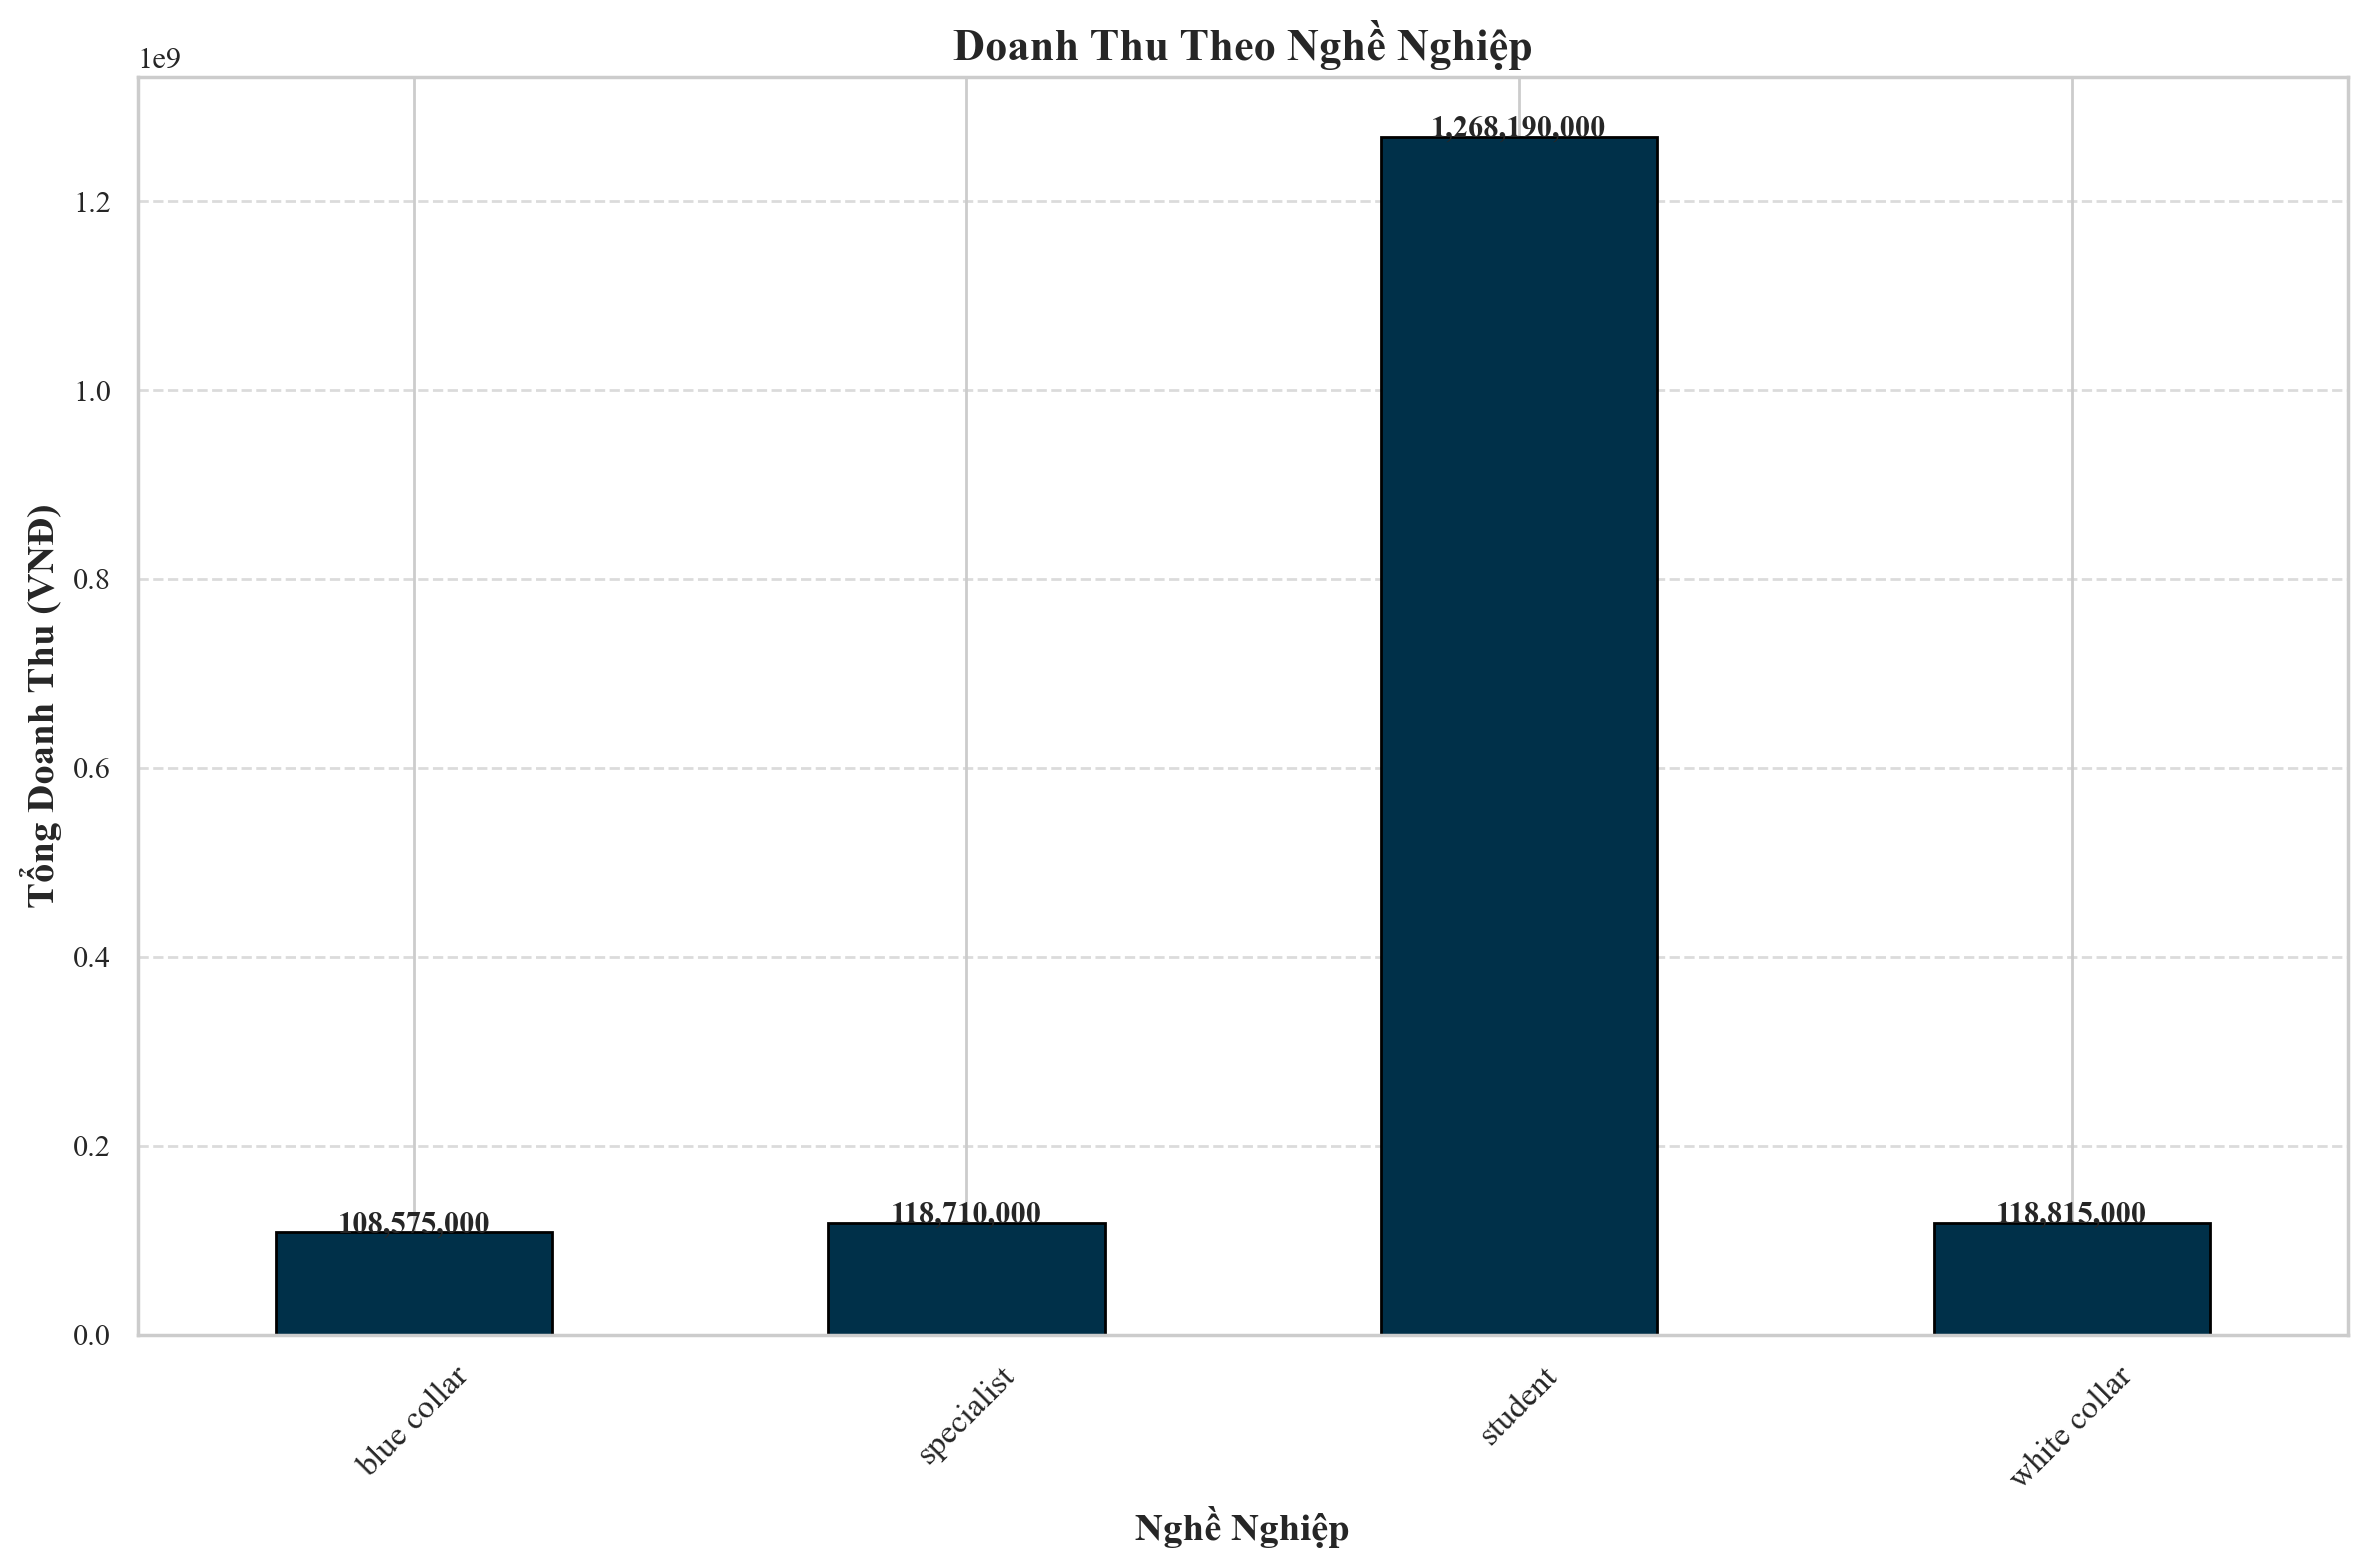

In [224]:
# Tính doanh thu theo Nghề nghiệp
revenue_by_job = df_unique.groupby('job')['total'].sum()

# Vẽ biểu đồ
plt.figure(figsize=(12, 8), dpi=200)
revenue_by_job.plot(kind='bar', color='#003049', edgecolor='black')
plt.title('Doanh Thu Theo Nghề Nghiệp', fontsize=16, fontweight='bold')
plt.xlabel('Nghề Nghiệp', fontsize=14, fontweight='bold')
plt.ylabel('Tổng Doanh Thu (VNĐ)', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Hiển thị giá trị trên cột
for i, v in enumerate(revenue_by_job):
    plt.text(i, v + 5000, f'{v:,.0f}', ha='center', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()


Theo ngành nghề 

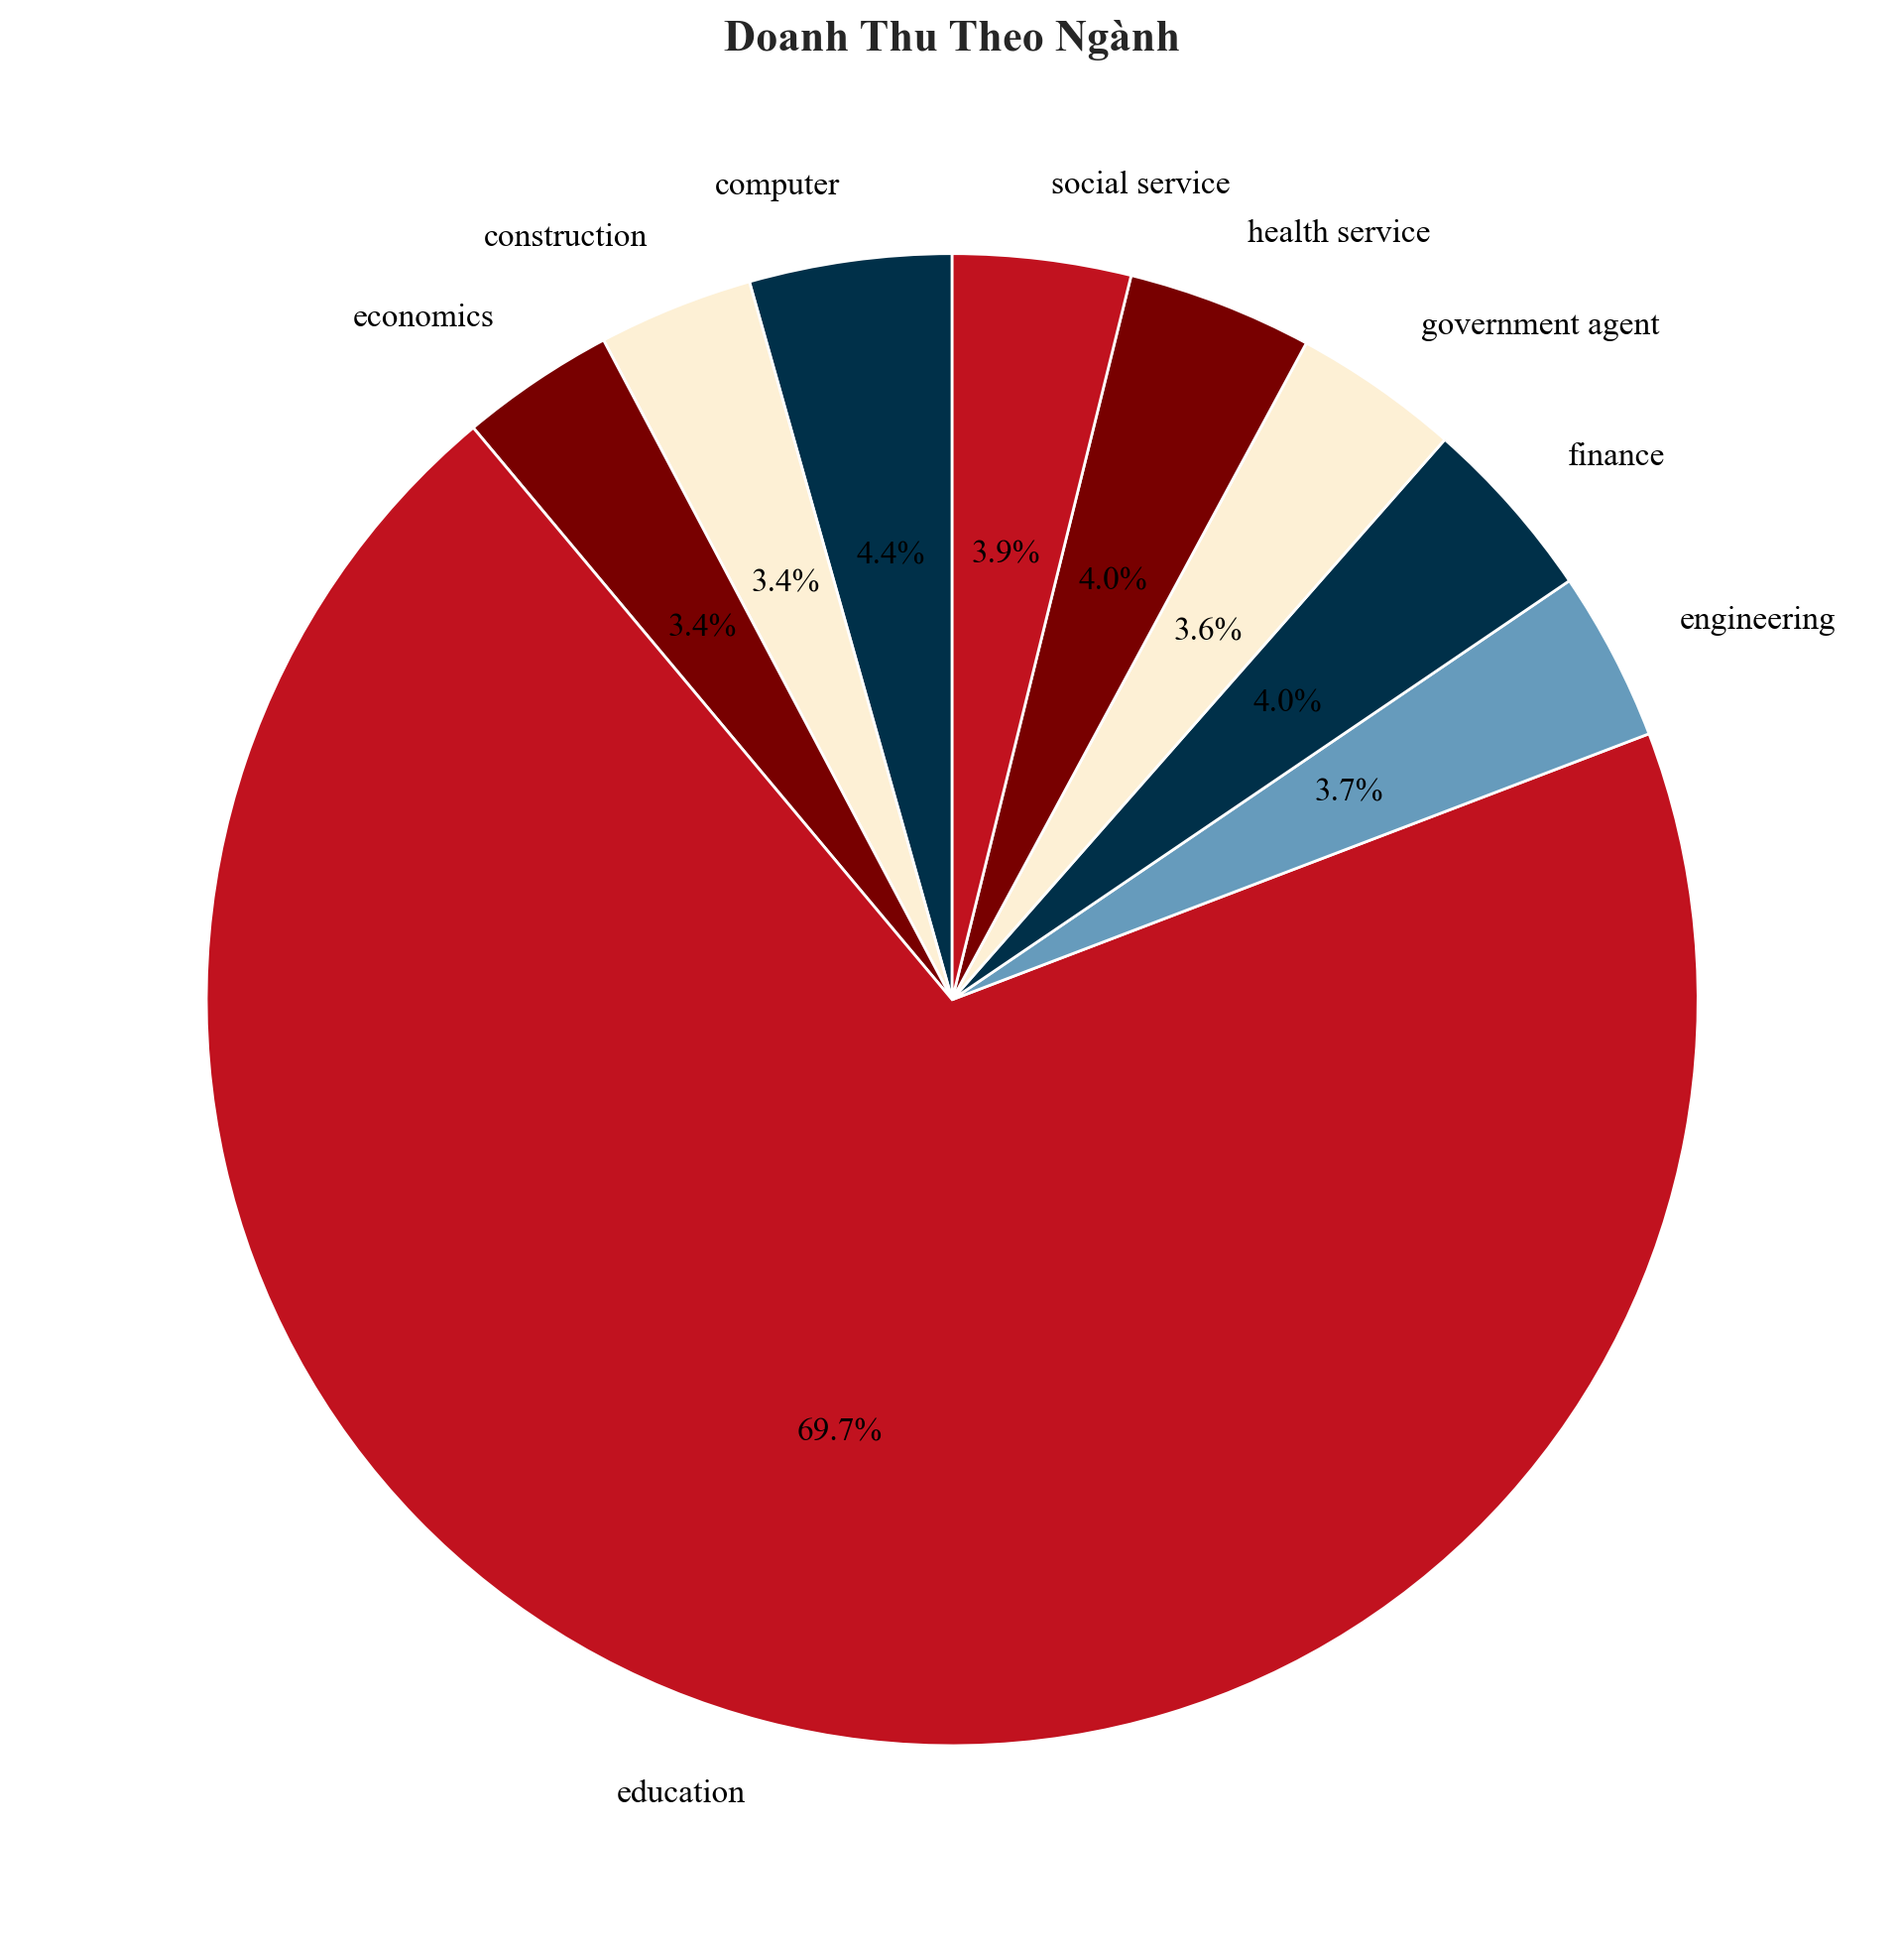

In [225]:
# Tính doanh thu theo Ngành
revenue_by_industry = df_unique.groupby('industry')['total'].sum()

# Vẽ biểu đồ
plt.figure(figsize=(10, 10), dpi=200)
plt.pie(
    revenue_by_industry,
    labels=revenue_by_industry.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#003049', '#FDF0D5', '#780000', '#C1121F', '#669BBC'],
    textprops={'color': 'black', 'fontsize': 12}
)
plt.title('Doanh Thu Theo Ngành', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


Biểu đồ doanh thu theo nghề nghiệp cho thấy sự chênh lệch rất lớn giữa các nhóm nghề. Đáng chú ý nhất là nhóm sinh viên với doanh thu vượt trội, đạt 1.268.190.000 VNĐ, chiếm gần như toàn bộ tổng doanh thu của tất cả các nhóm nghề cộng lại. Trong khi đó, các nhóm còn lại bao gồm lao động phổ thông (blue collar), nhân viên văn phòng (white collar) và chuyên gia (specialist) đều có doanh thu ở mức thấp, dao động từ khoảng 108 đến 118 triệu VNĐ. Sự vượt trội của nhóm sinh viên cho thấy đây là đối tượng khách hàng tiềm năng, có nhu cầu tiêu thụ dịch vụ lớn. Ngược lại, các nhóm nghề khác tuy ổn định về thu nhập nhưng có thể ít tham gia vào các hoạt động chi tiêu tại các rạp chiếu phim, hoặc mức độ tiếp cận với sản phẩm – dịch vụ của rạp chưa cao. 

Biểu đồ tròn ở giữa thể hiện doanh thu theo ngành nghề, trong đó ngành giáo dục (education) chiếm tỷ trọng áp đảo lên tới 69,7%, bỏ xa các ngành còn lại như kỹ thuật (engineering – 3,7%), tài chính (finance – 4,0%) hay dịch vụ xã hội (social service – 3,9%). Điều này cho thấy khách hàng thuộc lĩnh vực giáo dục đóng vai trò chủ lực trong cơ cấu doanh thu hiện tại.

#### 2.2.3 Nhóm tuổi khách hàng

C:\Users\Admin\AppData\Local\Temp\ipykernel_16820\3885600727.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  revenue_by_age_group = df_unique.groupby('Age Group')['total'].sum()


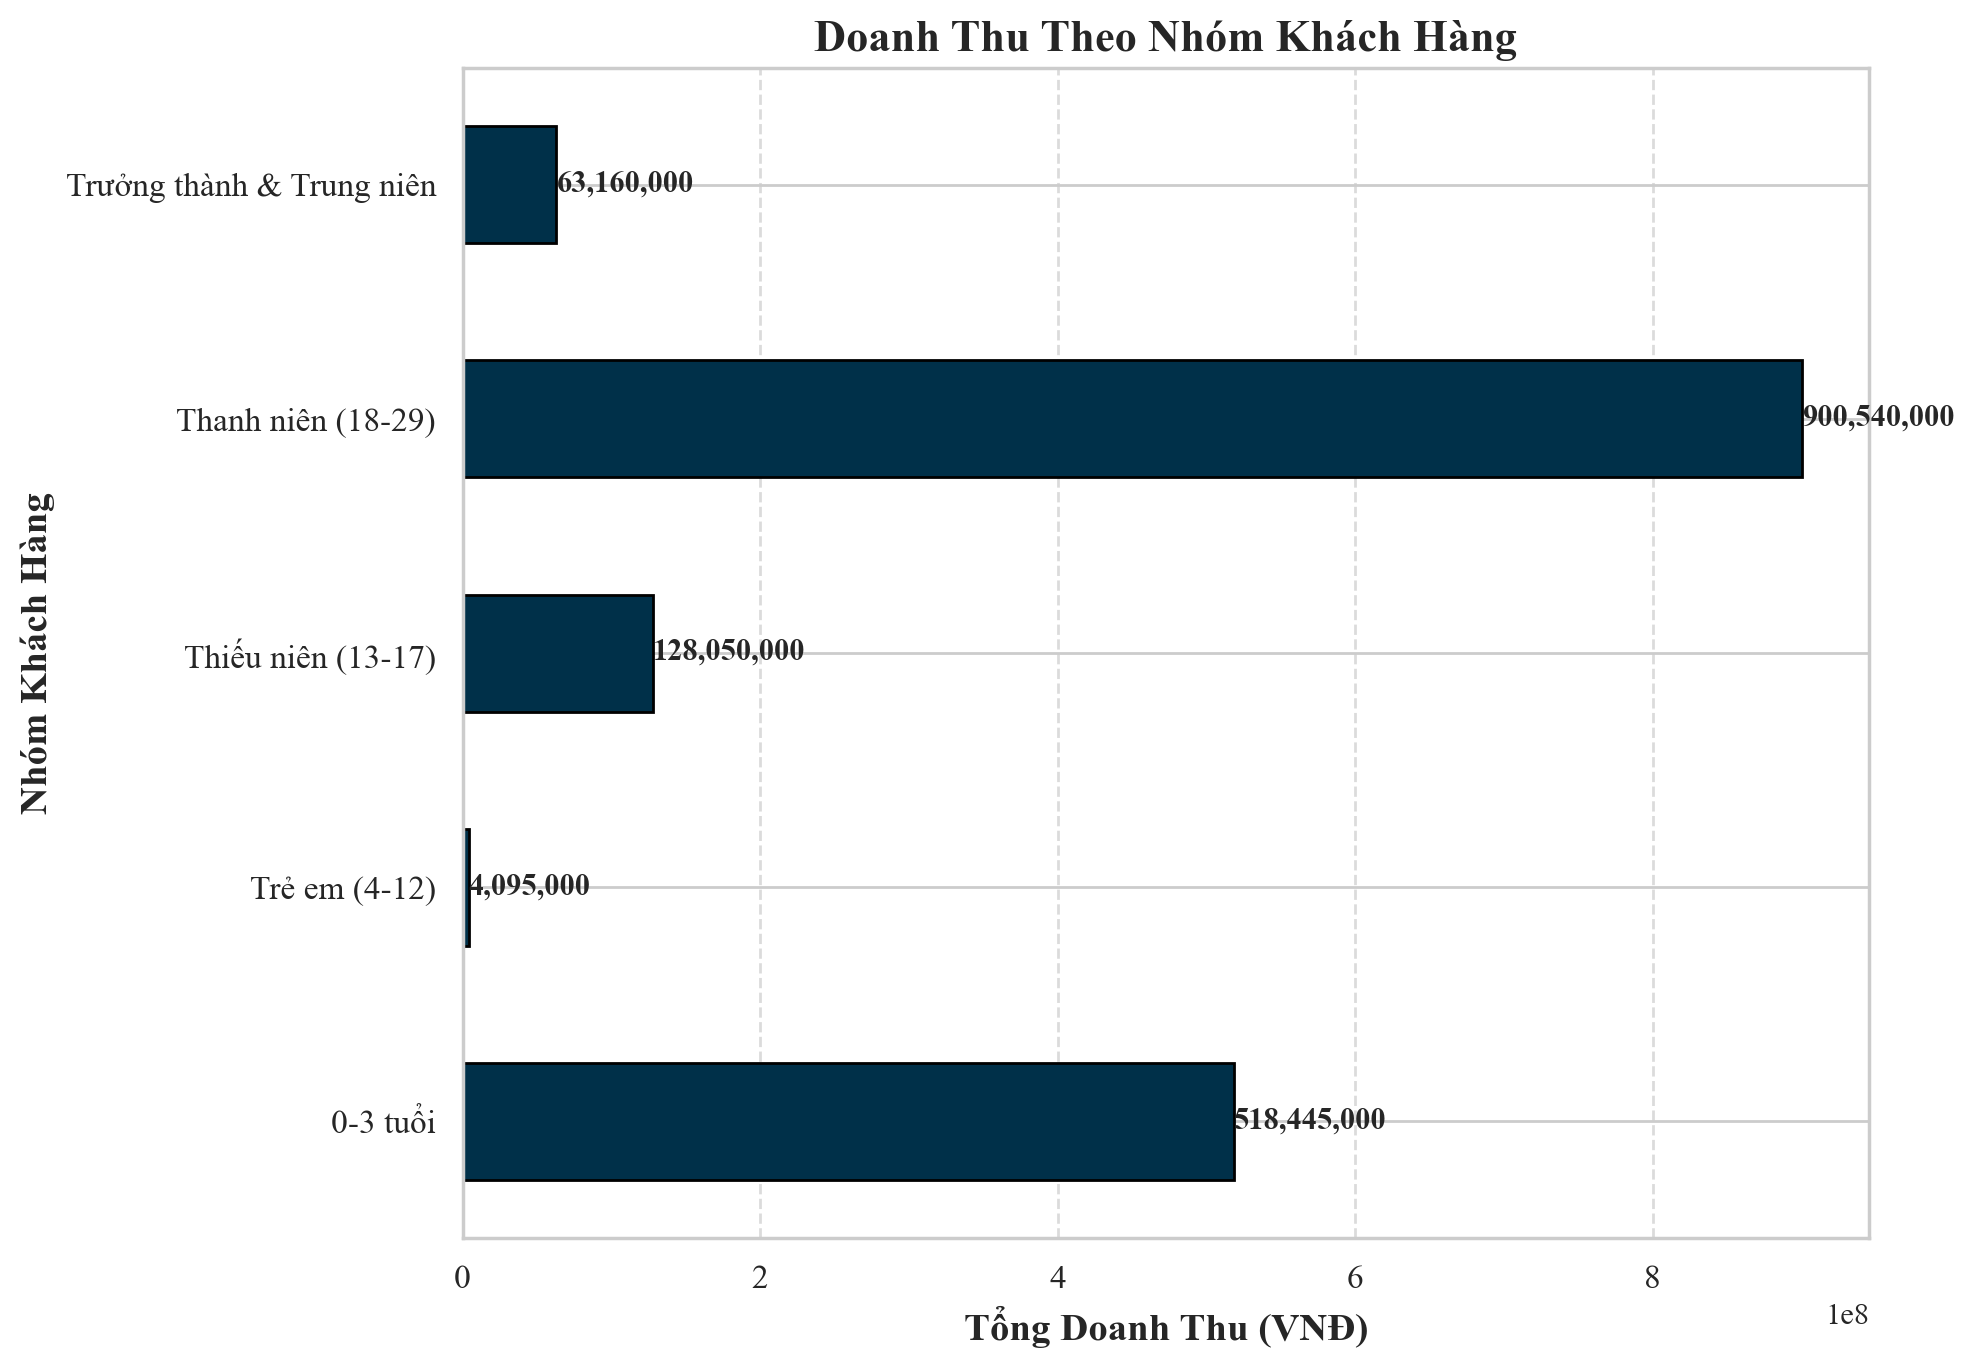

In [226]:
# Tính doanh thu theo Nhóm khách hàng
revenue_by_age_group = df_unique.groupby('Age Group')['total'].sum()

# Vẽ biểu đồ
plt.figure(figsize=(10, 7), dpi=200)
revenue_by_age_group.plot(kind='barh', color='#003049', edgecolor='black')

plt.title('Doanh Thu Theo Nhóm Khách Hàng', fontsize=16, fontweight='bold')
plt.xlabel('Tổng Doanh Thu (VNĐ)', fontsize=14, fontweight='bold')
plt.ylabel('Nhóm Khách Hàng', fontsize=14, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Hiển thị giá trị trên cột
for i, v in enumerate(revenue_by_age_group):
    plt.text(v + 5000, i, f'{v:,.0f}', va='center', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()


Cuối cùng, biểu đồ cột Doanh thu theo nhóm khách hàng chỉ ra rằng nhóm khách hàng thanh niên (18–29 tuổi) đóng góp nhiều nhất với 900.540.000 VNĐ, theo sau là nhóm 0-3 tuổi (518.445.000 VNĐ), trong khi người trưởng thành, trung niên và trẻ em chiếm tỷ trọng rất nhỏ. Vấn đề doanh thu theo nhóm từ 0-3 tuổi đã được giải thích phía trên. Đáng quan tâm nhất vẫn là đối tượng khách hàng tiềm năng từ 18-29 tuổi.

Từ ba biểu đồ trên có thể thấy rằng sinh viên, người trong ngành giáo dục và thanh niên là các đối tượng khách hàng chính tạo nên phần lớn doanh thu.

#### 2.2.4 Nhóm tuổi và Giới tính

C:\Users\Admin\AppData\Local\Temp\ipykernel_16820\1362796552.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  revenue_by_age_gender = df_unique.groupby(['Age Group', 'Gender'])['total'].sum().unstack()


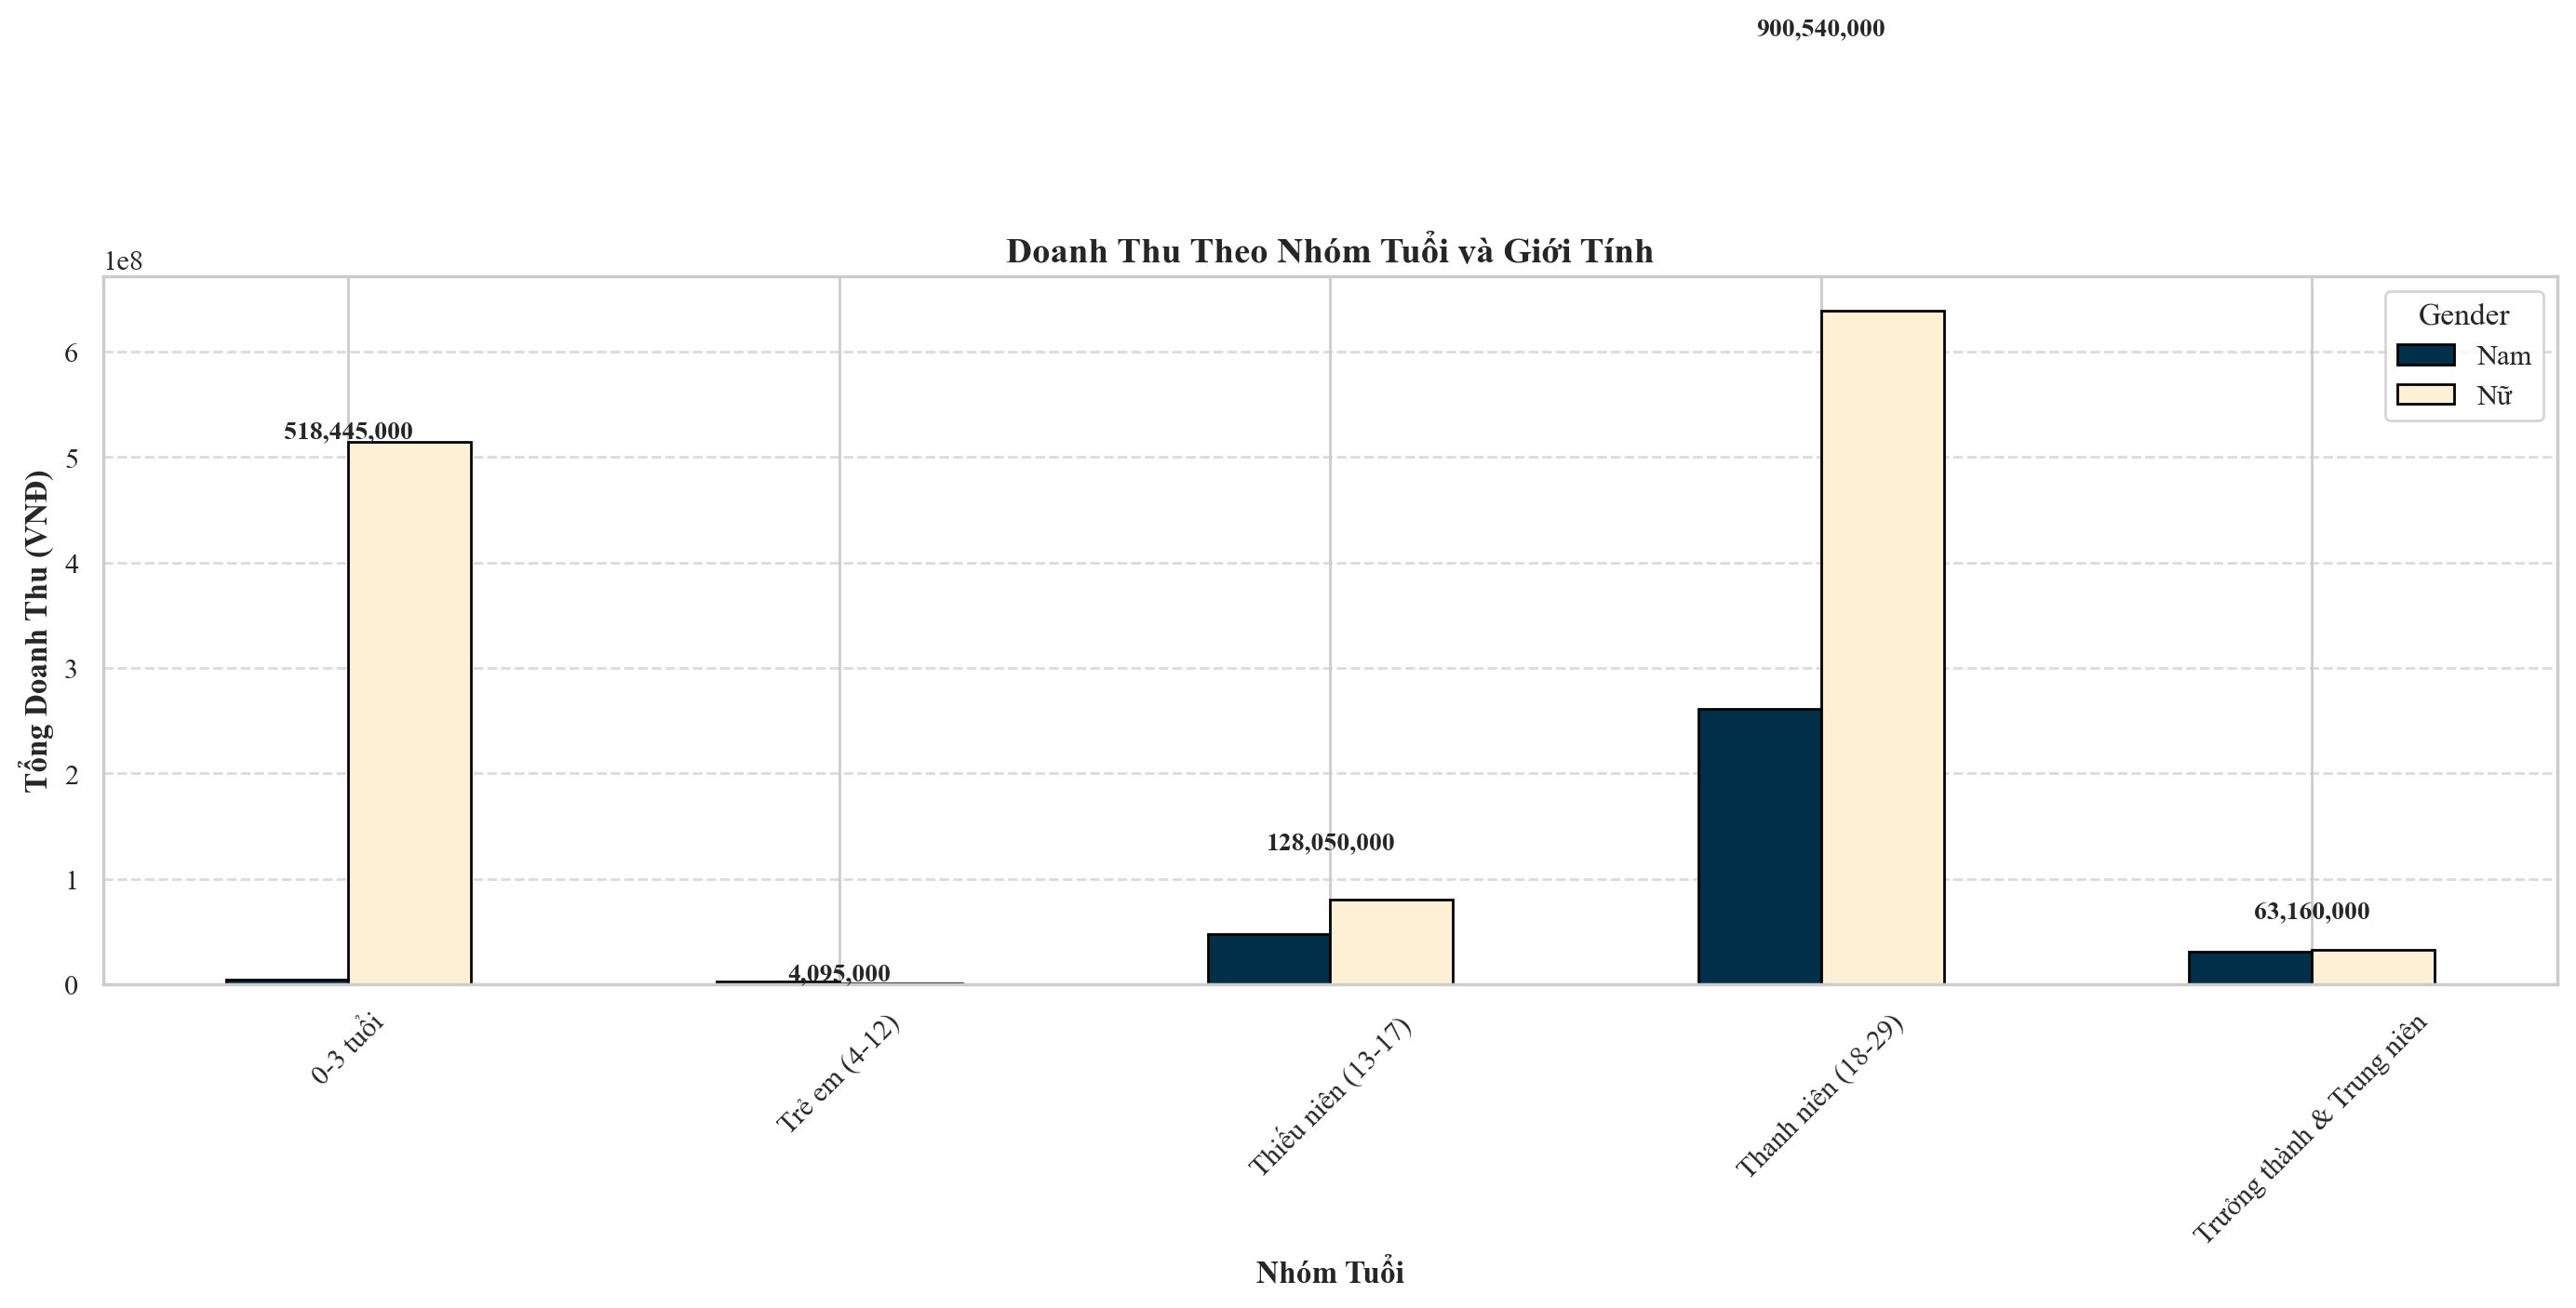

In [227]:
# Tính doanh thu theo Nhóm Tuổi và Giới Tính
revenue_by_age_gender = df_unique.groupby(['Age Group', 'Gender'])['total'].sum().unstack()

# Vẽ biểu đồ
fig, ax = plt.subplots(figsize=(14, 8), dpi=200)

# Vẽ biểu đồ cột cho doanh thu của Nam và Nữ trong từng nhóm tuổi
revenue_by_age_gender.plot(kind='bar', ax=ax, color=['#003049', '#FDF0D5'], edgecolor='black')

# Tiêu đề và thông số
ax.set_title('Doanh Thu Theo Nhóm Tuổi và Giới Tính', fontsize=14, fontweight='bold')
ax.set_xlabel('Nhóm Tuổi', fontsize=12, fontweight='bold')
ax.set_ylabel('Tổng Doanh Thu (VNĐ)', fontsize=12, fontweight='bold')
ax.tick_params(axis='x', rotation=45)
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Hiển thị giá trị doanh thu lên từng cột
for i, v in enumerate(revenue_by_age_gender.sum(axis=1)):
    ax.text(i, v + 5000, f'{v:,.0f}', ha='center', fontsize=10, fontweight='bold')

# Tạo layout đẹp
plt.tight_layout()
plt.show()

Biểu đồ cho thấy nhóm khán giả nữ trong độ tuổi thanh niên (18–29 tuổi) đóng góp doanh thu lớn nhất với 900.540.000 VND, vượt trội so với tất cả các nhóm còn lại. Đây là nhóm khách hàng mục tiêu rất tiềm năng mà các rạp chiếu phim nên đặc biệt chú trọng trong các chiến lược marketing và lựa chọn phim phù hợp.

Tiếp theo là nhóm từ 0–3 tuổi, với doanh thu 518.445.000 VND, hầu hết là nhóm khách hàng mua theo doanh nghiệp với số lượng lớn.

Ở nhóm thiếu niên (13–17 tuổi), cả nam và nữ đều có mức đóng góp tương đối thấp, và nam cũng chỉ nhỉnh hơn một chút, chiếm 128.050.000 VND. Điều này cho thấy nhóm tuổi này có mức tiêu dùng giải trí tại rạp còn hạn chế.

Với nhóm trẻ em (4–12 tuổi), cả nam và nữ đều có doanh thu rất thấp, gần như không đáng kể, cho thấy nhu cầu đi rạp ở độ tuổi này khá hạn chế hoặc thường đi kèm với người lớn chứ không mua vé riêng.

Cuối cùng, nhóm trưởng thành & trung niên đóng góp doanh thu khá khiêm tốn, dưới 70 triệu VND cho cả hai giới. Điều này phản ánh xu hướng chung là rạp chiếu phim chủ yếu thu hút giới trẻ, đặc biệt là nữ thanh niên, trong khi các nhóm tuổi lớn tuổi hơn ít đi xem phim hơn.

### 2.3 Doanh Thu Dựa Trên 3P: Giá, Kênh Bán và Sản Phẩm

#### 2.3.1 Price - Giá

In [228]:
total_slot_type = df_unique.groupby('slot type')['total'].sum()

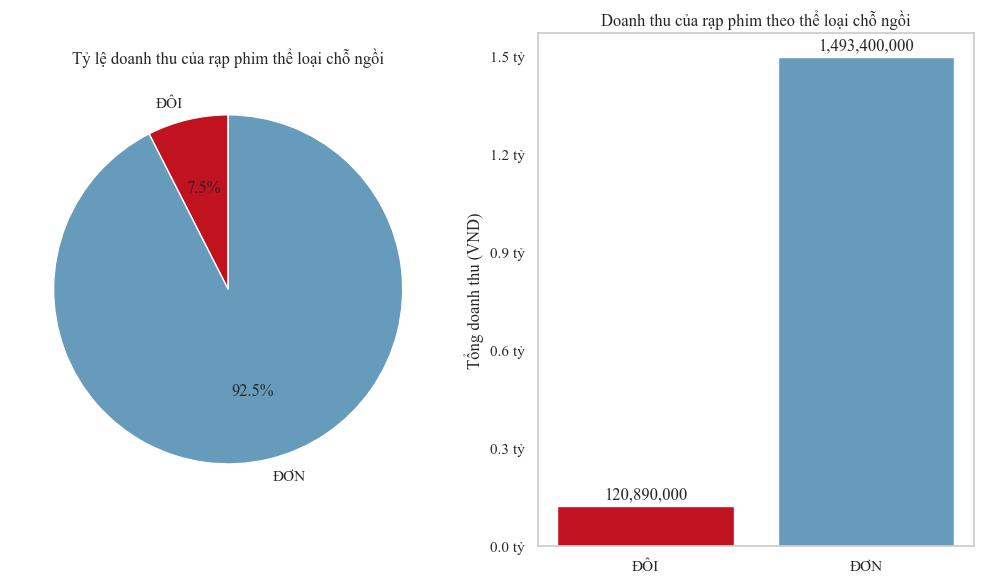

In [229]:
colors = ['#C1121F', '#669BBC']

fig, ax = plt.subplots(figsize=(10, 6), ncols=2)

# Pie chart với custom màu
ax[0].pie(
    total_slot_type.values,
    labels=total_slot_type.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors
)
ax[0].set_title("Tỷ lệ doanh thu của rạp phim thể loại chỗ ngồi")

# Bar chart với cùng màu
total_slot_type_bar = ax[1].bar(
    total_slot_type.index,
    total_slot_type.values,
    color=colors
)
ax[1].set_title("Doanh thu của rạp phim theo thể loại chỗ ngồi")
ax[1].set_ylabel("Tổng doanh thu (VND)")

# Thiết lập định dạng trục y
ax[1].yaxis.set_major_locator(ticker.MultipleLocator(300_000_000))
ax[1].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{x/1e9:.1f} tỷ"))

# Hiển thị số tiền trên cột
ax[1].bar_label(
    total_slot_type_bar,
    labels=[f"{v:,}" for v in total_slot_type.values],
    padding=3
)

# Loại bỏ grid
ax[1].grid(False)

plt.tight_layout()
plt.show()

Nhìn chung, ta có thể thấy rằng doanh thu từ chỗ ngồi đơn chiếm tỷ trọng áp đảo với 92.5% tổng doanh thu, trong khi chỗ ngồi đôi chỉ chiếm 7.5%. Về giá trị tuyệt đối, ghế đơn mang lại doanh thu 1,493,400,000 VND, cao gấp hơn 12 lần so với doanh thu từ ghế đôi là 120,890,000 VND. 

Điều này cho thấy phần lớn khách hàng lựa chọn ghế đơn khi đến rạp phim, có thể do thói quen đi xem phim một mình, đi theo nhóm bạn hoặc vì số lượng ghế đơn trong rạp nhiều hơn ghế đôi. Doanh thu từ ghế đôi còn khá khiêm tốn, có thể xuất phát từ việc chưa được khai thác tối ưu về mặt tiếp thị hoặc bố trí chỗ ngồi.

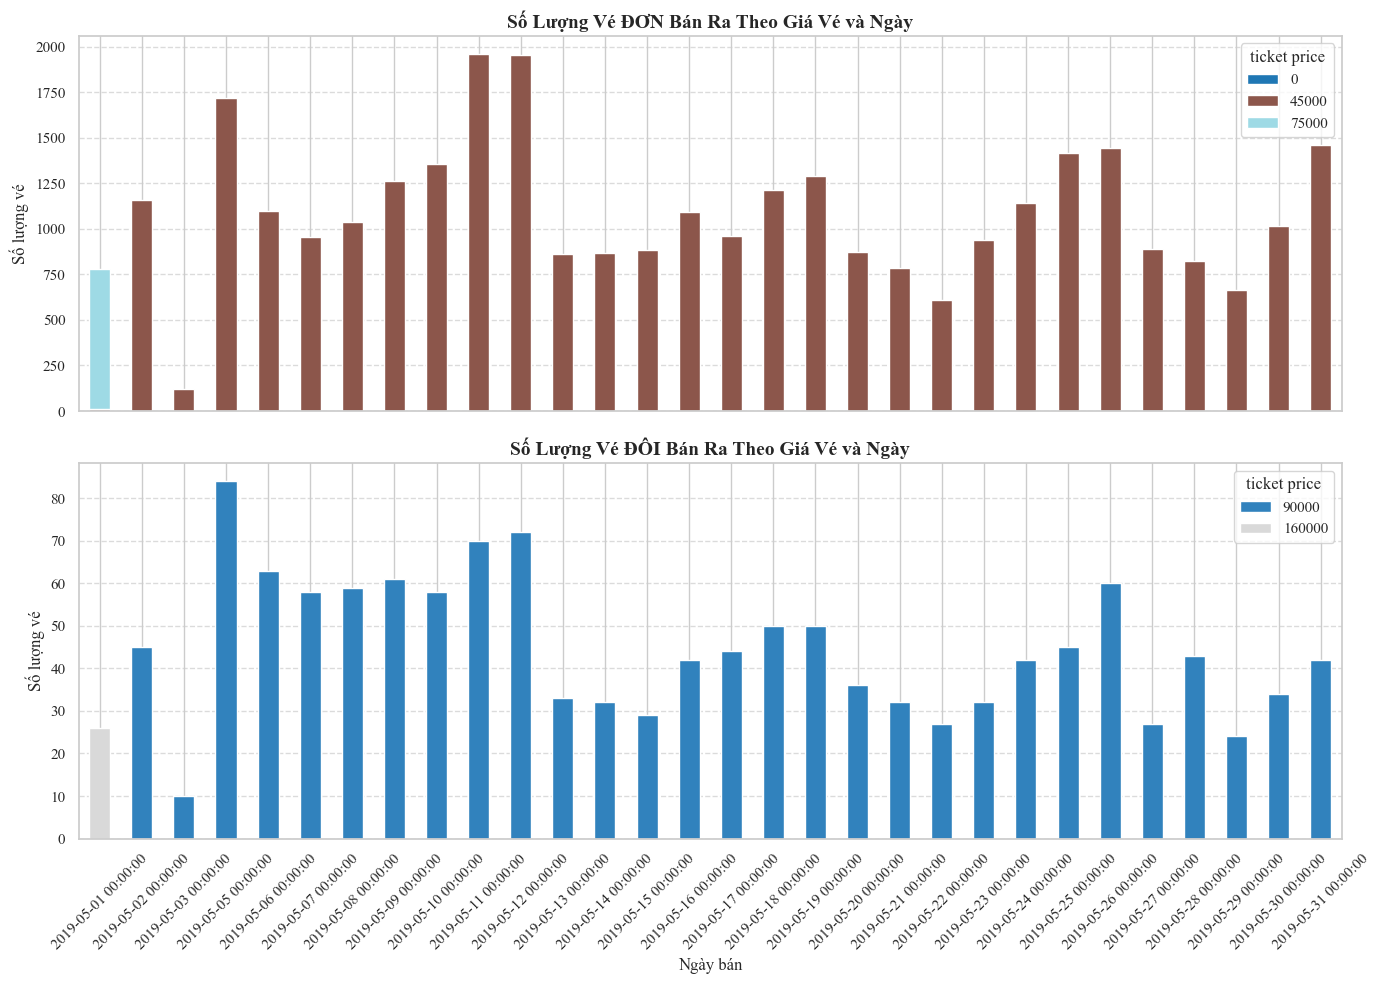

In [230]:
# Đảm bảo saledate là datetime
df_final['saledate'] = pd.to_datetime(df_final['saledate'], errors='coerce')

# Tách vé ĐƠN và vé ĐÔI
df_don = df_final[df_final['slot type'] == 'ĐƠN']
df_doi = df_final[df_final['slot type'] == 'ĐÔI']

# Đếm số lượng vé theo ngày và giá vé
don_by_date_price = df_don.groupby(['saledate', 'ticket price']).size().unstack().fillna(0)
doi_by_date_price = df_doi.groupby(['saledate', 'ticket price']).size().unstack().fillna(0)

# Sắp xếp theo ngày
don_by_date_price = don_by_date_price.sort_index()
doi_by_date_price = doi_by_date_price.sort_index()

# Vẽ biểu đồ
fig, axes = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# Biểu đồ cho vé ĐƠN
don_by_date_price.plot(kind='bar', stacked=True, ax=axes[0], colormap='tab20')
axes[0].set_title('Số Lượng Vé ĐƠN Bán Ra Theo Giá Vé và Ngày', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Số lượng vé')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Biểu đồ cho vé ĐÔI
doi_by_date_price.plot(kind='bar', stacked=True, ax=axes[1], colormap='tab20c')
axes[1].set_title('Số Lượng Vé ĐÔI Bán Ra Theo Giá Vé và Ngày', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Ngày bán')
axes[1].set_ylabel('Số lượng vé')
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Tùy chỉnh hiển thị trục x
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Biểu đồ cho thấy vé đơn (giá thấp 45,000–75,000 VNĐ) chiếm phần lớn số lượng bán ra, với doanh số đều đặn và cao xuyên suốt tháng. Ngược lại, vé đôi (giá từ 90,000–160,000 VNĐ) có số lượng bán thấp hơn đáng kể và có xu hướng biến động theo từng ngày. Điều này phản ánh nhu cầu thị trường nghiêng mạnh về vé đơn, đồng thời cũng cho thấy chiến lược định giá vé đôi hiện chưa hấp dẫn hoặc chưa phù hợp với thói quen tiêu dùng của khách hàng.

Trừ ngày lễ, mức giá không thay đổi và được áp dụng như nhau với MỌI ĐỐI TƯỢNG và MỌI NGÀY (kể cả cuối tuần) là 45.000 cho vé đơn và 90.000 cho vé đôi. Giá vé đơn (45,000 VNĐ) THẤP HƠN so với giá trung bình của các rạp khác như CGV, BHD, LOTTE, ... Rạp phim chỉ tăng giá duy nhất vào ngày lễ (1/5) với mức giá 75,000 VNĐ cho vé đơn và 160,000 VNĐ cho vé đôi.

#### 2.3.2 Place - Kênh bán hàng

In [231]:
# Tạo cột mới 'channel' để phân biệt kênh bán vé
df_final['Channel'] = df_final['customerid'].apply(
    lambda x: 'Online' 
    if str(x).startswith('WEB') 
    else 'Offline')

In [232]:
# Đếm số lượng vé theo kênh bán
# Xóa trùng ticketcode nếu có (1 vé chỉ tính 1 lần)
df_unique_tickets = df_final.drop_duplicates(subset='ticketcode')

# Đếm số vé bán ra theo kênh
ticket_count_by_channel = df_unique_tickets['Channel'].value_counts()

# Tính tổng số vé
total_tickets = ticket_count_by_channel.sum()

# Tính tỷ lệ phần trăm
ticket_ratio = (ticket_count_by_channel / total_tickets * 100).round(2)

# Gộp kết quả thành bảng
summary_df = pd.DataFrame({
    'Số vé bán ra': ticket_count_by_channel,
    'Tỷ lệ (%)': ticket_ratio
})

print(summary_df)

         Số vé bán ra  Tỷ lệ (%)
Channel                         
Offline         33957      99.97
Online              9       0.03


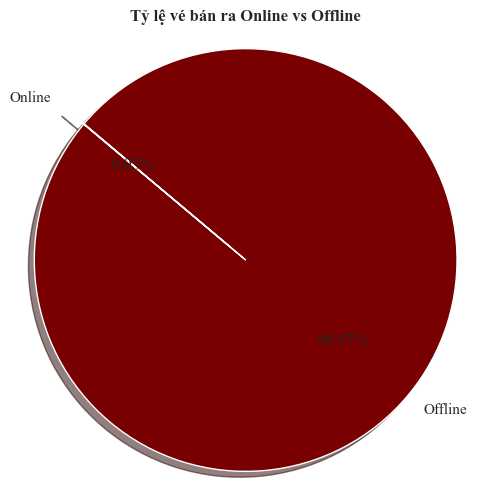

In [233]:
labels = summary_df.index
sizes = summary_df['Số vé bán ra']
colors = ['#780000', '#003049']
explode = [0, 0.1]  # Chỉ tách phần offline (tăng độ tách của phần offline)

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%0.2f%%', startangle=140,
        colors=colors, explode=explode, shadow=True)

plt.title('Tỷ lệ vé bán ra Online vs Offline', fontweight='bold')
plt.axis('equal')  # Hình tròn đều
plt.show()

Doanh thu và số lượng vé bán ra từ kênh website chỉ chiếm 0.3%, cho thấy doanh nghiệp chưa tối ưu được kênh bán hàng trực tuyến. Phần lớn doanh thu vẫn đến từ kênh bán vé offline, phản ánh rằng khách hàng vẫn chủ yếu mua vé trực tiếp tại rạp thay vì sử dụng các nền tảng trực tuyến Ecommerce.

In [234]:
# Lọc các đơn hàng online
df_online = df_final[df_final['Channel'] == 'Online']

# Loại bỏ các dòng trùng lặp orderid (để mỗi đơn chỉ tính 1 lần)
df_online_unique = df_online.drop_duplicates(subset='orderid')

# Đếm số lượng đơn hàng theo nhóm tuổi
online_by_age = df_online_unique['Age Group'].value_counts().reset_index()
online_by_age.columns = ['Nhóm tuổi', 'Số đơn hàng online']

# Sắp xếp theo thứ tự nhóm tuổi nếu cần (tuỳ theo cách đặt tên nhóm tuổi)
online_by_age = online_by_age.sort_values(by='Nhóm tuổi').reset_index(drop=True)

# In kết quả
print(online_by_age.to_string(index=False))

                Nhóm tuổi  Số đơn hàng online
                 0-3 tuổi                   0
            Trẻ em (4-12)                   0
       Thiếu niên (13-17)                   1
       Thanh niên (18-29)                   1
Trưởng thành & Trung niên                   2


#### 2.3.3 Product - Sản phẩm 

__Quy mô phòng và tỷ lệ lấp đầy chỗ trống__

In [235]:
# Tính số lượng phòng chiếu phim 
unique_room_count = df_final['room'].nunique()

# Tính số lượng ghế 
## Loại bỏ ghế trùng lặp 
filtered_df = df_final.drop_duplicates(subset=['room', 'slot'])
## Tạo cột số chỗ ngồi tương ứng với loại ghế
filtered_df['slot_count'] = filtered_df['slot type'].apply(lambda x: 1 if x == 'single' else 2)
## Tính tổng số chỗ ngồi
total_slots = filtered_df['slot_count'].sum()

# Tính số lượng phim chiếu trong tháng
unique_film_count = df_final['title'].nunique() # Để trả về số lượng chứ không phải tên phim 

# Tạo bảng kết quả
summary_table = pd.DataFrame({
    'Chỉ số': ['Số lượng phòng', 'Số lượng ghế', 'Số lượng phim chiếu trong tháng'],
    'Giá trị': [unique_room_count, total_slots, unique_film_count]
})

print(summary_table)

                            Chỉ số  Giá trị
0                   Số lượng phòng        4
1                     Số lượng ghế     1214
2  Số lượng phim chiếu trong tháng       18


C:\Users\Admin\AppData\Local\Temp\ipykernel_16820\1799439197.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['slot_count'] = filtered_df['slot type'].apply(lambda x: 1 if x == 'single' else 2)


In [236]:
total_seats_per_room = df_final.groupby('room')['slot'].nunique()
print(total_seats_per_room)
total_seats_per_room = pd.DataFrame(total_seats_per_room)

# Tính tổng số vé đã bán theo ngày, từng phòng
seats_sold = df_final.groupby(['Time of day', 'room'])['slot'].count().reset_index(name='seats_sold')

# Gộp với tổng số ghế phòng
result = pd.merge(seats_sold, total_seats_per_room, on='room', how='left')

result['fill_rate'] = result['seats_sold'] / result['slot']
result = pd.DataFrame(result)

print(result)

room
1    145
2    128
3    155
4    179
Name: slot, dtype: int64
   Time of day  room  seats_sold  slot  fill_rate
0        Chiều     1        2164   145  14.924138
1        Chiều     2        2902   128  22.671875
2        Chiều     3        2257   155  14.561290
3        Chiều     4        3150   179  17.597765
4         Sáng     1         983   145   6.779310
5         Sáng     2         900   128   7.031250
6         Sáng     3        1013   155   6.535484
7         Sáng     4         994   179   5.553073
8          Tối     1        3905   145  26.931034
9          Tối     2        3886   128  30.359375
10         Tối     3        3743   155  24.148387
11         Tối     4        4166   179  23.273743
12         Đêm     1         713   145   4.917241
13         Đêm     2         806   128   6.296875
14         Đêm     3        1164   155   7.509677
15         Đêm     4        1220   179   6.815642


C:\Users\Admin\AppData\Local\Temp\ipykernel_16820\3450904012.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis', len(result['Time of day'].unique()))


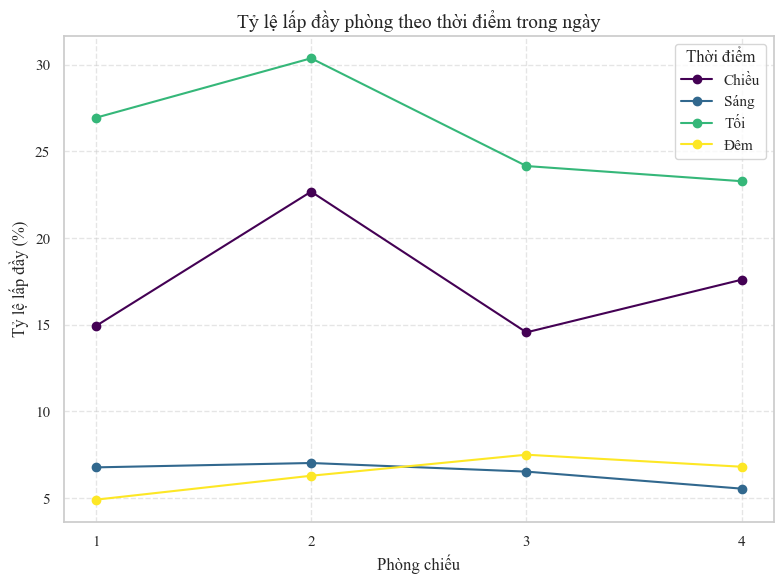

In [237]:
# Tạo colormap theo số line
cmap = cm.get_cmap('viridis', len(result['Time of day'].unique()))

# Vẽ line chart
fig, ax = plt.subplots(figsize=(8, 6))
for idx, time in enumerate(result['Time of day'].unique()):
    sub_df = result[result['Time of day'] == time]
    ax.plot(
        sub_df['room'], sub_df['fill_rate'],
        marker='o', linestyle='-', 
        label=time,
        color=cmap(idx)  # lấy màu theo colormap
    )

ax.set_title('Tỷ lệ lấp đầy phòng theo thời điểm trong ngày', fontsize=14)
ax.set_xlabel('Phòng chiếu', fontsize=12)
ax.set_ylabel('Tỷ lệ lấp đầy (%)', fontsize=12)
ax.set_xticks([1, 2, 3, 4])
ax.grid(True, linestyle='--', alpha=0.5)
ax.legend(title='Thời điểm')

plt.tight_layout()
plt.show()

Buổi tối là khung giờ có tỷ lệ lấp đầy cao và ổn định nhất, cho thấy đây là thời điểm thu hút đông khán giả xem phim nhất trong ngày do khách hàng dành thời gian tối để giải trí sau khi hoàn thành công việc/việc học.

Tỷ lệ lấp đầy vào buổi sáng  và đêm luôn ở mức thấp, cho thấy đây là các khung giờ vắng khách và cần có chiến lược để cải thiện hiệu suất.

__Quốc gia sản xuất__

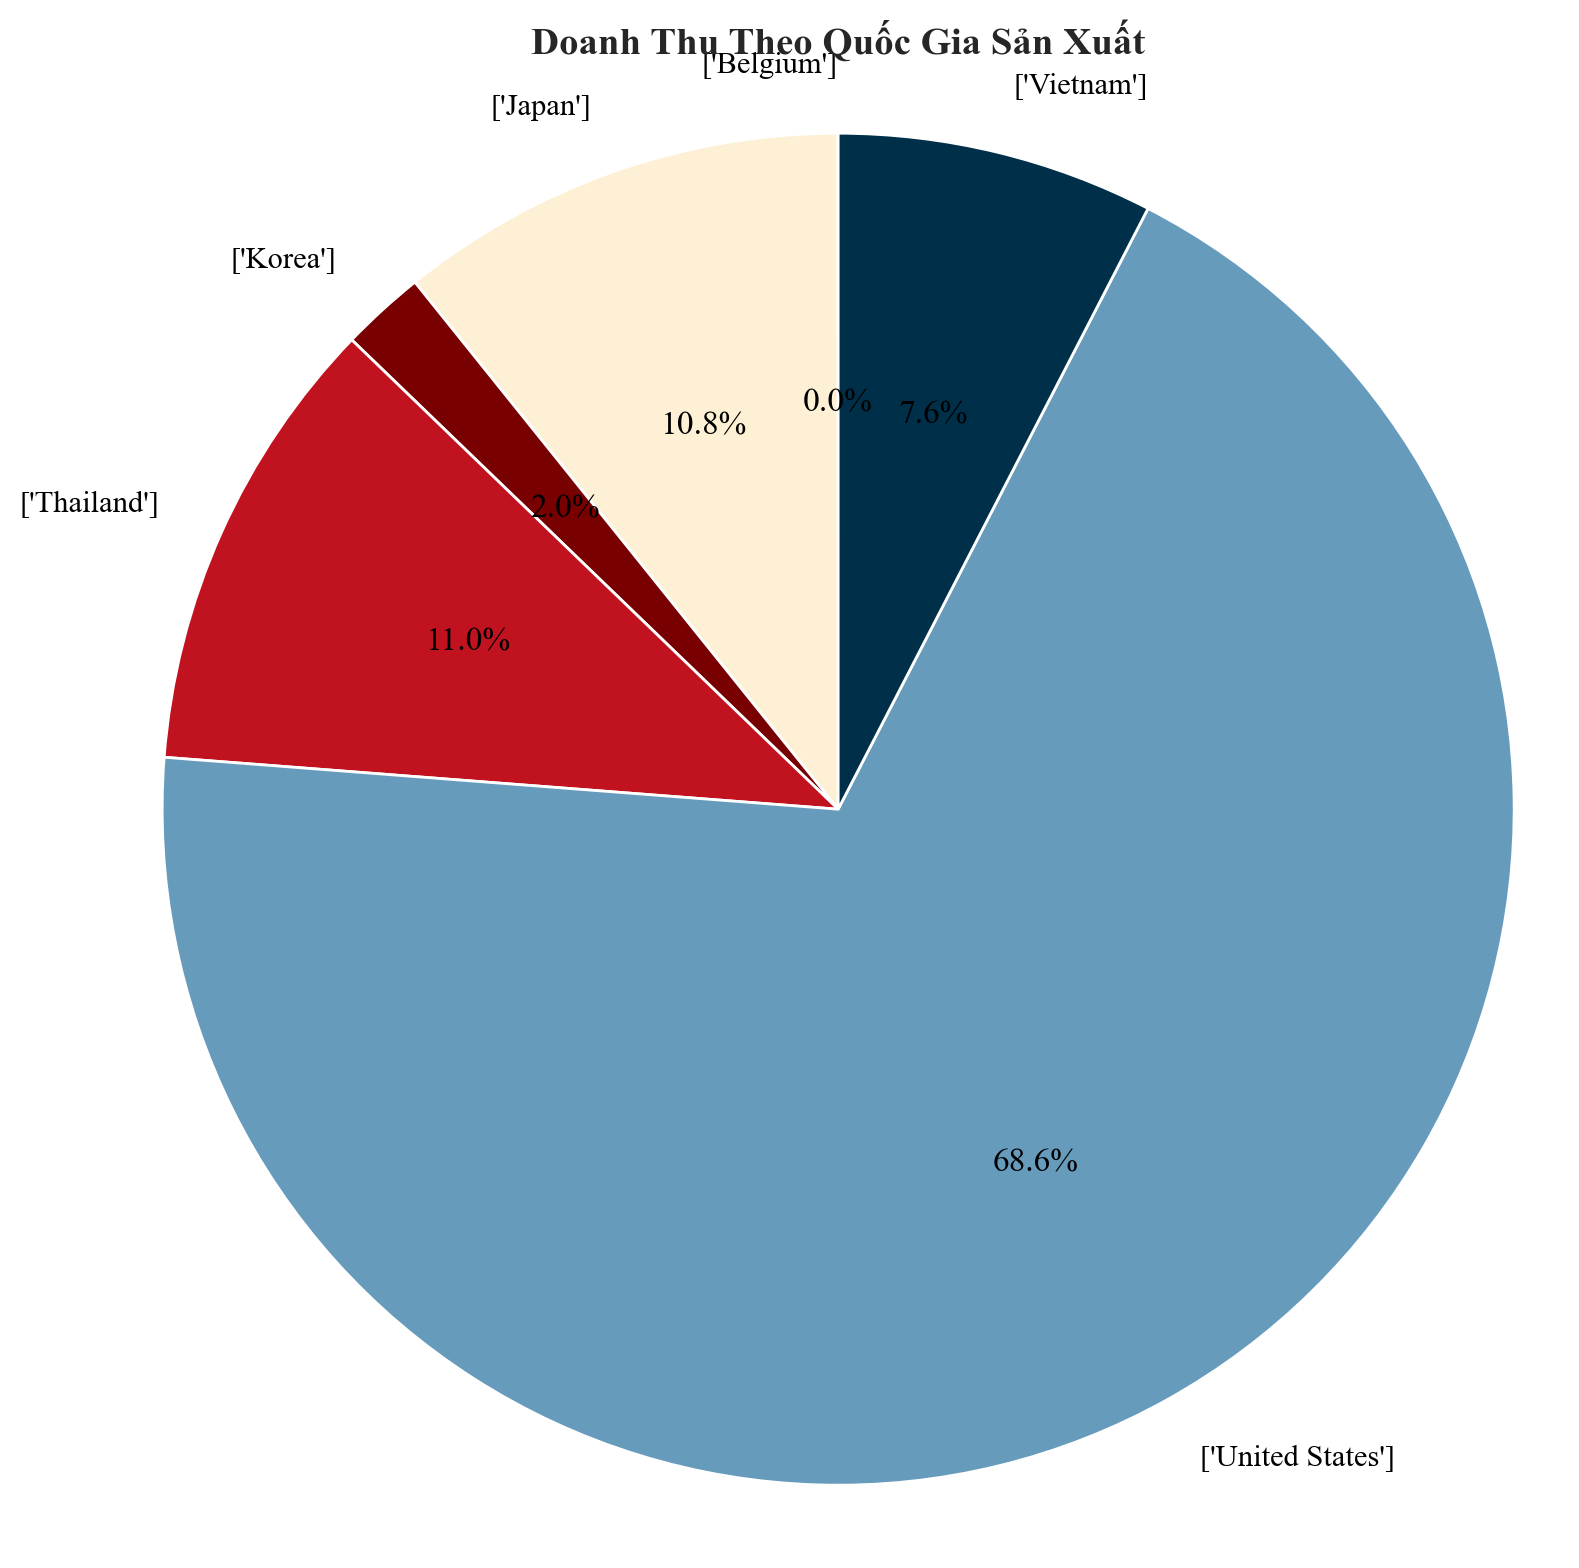

In [238]:
df_unique['Country'] = df_unique['country'].astype(str)
# Tính doanh thu theo quốc gia phim
revenue_by_country = df_unique.groupby('Country')['total'].sum()
# Biểu đồ Pie: Doanh thu theo quốc gia phim
# Biểu đồ doanh thu theo quốc gia phim (Pie Chart)
plt.figure(figsize=(8, 8), dpi=200)
plt.pie(revenue_by_country, labels=revenue_by_country.index, autopct='%1.1f%%',
        startangle=90, colors=['#003049', '#FDF0D5', '#780000', '#C1121F', '#669BBC'],
        textprops={'color': 'black'})
plt.title('Doanh Thu Theo Quốc Gia Sản Xuất', fontsize=14, fontweight='bold')
plt.axis('equal')  # Hình tròn đều
plt.tight_layout()
plt.show()

Dựa trên cơ cấu doanh thu theo quốc gia sản xuất phim tại thị trường Việt Nam, cụ thể là Đà Nẵng, phim Mỹ chiếm tỷ trọng lớn nhất với 68,6%, cho thấy sức hút mạnh mẽ và vị thế áp đảo của phim Hollywood đối với khán giả. Phim Thái Lan (11%) và phim Nhật Bản (10,8%) cũng đạt được mức doanh thu ấn tượng, phản ánh sự quan tâm ngày càng tăng của khán giả đối với các tác phẩm châu Á. Trong khi đó, phim Việt Nam chỉ chiếm 7,67% doanh thu, cho thấy nội lực ngành điện ảnh trong nước vẫn còn nhiều dư địa để phát triển. Phim Hàn Quốc (3%) và phim Bỉ (1%) chiếm tỷ trọng khá nhỏ, mức độ phổ biến và sức cạnh tranh tại thị trường Việt Nam còn hạn chế.

Từ số liệu này có thể rút ra rằng phim nước ngoài, đặc biệt là từ Mỹ và các nước châu Á như Thái Lan, Nhật Bản, đang chiếm ưu thế rõ rệt tại rạp Việt, trong khi phim Việt cần tiếp tục đầu tư vào chất lượng nội dung, chiến lược tiếp thị và đa dạng thể loại để thu hút khán giả trong nước và nâng cao tỷ trọng doanh thu trong tương lai.

__Thể loại phim__

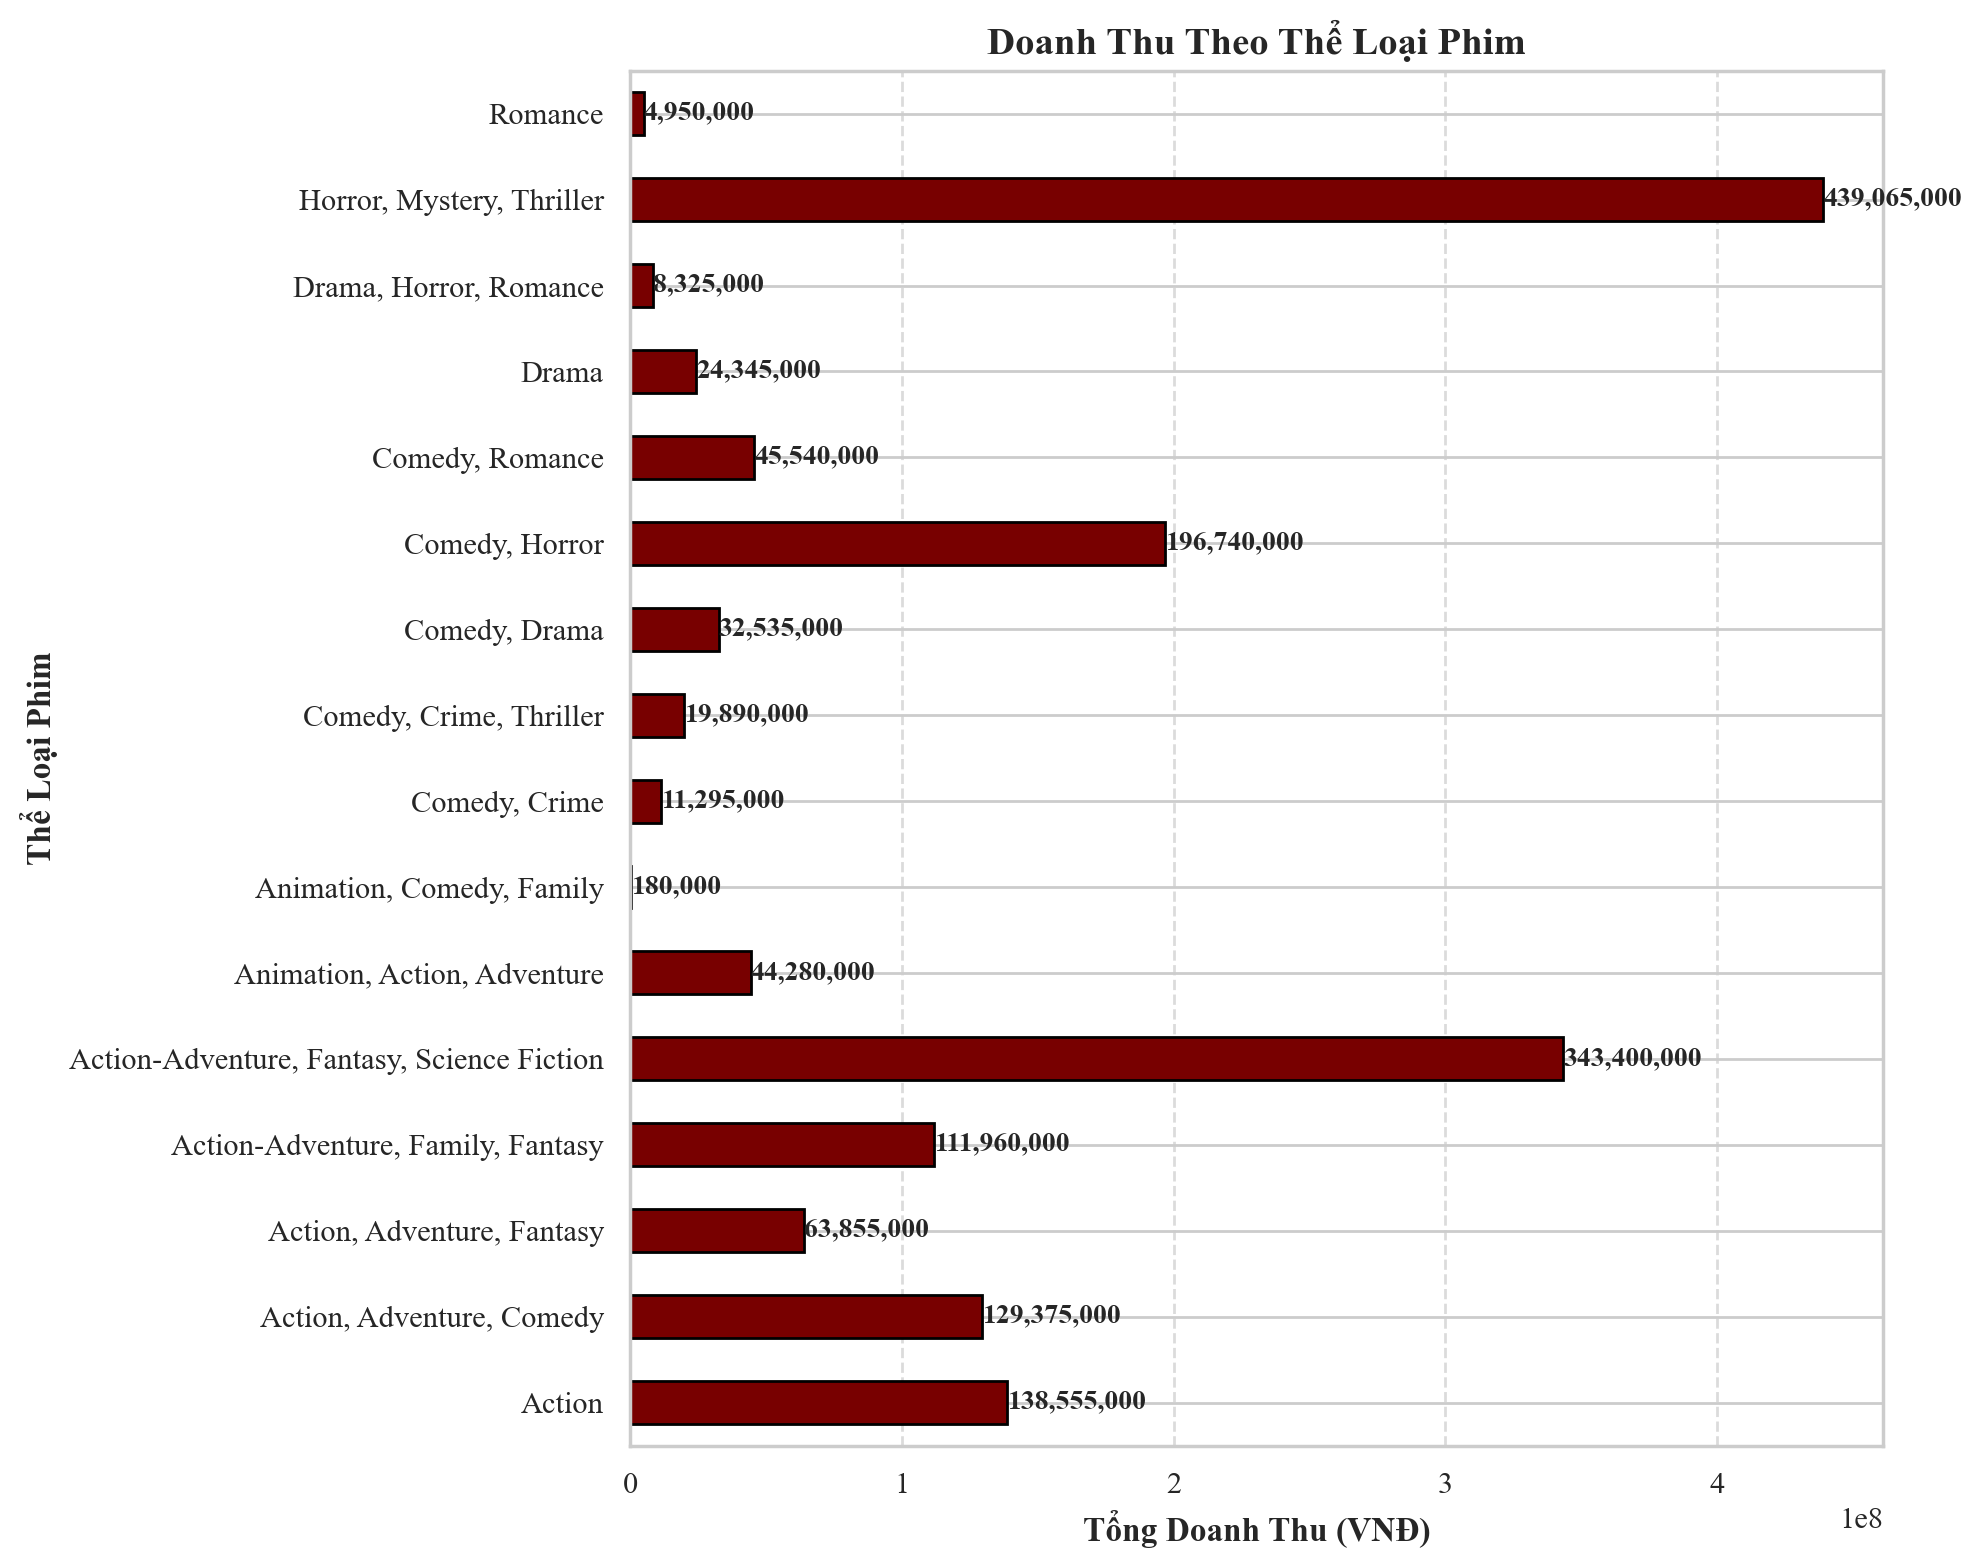

In [239]:
df_unique['Genre'] = df_unique['listed_in'].astype(str)
# Tính doanh thu theo thể loại phim
revenue_by_genre = df_unique.groupby('Genre')['total'].sum()
# Biểu đồ doanh thu theo thể loại phim (Horizontal Bar Chart)
plt.figure(figsize=(10, 8), dpi=200)
revenue_by_genre.plot(kind='barh', color='#780000', edgecolor='black')

plt.title('Doanh Thu Theo Thể Loại Phim', fontsize=14, fontweight='bold')
plt.xlabel('Tổng Doanh Thu (VNĐ)', fontsize=12, fontweight='bold')
plt.ylabel('Thể Loại Phim', fontsize=12, fontweight='bold')
plt.tick_params(axis='y', rotation=0)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Hiển thị giá trị doanh thu trên từng thanh
for i, v in enumerate(revenue_by_genre):
    plt.text(v + 5000, i, f'{v:,.0f}', va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

Biểu đồ cho thấy doanh thu phòng vé tập trung chủ yếu ở các thể loại phim Horror, Mystery, Thriller và Action-Adventure, Fantasy, Science Fiction, phản ánh rõ thị hiếu khán giả chuộng cảm giác mạnh, kịch tính và kỹ xảo hoành tráng. Ngược lại, những dòng phim nhẹ nhàng như Romance hay Animation có doanh thu khiêm tốn, cho thấy sự chưa hiệu quả trong khai thác phân khúc gia đình và khán giả trẻ. Điều này đặt ra cơ hội để rạp chiếu điều chỉnh chiến lược chọn phim và truyền thông nhằm tối ưu hóa doanh thu đa dạng phân khúc.

__Top 5 Phim có số lượt xem cao nhất__

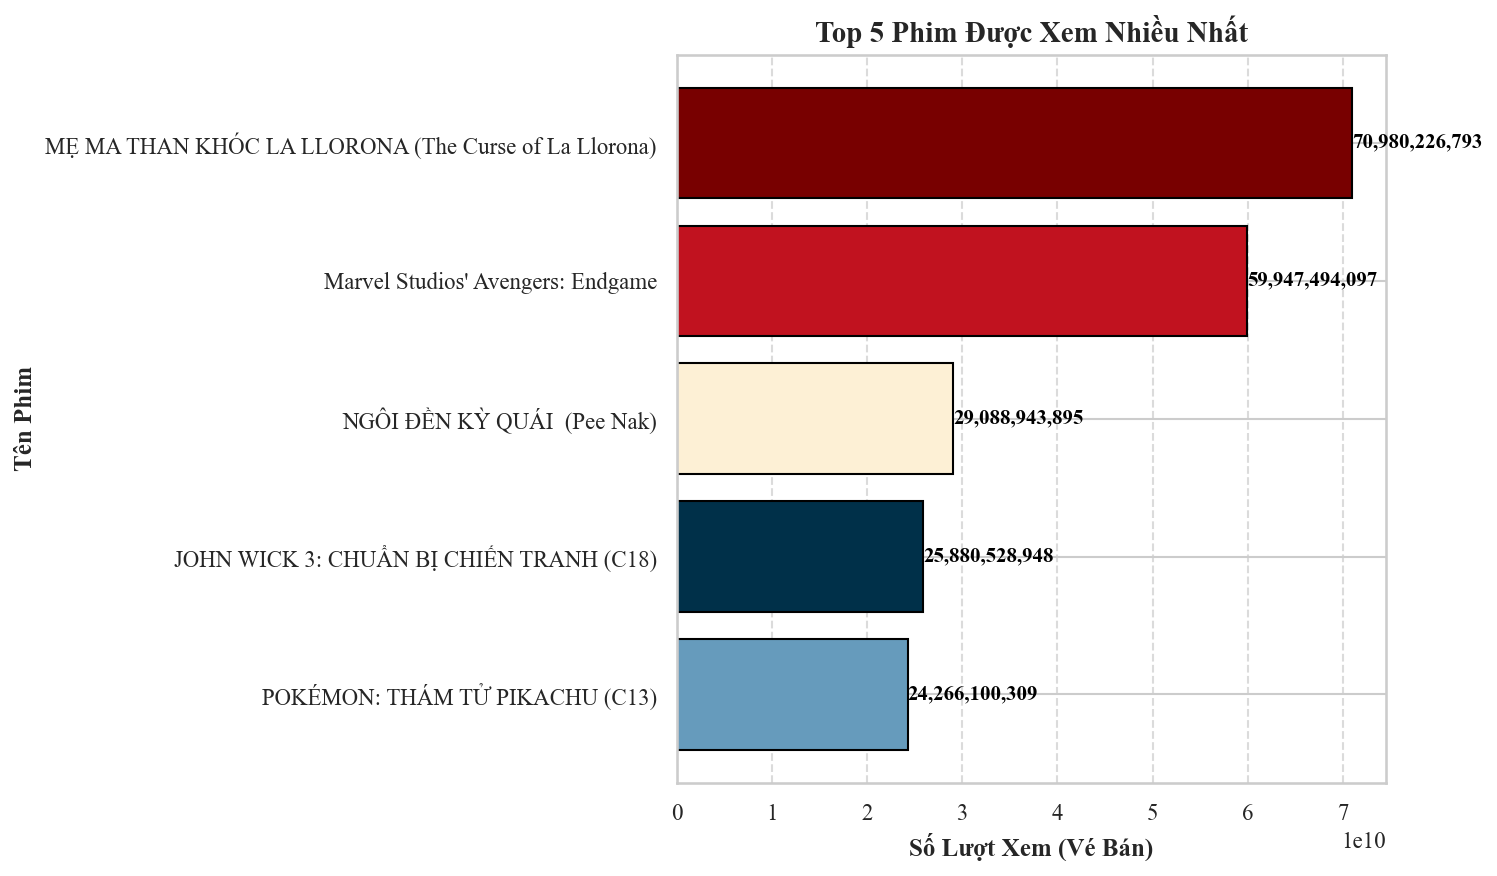

In [240]:
top5_movies = df_unique.groupby('title')['ticketcode'].sum().sort_values(ascending=False).head(5)

# Tạo bảng màu tùy chỉnh
palette = ["#780000", "#C1121F", "#FDF0D5", "#003049", "#669BBC"]

# Tạo biểu đồ
fig, ax = plt.subplots(figsize=(10, 6), dpi=150)

# Vẽ biểu đồ cột ngang với màu sắc riêng cho từng cột
bars = ax.barh(top5_movies.index[::-1], top5_movies.values[::-1], 
               color=palette[::-1], edgecolor='black')

# Tiêu đề và nhãn
ax.set_title('Top 5 Phim Được Xem Nhiều Nhất', fontsize=14, fontweight='bold')
ax.set_xlabel('Số Lượt Xem (Vé Bán)', fontsize=12, fontweight='bold')
ax.set_ylabel('Tên Phim', fontsize=12, fontweight='bold')
ax.grid(axis='x', linestyle='--', alpha=0.7)

# Hiển thị giá trị lượt xem trên mỗi cột
for i, v in enumerate(top5_movies.values[::-1]):
    ax.text(v + 100, i, f'{v:,}', va='center', fontsize=10, fontweight='bold', color='black')

plt.tight_layout()
plt.show()

Dựa trên biểu đồ cột về top 5 phim có lượt xem cao nhất, “Mẹ ma than khóc La Llorona” dẫn đầu với số lượt vé bán ra lên đến 70,980,226,793, bỏ xa các phim còn lại. Xếp thứ hai là “Avengers: Endgame” với 59,947,494,097 lượt xem, cho thấy sức hút lớn của dòng phim siêu anh hùng. Vị trí thứ ba thuộc về “Ngôi đền kỳ quái” (Pee Nak) – một phim hài kinh dị Thái Lan với 29,088,943,895 lượt xem, cho thấy khán giả cũng rất quan tâm đến dòng phim kinh dị mang yếu tố văn hóa châu Á, theo sau là “John Wick 3: Chuẩn bị chiến tranh (C18)” với 25,880,528,948 lượt, và cuối cùng là “Pokémon: Thám tử Pikachu (C13)” với 24,266,100,309 lượt xem.

Qua đó có thể thấy rằng thể loại kinh dị và hành động vẫn giữ được sức hút mạnh mẽ với khán giả, đặc biệt là phim kinh dị khi có tới hai đại diện trong danh sách này và phim đứng đầu cũng thuộc thể loại này. Bên cạnh đó, các thương hiệu nổi tiếng như Marvel, John Wick hay Pokémon tiếp tục thu hút lượng lớn người xem nhờ vào độ nhận diện thương hiệu cao và nội dung hấp dẫn. Điều này cho thấy xu hướng lựa chọn phim của khán giả hiện nay nghiêng nhiều về các phim hành động, kinh dị và có yếu tố thương hiệu quốc tế nổi bật.